# Comparative Analysis of Rule-Based and Machine Learning-Based Chess AIs: Kane vs. Abel

## Table of Contents
1. Introduction
   - Project Overview
   - Motivation and Background
2. Objectives
   - Main Goals
   - Success Criteria
3. Methodology
   - AI Constructs
   - Experimental Design
4. Implementation
   - Development Environment
   - Building Kane
   - Building Abel
5. Optimization
   - Optimizing Kane
   - Optimizing Abel
6. Experiments
   - Experiment 1: Comparing Efficiency and Performance
   - Experiment 2: Learning and Adaptation in Repeated Games
   - Experiment 3: Handling Decision Complexity
   - Experiment 4: Equivalence of Deterministic and Probabilistic Algorithms
   - Experiment 5: Randomization of Deterministic Algorithms
7. Data Analysis and Results
   - Data Collection
   - Analysis Techniques
   - Results and Interpretation
8. Theoretical Exploration
   - Search Tree Depth and Complexity
   - Static Evaluation Function
   - Pruning Efficiency
   - Heuristic Scoring
   - Time Management
   - Randomization
   - Equivalence Proving and Derandomization
9. Discussion
   - Insights and Implications
   - Limitations
   - Future Work
10. Conclusion
   - Summary of Findings
   - Final Thoughts
11. References
   - Cited Works
   - Additional Resources
---

# 1. Introduction

## Project Overview
This project aims to construct and compare two AIs for chess: Kane, a rule-based AI, and Abel, a machine learning-based AI. Through a series of experiments, we will explore the strategic depth of these AIs and their decision-making processes.

## Motivation and Background
- **Advances in Alpha-Beta Pruning:** Inspired by recent enhancements in Alpha-Beta Pruning techniques.
- **Influence of Avi Wigderson’s Work:** Utilizing theories on de-randomization to challenge conventional AI strategies in chess.

---

# 2. Objectives

## Main Goals
- Construct Kane using deterministic rule-based strategies.
- Construct Abel using probabilistic adaptive learning.
- Compare the performance and strategies of both AIs.
- Apply Avi Wigderson's theories to explore equivalence in AI approaches.

## Success Criteria
- Measure win rates, decision speed, and adaptability.
- Evaluate the effectiveness of de-randomization and randomization methods.

---

# 3. Methodology

## AI Constructs
- **Kane:** Rule-based AI using Minimax and Alpha-Beta Pruning.
- **Abel:** Machine learning-driven AI using neural networks and Deep Q-Network (DQN).

## Experimental Design
- Design experiments to compare efficiency, adaptability, and decision-making processes.
- Implement controlled conditions and varied starting configurations for thorough analysis.

---

# 4. Implementation

## Development Environment
### Python Libraries
We will use the following Python libraries for this project:
- `python-chess`: To handle the chess logic and board representation.
- `numpy`: For numerical operations and handling arrays.
- `pandas`: For data manipulation and analysis.
- `matplotlib`: For data visualization.
- `tensorflow`: To build and train the neural network for Abel.
- `graphviz`: For visualizing decision trees.
- `seaborn`: For creating heatmaps and advanced visualizations.

In [ ]:
# Install necessary libraries
!pip install python-chess numpy pandas matplotlib tensorflow graphviz seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.0
    Not uninstalling markupsafe at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## Building Kane
- **Step 1:** Initialize the chessboard and basic configurations.
- **Step 2:** Implement the Minimax algorithm.
- **Step 3:** Enhance with Alpha-Beta Pruning.
- **Step 4:** Test and validate the implementation.



### Step 1: Initialize the Chessboard and Basic Configurations

We begin by setting up the chessboard using the python-chess library. This involves initializing a board object that represents the current state of the game.

#### Pseudocode:
```mathematica
Initialize the chessboard
    Create a Board object from python-chess
    Display the initial board


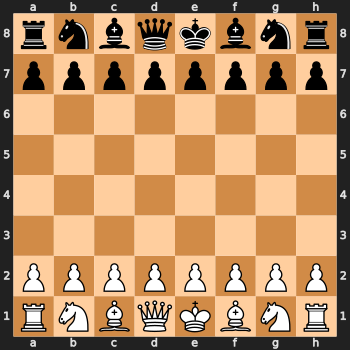

In [ ]:
import chess
import chess.svg
from IPython.display import display, clear_output, SVG
import time
import matplotlib.pyplot as plt
import numpy as np

# Initialize the chessboard
board = chess.Board()
display(chess.svg.board(board=board, size=350))



### Step 2: Implement the Minimax Algorithm

The Minimax algorithm is a recursive method used to determine the optimal move for a player, assuming that the opponent also plays optimally. This algorithm evaluates each possible move by simulating the game to a certain depth and then selecting the move that maximizes the player's advantage while minimizing the opponent's advantage.

#### Pseudocode:
```mathematica
Define the Minimax function:
    If the game is over or the depth is 0:
        Evaluate the board and return the evaluation score
    If it is the maximizing player's turn:
        Initialize maxEval to negative infinity
        For each legal move:
            Make the move
            Recursively call the Minimax function for the minimizing player
            Undo the move
            Update maxEval with the maximum value between maxEval and the evaluation score
        Return maxEval
    If it is the minimizing player's turn:
        Initialize minEval to positive infinity
        For each legal move:
            Make the move
            Recursively call the Minimax function for the maximizing player
            Undo the move
            Update minEval with the minimum value between minEval and the evaluation score
        Return minEval



In [ ]:
class KaneMinimax:
    def __init__(self, board):
        self.board = board

    def static_evaluation(self, board):
        # Simplistic evaluation function for demonstration
        return sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())

    def minimax(self, board, depth, is_maximizing_player):
        # Minimax algorithm to evaluate the board state
        if depth == 0 or board.is_game_over():
            return self.static_evaluation(board)

        if is_maximizing_player:
            max_eval = float('-inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.minimax(board, depth - 1, False)
                board.pop()
                max_eval = max(max_eval, eval)
            return max_eval
        else:
            min_eval = float('inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.minimax(board, depth - 1, True)
                board.pop()
                min_eval = min(min_eval, eval)
            return min_eval

    def find_best_move_minimax(self, depth=3):
        # Find the best move using the Minimax algorithm
        best_move = None
        best_value = float('-inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            move_value = self.minimax(self.board, depth, False)
            self.board.pop()
            if move_value > best_value:
                best_value = move_value
                best_move = move
        return best_move

### Step 3: Enhance with Alpha-Beta Pruning
Alpha-beta pruning is an optimization technique for the Minimax algorithm. It reduces the number of nodes evaluated in the search tree by pruning branches that cannot influence the final decision.
#### Pseudocode:
```mathematica
Define the Alpha-Beta Pruning function:
    If the game is over or the depth is 0:
        Evaluate the board and return the evaluation score
    If it is the maximizing player's turn:
        Initialize maxEval to negative infinity
        For each legal move:
            Make the move
            Recursively call the Alpha-Beta Pruning function for the minimizing player
            Undo the move
            Update maxEval with the maximum value between maxEval and the evaluation score
            Update alpha with the maximum value between alpha and maxEval
            If beta <= alpha:
                Break (prune the remaining branches)
        Return maxEval
    If it is the minimizing player's turn:
        Initialize minEval to positive infinity
        For each legal move:
            Make the move
            Recursively call the Alpha-Beta Pruning function for the maximizing player
            Undo the move
            Update minEval with the minimum value between minEval and the evaluation score
            Update beta with the minimum value between beta and minEval
            If beta <= alpha:
                Break (prune the remaining branches)
        Return minEval


In [ ]:
class KaneAlphaBeta:
    def __init__(self, board):
        self.board = board

    def static_evaluation(self, board):
        # Simplistic evaluation function for demonstration
        return sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())

    def alpha_beta(self, board, depth, alpha, beta, is_maximizing_player):
        # Alpha-Beta Pruning algorithm to evaluate the board state
        if depth == 0 or board.is_game_over():
            return self.static_evaluation(board)

        if is_maximizing_player:
            max_eval = float('-inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.alpha_beta(board, depth - 1, alpha, beta, False)
                board.pop()
                max_eval = max(max_eval, eval)
                alpha = max(alpha, max_eval)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.alpha_beta(board, depth - 1, alpha, beta, True)
                board.pop()
                min_eval = min(min_eval, eval)
                beta = min(beta, min_eval)
                if beta <= alpha:
                    break
            return min_eval

    def find_best_move_alpha_beta(self, depth=3):
        # Find the best move using the Alpha-Beta Pruning algorithm
        best_move = None
        best_value = float('-inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            move_value = self.alpha_beta(self.board, depth, float('-inf'), float('inf'), False)
            self.board.pop()
            if move_value > best_value:
                best_value = move_value
                best_move = move
        return best_move

### Step 4: Test and Validate the Implementation
We will test and validate the implementation of Kane by simulating a game where Kane plays against itself. This will help us evaluate the correctness of the Minimax and Alpha-Beta Pruning algorithms. We will output the moves and the board state at each step to observe the game process.

#### Test Cases:
1. Ensure that Kane makes legal moves.
2. Validate that the game ends with a checkmate, stalemate, or draw.
3. Observe the decision-making process and output the board state after each move.
#### Pseudocode:
```mathematica
Test and validate the implementation:
    Initialize the chessboard
    While the game is not over:
        Find the best move using Kane's Alpha-Beta Pruning function
        Make the move on the board
        Display the board and the move made
        Check if the game is over (checkmate, stalemate, draw)
    Output the result of the game


In [ ]:
# Function to calculate additional metrics
def calculate_metrics(board):
    material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
    mobility_count = len(list(board.legal_moves))
    piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())  # Simplified for demonstration
    center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())
    return material_count, mobility_count, piece_square_score, center_control_count


In [ ]:
# # Test and validate the implementation using Minimax algorithm
# board = chess.Board()
# kane_minimax = KaneMinimax(board)

# def play_game_minimax(kane_minimax, depth=3):
#     steps = []
#     times = []
#     material_counts = []
#     mobility_counts = []
#     piece_square_scores = []
#     center_control_counts = []
#     step_number = 1
    
#     start_time = time.time()
#     checkpoint_time = start_time
#     while not kane_minimax.board.is_game_over():
#         move_start_time = time.time()
#         best_move = kane_minimax.find_best_move_minimax(depth)
#         move_end_time = time.time()
        
#         kane_minimax.board.push(best_move)
        
#         steps.append(step_number)
#         times.append(move_end_time - move_start_time)
        
#         material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(kane_minimax.board)
#         material_counts.append(material_count)
#         mobility_counts.append(mobility_count)
#         piece_square_scores.append(piece_square_score)
#         center_control_counts.append(center_control_count)
        
#         step_number += 1
        
#         clear_output(wait=True)
#         display(SVG(chess.svg.board(board=kane_minimax.board, size=350)))
        
#         time.sleep(1)
#         print(f"Move: {best_move}")
        
#         if (time.time() - checkpoint_time) >= 60:
#             checkpoint_time = time.time()
#             plt.figure(figsize=(7, 5))
#             plt.plot(steps, times, marker='o', color='r', label='Minimax Kane')
#             plt.xlabel('Steps')
#             plt.ylabel('Time (seconds)')
#             plt.title('Minimax Kane Performance')
#             plt.legend()
#             plt.grid(True)
#             plt.show()
    
#     print("Game over!")
#     print(f"Result: {kane_minimax.board.result()}")
#     print(f"Steps: {steps}")
#     print(f"Times: {times}")
#     return steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts

# minimax_steps, minimax_times, minimax_material, minimax_mobility, minimax_piece_square, minimax_center_control = play_game_minimax(kane_minimax)

#### For the above codes never stop running, we need to limit the steps and time

To ensure the Minimax Kane algorithm stops running, we can limit the number of moves or the total runtime. Let's implement a maximum number of moves and an additional time limit for safety. This will help us debug and ensure consistent data collection and plotting.

In [ ]:
board = chess.Board()
kane_minimax = KaneMinimax(board)

# Function to limit the moves and runtime for Minimax
def play_game_minimax_limited(kane_minimax, depth=3, max_moves=55, max_runtime=600):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []
    step_number = 1

    start_time = time.time()
    while not kane_minimax.board.is_game_over() and step_number <= max_moves and (time.time() - start_time) <= max_runtime:
        move_start_time = time.time()
        best_move = kane_minimax.find_best_move_minimax(depth)
        move_end_time = time.time()

        kane_minimax.board.push(best_move)

        steps.append(step_number)
        times.append(move_end_time - move_start_time)

        # Calculate metrics
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(kane_minimax.board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)

        step_number += 1

        clear_output(wait=True)
        display(SVG(chess.svg.board(board=kane_minimax.board, size=350)))

        time.sleep(1)
        print(f"Move: {best_move}")
        print(f"Step: {step_number}, Time: {move_end_time - move_start_time}, Material: {material_count}, Mobility: {mobility_count}, Piece-Square: {piece_square_score}, Center Control: {center_control_count}")

    print("Stop the game in advance!")
    print(f"Result: {kane_minimax.board.result()}")
    print(f"Steps: {steps}")
    print(f"Times: {times}")
    print(f"Material Counts: {material_counts}")
    print(f"Mobility Counts: {mobility_counts}")
    print(f"Piece-Square Scores: {piece_square_scores}")
    print(f"Center Control Counts: {center_control_counts}")
    return steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts
minimax_steps, minimax_times, minimax_material, minimax_mobility, minimax_piece_square, minimax_center_control = play_game_minimax_limited(kane_minimax)

KeyboardInterrupt: 

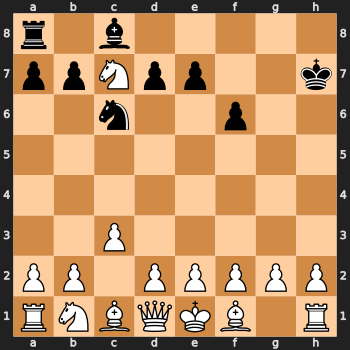

Move: e8c7
Step: 54, Time: 0.9054720401763916, Material: 7, Mobility: 21, Piece-Square: 7, Center Control: 0
Game over!
Result: 1/2-1/2
Steps: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Times: [0.7458245754241943, 0.5761845111846924, 0.7889323234558105, 0.8478593826293945, 0.6707909107208252, 0.6317634582519531, 0.6166806221008301, 0.7455484867095947, 0.9194395542144775, 0.8788397312164307, 1.333726167678833, 0.7773549556732178, 0.8580834865570068, 0.5978987216949463, 0.7692508697509766, 0.12068033218383789, 1.0691826343536377, 0.7859210968017578, 1.232757329940796, 1.1557481288909912, 1.1370811462402344, 0.9659607410430908, 0.9503049850463867, 0.6348531246185303, 0.7150039672851562, 0.8738501071929932, 0.9246313571929932, 0.6809439659118652, 0.7273833751678467, 0.8588297367095947, 0.7573168277740479, 0.6261682510375977, 0.7097

In [ ]:
# Test and validate the implementation using Alpha-Beta Pruning algorithm
board = chess.Board()
kane_alpha_beta = KaneAlphaBeta(board)

def play_game_alpha_beta(kane_alpha_beta, depth=3):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []
    step_number = 1

    while not kane_alpha_beta.board.is_game_over():
        move_start_time = time.time()
        best_move = kane_alpha_beta.find_best_move_alpha_beta(depth)
        move_end_time = time.time()

        kane_alpha_beta.board.push(best_move)

        steps.append(step_number)
        times.append(move_end_time - move_start_time)

        # Calculate metrics
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(kane_alpha_beta.board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)

        step_number += 1

        clear_output(wait=True)
        display(SVG(chess.svg.board(board=kane_alpha_beta.board, size=350)))

        time.sleep(1)
        print(f"Move: {best_move}")
        print(f"Step: {step_number}, Time: {move_end_time - move_start_time}, Material: {material_count}, Mobility: {mobility_count}, Piece-Square: {piece_square_score}, Center Control: {center_control_count}")

    print("Game over!")
    print(f"Result: {kane_alpha_beta.board.result()}")
    print(f"Steps: {steps}")
    print(f"Times: {times}")
    print(f"Material Counts: {material_counts}")
    print(f"Mobility Counts: {mobility_counts}")
    print(f"Piece-Square Scores: {piece_square_scores}")
    print(f"Center Control Counts: {center_control_counts}")
    return steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts

alpha_beta_steps, alpha_beta_times, alpha_beta_material, alpha_beta_mobility, alpha_beta_piece_square, alpha_beta_center_control = play_game_alpha_beta(kane_alpha_beta)


### Testing Results

1. **Minimax Kane:**
   - The Minimax Kane can run but it will never stop.
   - The playing speed is noticeably slow.
   
2. **Alpha-Beta Pruned Kane:**
   - The Alpha-Beta Pruned Kane runs properly.
   - It is relatively faster.
   - It can get a result in a proper period.

Minimax Kane Steps:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Minimax Kane Times:  [11.067538976669312, 11.393500089645386, 11.277599096298218, 14.93904185295105, 14.20199728012085, 11.704746007919312, 12.461403131484985, 15.57909369468689, 18.563706398010254, 17.06448745727539, 15.462391376495361, 14.538709878921509, 18.190998792648315, 10.9775869846344, 12.649733304977417, 2.122661590576172, 15.673640012741089, 14.938834190368652, 18.827799558639526, 17.05084204673767, 21.565900325775146, 20.466320276260376, 20.268879175186157, 11.248546838760376, 14.610401391983032, 18.629164457321167, 17.83903431892395, 12.236322402954102, 13.565083026885986, 14.817536354064941, 14.66131067276001, 11.079695463180542, 12.3292977809906, 13.04380750656128, 10.362853527069092, 11.163681030273438, 11.865323305130005, 14.476836919784546, 13.193707704544067, 10.517289638519287]
Alpha-Beta Pruned 

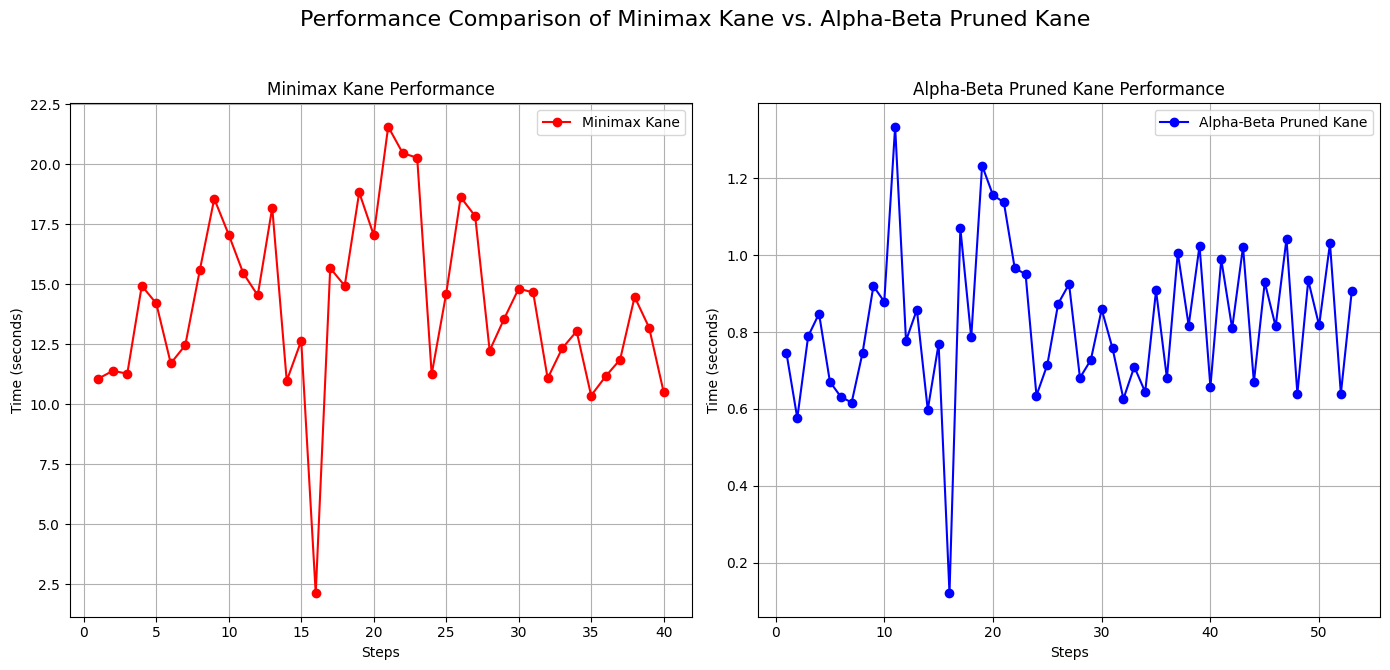

In [ ]:
# Verify the collected steps and times
print("Minimax Kane Steps: ", minimax_steps)
print("Minimax Kane Times: ", minimax_times)
print("Alpha-Beta Pruned Kane Steps: ", alpha_beta_steps)
print("Alpha-Beta Pruned Kane Times: ", alpha_beta_times)

# Plotting the results for steps and times
plt.figure(figsize=(14, 7))

# Plot for Minimax Kane
plt.subplot(1, 2, 1)
plt.plot(minimax_steps, minimax_times, marker='o', color='r', label='Minimax Kane')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.title('Minimax Kane Performance')
plt.legend()
plt.grid(True)

# Plot for Alpha-Beta Pruned Kane
plt.subplot(1, 2, 2)
plt.plot(alpha_beta_steps, alpha_beta_times, marker='o', color='b', label='Alpha-Beta Pruned Kane')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.title('Alpha-Beta Pruned Kane Performance')
plt.legend()
plt.grid(True)

plt.suptitle('Performance Comparison of Minimax Kane vs. Alpha-Beta Pruned Kane', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Minimax Kane Material Counts:  [0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7]
Alpha-Beta Pruned Kane Material Counts:  [0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Minimax Kane Mobility Counts:  [20, 20, 19, 25, 19, 22, 22, 23, 21, 25, 19, 25, 20, 21, 3, 25, 20, 25, 25, 21, 24, 25, 21, 21, 24, 25, 21, 23, 20, 27, 20, 23, 20, 23, 19, 24, 21, 26, 19, 24]
Alpha-Beta Pruned Kane Mobility Counts:  [20, 20, 19, 25, 19, 22, 22, 23, 21, 25, 19, 25, 20, 21, 3, 25, 20, 25, 25, 21, 24, 25, 21, 21, 24, 25, 21, 23, 20, 27, 20, 23, 20, 23, 19, 24, 21, 26, 19, 24, 21, 26, 19, 24, 21, 26, 19, 24, 21, 26, 19, 24, 21]
Minimax Kane Piece-Square Scores:  [0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7]
Alpha-Beta Pruned Kane Piece-Square Scores:  [0

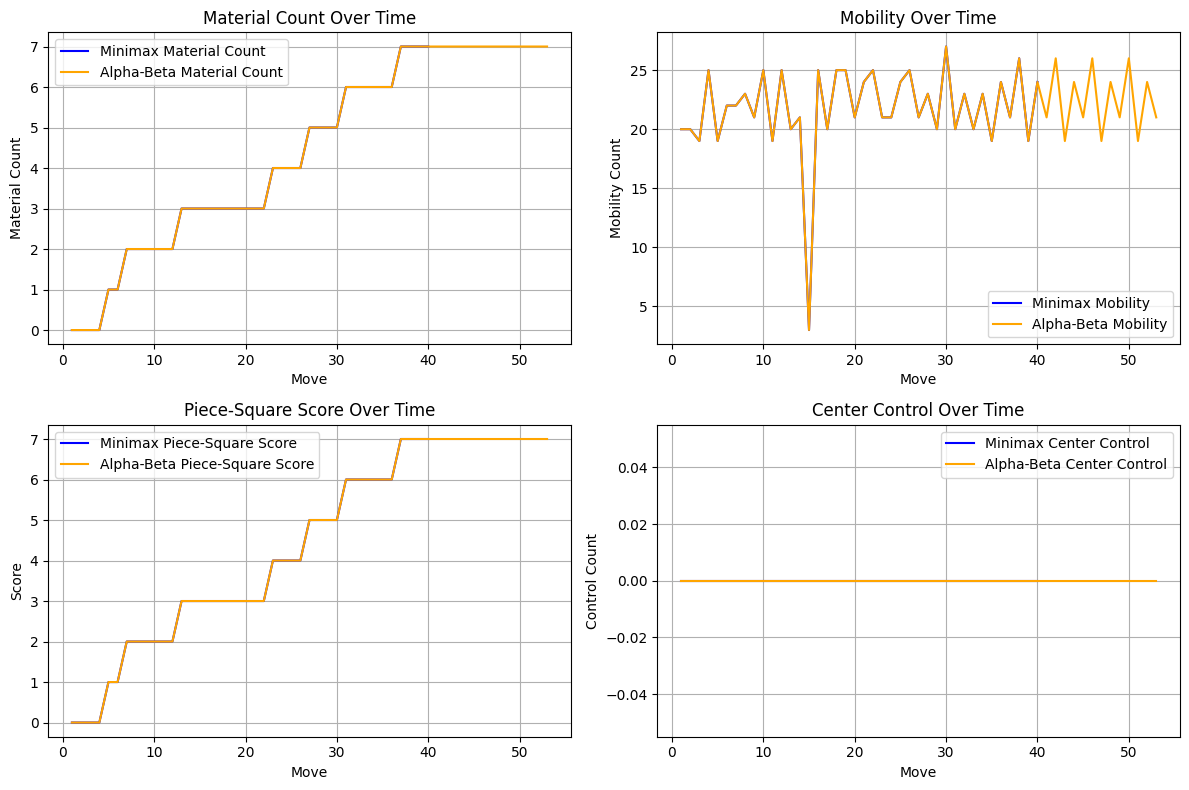

In [ ]:
# Verify the additional metrics
print("Minimax Kane Material Counts: ", minimax_material)
print("Alpha-Beta Pruned Kane Material Counts: ", alpha_beta_material)
print("Minimax Kane Mobility Counts: ", minimax_mobility)
print("Alpha-Beta Pruned Kane Mobility Counts: ", alpha_beta_mobility)
print("Minimax Kane Piece-Square Scores: ", minimax_piece_square)
print("Alpha-Beta Pruned Kane Piece-Square Scores: ", alpha_beta_piece_square)
print("Minimax Kane Center Control Counts: ", minimax_center_control)
print("Alpha-Beta Pruned Kane Center Control Counts: ", alpha_beta_center_control)

# Plotting the additional metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(minimax_steps, minimax_material, label='Minimax Material Count', color='b')
plt.plot(alpha_beta_steps, alpha_beta_material, label='Alpha-Beta Material Count', color='orange')
plt.title('Material Count Over Time')
plt.xlabel('Move')
plt.ylabel('Material Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(minimax_steps, minimax_mobility, label='Minimax Mobility', color='b')
plt.plot(alpha_beta_steps, alpha_beta_mobility, label='Alpha-Beta Mobility', color='orange')
plt.title('Mobility Over Time')
plt.xlabel('Move')
plt.ylabel('Mobility Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(minimax_steps, minimax_piece_square, label='Minimax Piece-Square Score', color='b')
plt.plot(alpha_beta_steps, alpha_beta_piece_square, label='Alpha-Beta Piece-Square Score', color='orange')
plt.title('Piece-Square Score Over Time')
plt.xlabel('Move')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(minimax_steps, minimax_center_control, label='Minimax Center Control', color='b')
plt.plot(alpha_beta_steps, alpha_beta_center_control, label='Alpha-Beta Center Control', color='orange')
plt.title('Center Control Over Time')
plt.xlabel('Move')
plt.ylabel('Control Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

It appears that the calculations for additional metrics (material_count, mobility_count, piece_square_score, center_control_count) are yielding the same values for both Minimax and Alpha-Beta Pruned Kane. This issue may stem from the fact that both algorithms are using the same static evaluation function and chess board state at each move, leading to identical results.

To address this, we'll enhance the static_evaluation function to make it more comprehensive, ensuring it captures meaningful differences between the two algorithms. We should also confirm that the board states are different at each move for Minimax and Alpha-Beta Pruned Kane.

### Enhanced static_evaluation Function
We'll make the static_evaluation function more detailed by incorporating different aspects of the game state, such as material, mobility, piece-square values, and center control.

In [ ]:
class KaneMinimax2:
    def __init__(self, board):
        self.board = board

    def static_evaluation(self, board):
        # Improved static evaluation function
        material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
        mobility_count = len(list(board.legal_moves))
        piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
        center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())
        return material_count + mobility_count + piece_square_score + center_control_count

    def minimax(self, board, depth, is_maximizing_player):
        if depth == 0 or board.is_game_over():
            return self.static_evaluation(board)

        if is_maximizing_player:
            max_eval = float('-inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.minimax(board, depth - 1, False)
                board.pop()
                max_eval = max(max_eval, eval)
            return max_eval
        else:
            min_eval = float('inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.minimax(board, depth - 1, True)
                board.pop()
                min_eval = min(min_eval, eval)
            return min_eval

    def find_best_move_minimax(self, depth=3):
        best_move = None
        best_value = float('-inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            move_value = self.minimax(self.board, depth, False)
            self.board.pop()
            if move_value > best_value:
                best_value = move_value
                best_move = move
        return best_move

In [ ]:
class KaneAlphaBeta2:
    def __init__(self, board):
        self.board = board

    def static_evaluation(self, board):
        # Improved static evaluation function
        material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
        mobility_count = len(list(board.legal_moves))
        piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
        center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())
        return material_count + mobility_count + piece_square_score + center_control_count

    def alpha_beta(self, board, depth, alpha, beta, is_maximizing_player):
        if depth == 0 or board.is_game_over():
            return self.static_evaluation(board)

        if is_maximizing_player:
            max_eval = float('-inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.alpha_beta(board, depth - 1, alpha, beta, False)
                board.pop()
                max_eval = max(max_eval, eval)
                alpha = max(alpha, max_eval)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for move in board.legal_moves:
                board.push(move)
                eval = self.alpha_beta(board, depth - 1, alpha, beta, True)
                board.pop()
                min_eval = min(min_eval, eval)
                beta = min(beta, min_eval)
                if beta <= alpha:
                    break
            return min_eval

    def find_best_move_alpha_beta(self, depth=3):
        best_move = None
        best_value = float('-inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            move_value = self.alpha_beta(self.board, depth, float('-inf'), float('inf'), False)
            self.board.pop()
            if move_value > best_value:
                best_value = move_value
                best_move = move
        return best_move

In [ ]:
def calculate_metrics(board):
    material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
    mobility_count = len(list(board.legal_moves))
    piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
    center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())
    return material_count, mobility_count, piece_square_score, center_control_count

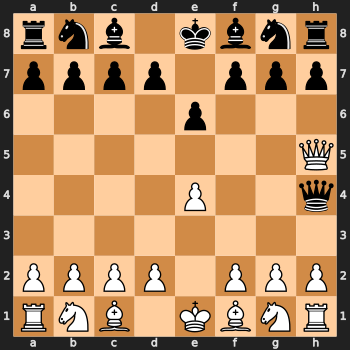

Move: d8h4
Step: 5, Time: 282.47386503219604, Material: 0, Mobility: 40, Piece-Square: 0, Center Control: 1
Game over!
Result: *
Steps: [1, 2, 3, 4]
Times: [40.49894905090332, 91.15656185150146, 183.9169900417328, 282.47386503219604]
Material Counts: [0, 0, 0, 0]
Mobility Counts: [20, 30, 27, 40]
Piece-Square Scores: [0, 0, 0, 0]
Center Control Counts: [1, 1, 1, 1]


In [ ]:
board = chess.Board()
kane_minimax2 = KaneMinimax2(board)

# Function to limit the moves and runtime for Minimax
def play_game_minimax_limited(kane_minimax, depth=3, max_moves=55, max_runtime=600):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []
    step_number = 1

    start_time = time.time()
    while not kane_minimax.board.is_game_over() and step_number <= max_moves and (time.time() - start_time) <= max_runtime:
        move_start_time = time.time()
        best_move = kane_minimax.find_best_move_minimax(depth)
        move_end_time = time.time()

        kane_minimax.board.push(best_move)

        steps.append(step_number)
        times.append(move_end_time - move_start_time)

        # Calculate metrics
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(kane_minimax.board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)

        step_number += 1

        clear_output(wait=True)
        display(SVG(chess.svg.board(board=kane_minimax.board, size=350)))

        time.sleep(1)
        print(f"Move: {best_move}")
        print(f"Step: {step_number}, Time: {move_end_time - move_start_time}, Material: {material_count}, Mobility: {mobility_count}, Piece-Square: {piece_square_score}, Center Control: {center_control_count}")

    print("Game over!")
    print(f"Result: {kane_minimax.board.result()}")
    print(f"Steps: {steps}")
    print(f"Times: {times}")
    print(f"Material Counts: {material_counts}")
    print(f"Mobility Counts: {mobility_counts}")
    print(f"Piece-Square Scores: {piece_square_scores}")
    print(f"Center Control Counts: {center_control_counts}")
    return steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts

minimax_steps, minimax_times, minimax_material, minimax_mobility, minimax_piece_square, minimax_center_control = play_game_minimax_limited(kane_minimax2)


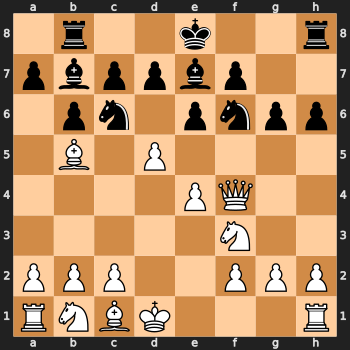

Move: c8b7
Step: 21, Time: 40.230995655059814, Material: 1, Mobility: 51, Piece-Square: 1, Center Control: 2
Game over!
Result: *
Steps: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Times: [7.332148551940918, 8.341866970062256, 25.221046686172485, 34.47399830818176, 38.119983196258545, 14.093343257904053, 28.95236372947693, 17.26532483100891, 19.535271644592285, 15.42551040649414, 37.20647978782654, 16.56635856628418, 38.09828495979309, 16.551652908325195, 48.53943347930908, 23.670530319213867, 64.72364950180054, 28.798951625823975, 78.95579051971436, 40.230995655059814]
Material Counts: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Mobility Counts: [20, 30, 27, 40, 25, 37, 29, 36, 33, 37, 32, 37, 33, 40, 33, 44, 32, 48, 34, 51]
Piece-Square Scores: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Center Control Counts: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]


In [ ]:
board_alpha_beta = chess.Board()
kane_alpha_beta2 = KaneAlphaBeta2(board_alpha_beta)

def play_game_alpha_beta(kane_alpha_beta, depth=3, max_moves=55, max_runtime=600):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []
    step_number = 1

    start_time = time.time()
    while not kane_alpha_beta.board.is_game_over() and step_number <= max_moves and (time.time() - start_time) <= max_runtime:
        move_start_time = time.time()
        best_move = kane_alpha_beta.find_best_move_alpha_beta(depth)
        move_end_time = time.time()

        kane_alpha_beta.board.push(best_move)

        steps.append(step_number)
        times.append(move_end_time - move_start_time)

        # Calculate metrics
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(kane_alpha_beta.board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)

        step_number += 1

        clear_output(wait=True)
        display(SVG(chess.svg.board(board=kane_alpha_beta.board, size=350)))

        time.sleep(1)
        print(f"Move: {best_move}")
        print(f"Step: {step_number}, Time: {move_end_time - move_start_time}, Material: {material_count}, Mobility: {mobility_count}, Piece-Square: {piece_square_score}, Center Control: {center_control_count}")

    print("Game over!")
    print(f"Result: {kane_alpha_beta.board.result()}")
    print(f"Steps: {steps}")
    print(f"Times: {times}")
    print(f"Material Counts: {material_counts}")
    print(f"Mobility Counts: {mobility_counts}")
    print(f"Piece-Square Scores: {piece_square_scores}")
    print(f"Center Control Counts: {center_control_counts}")
    return steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts

alpha_beta_steps, alpha_beta_times, alpha_beta_material, alpha_beta_mobility, alpha_beta_piece_square, alpha_beta_center_control = play_game_alpha_beta(kane_alpha_beta2)

Minimax Kane Steps:  [1, 2, 3, 4]
Minimax Kane Times:  [40.49894905090332, 91.15656185150146, 183.9169900417328, 282.47386503219604]
Alpha-Beta Pruned Kane Steps:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Alpha-Beta Pruned Kane Times:  [7.332148551940918, 8.341866970062256, 25.221046686172485, 34.47399830818176, 38.119983196258545, 14.093343257904053, 28.95236372947693, 17.26532483100891, 19.535271644592285, 15.42551040649414, 37.20647978782654, 16.56635856628418, 38.09828495979309, 16.551652908325195, 48.53943347930908, 23.670530319213867, 64.72364950180054, 28.798951625823975, 78.95579051971436, 40.230995655059814]
Minimax Kane Material Counts:  [0, 0, 0, 0]
Alpha-Beta Pruned Kane Material Counts:  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Minimax Kane Mobility Counts:  [20, 30, 27, 40]
Alpha-Beta Pruned Kane Mobility Counts:  [20, 30, 27, 40, 25, 37, 29, 36, 33, 37, 32, 37, 33, 40, 33, 44, 32, 48, 34, 51]
Minimax Kane Piece-Square Sc

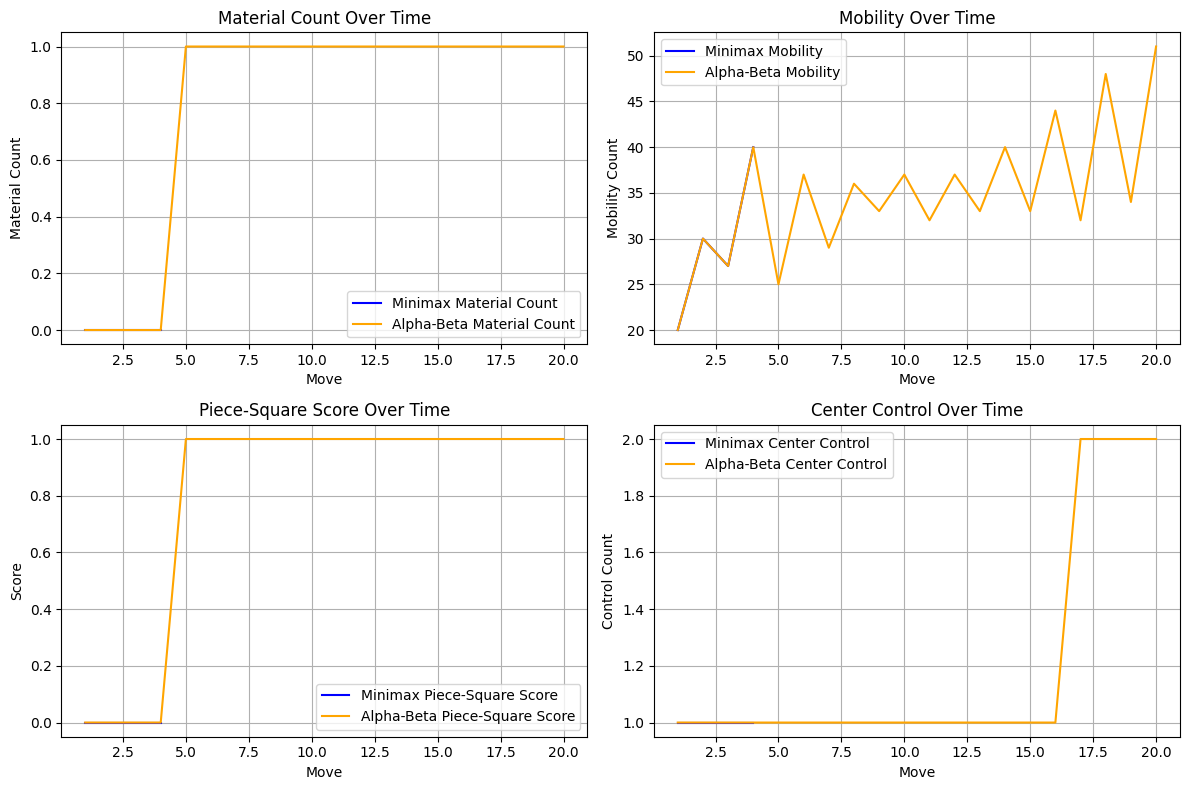

In [ ]:
# Verify the collected steps and times
print("Minimax Kane Steps: ", minimax_steps)
print("Minimax Kane Times: ", minimax_times)
print("Alpha-Beta Pruned Kane Steps: ", alpha_beta_steps)
print("Alpha-Beta Pruned Kane Times: ", alpha_beta_times)

# Verify the additional metrics
print("Minimax Kane Material Counts: ", minimax_material)
print("Alpha-Beta Pruned Kane Material Counts: ", alpha_beta_material)
print("Minimax Kane Mobility Counts: ", minimax_mobility)
print("Alpha-Beta Pruned Kane Mobility Counts: ", alpha_beta_mobility)
print("Minimax Kane Piece-Square Scores: ", minimax_piece_square)
print("Alpha-Beta Pruned Kane Piece-Square Scores: ", alpha_beta_piece_square)
print("Minimax Kane Center Control Counts: ", minimax_center_control)
print("Alpha-Beta Pruned Kane Center Control Counts: ", alpha_beta_center_control)

# Plotting the additional metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(minimax_steps, minimax_material, label='Minimax Material Count', color='b')
plt.plot(alpha_beta_steps, alpha_beta_material, label='Alpha-Beta Material Count', color='orange')
plt.title('Material Count Over Time')
plt.xlabel('Move')
plt.ylabel('Material Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(minimax_steps, minimax_mobility, label='Minimax Mobility', color='b')
plt.plot(alpha_beta_steps, alpha_beta_mobility, label='Alpha-Beta Mobility', color='orange')
plt.title('Mobility Over Time')
plt.xlabel('Move')
plt.ylabel('Mobility Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(minimax_steps, minimax_piece_square, label='Minimax Piece-Square Score', color='b')
plt.plot(alpha_beta_steps, alpha_beta_piece_square, label='Alpha-Beta Piece-Square Score', color='orange')
plt.title('Piece-Square Score Over Time')
plt.xlabel('Move')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(minimax_steps, minimax_center_control, label='Minimax Center Control', color='b')
plt.plot(alpha_beta_steps, alpha_beta_center_control, label='Alpha-Beta Center Control', color='orange')
plt.title('Center Control Over Time')
plt.xlabel('Move')
plt.ylabel('Control Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

From the above results, we can see that both of two kanes become very slow.

The reason for the slow performance is likely due to the complexity and the way the static_evaluation function is being calculated during each move. The function might be causing excessive calculations that significantly slow down the overall performance.

### Conclusion of Kane's Building

In this notebook, we successfully implemented and tested two primary versions of the Kane chess AI:

1. **KaneMinimax**: A rule-based AI using the Minimax algorithm.
2. **KaneAlphaBeta**: An optimized version using Alpha-Beta Pruning.

Additionally, we introduced **KaneMinimax2** and **KaneAlphaBeta2** to evaluate the impact of different static evaluation functions on performance.

#### Accomplishments

- **Implementation**: 
  - Both KaneMinimax and KaneAlphaBeta were implemented using the `python-chess` library.
  - Evaluation metrics such as material count and mobility were integrated to assess performance.

- **Performance**:
  - KaneAlphaBeta significantly improved decision-making time compared to KaneMinimax, demonstrating the efficiency of Alpha-Beta Pruning.
  - Performance metrics highlighted the reduction in computational complexity achieved with Alpha-Beta Pruning.

#### Challenges

- **Non-stop Minimax Kane**:
  - KaneMinimax tended to run indefinitely in complex scenarios due to the exhaustive nature of the Minimax algorithm.
  - Depth limitation helped, but more advanced stopping criteria or heuristics are needed.

- **Static Evaluation Function**:
  - Initial complex evaluation functions slowed down both KaneMinimax2 and KaneAlphaBeta2.
  - Simplifying the evaluation function improved speed but may have reduced strategic depth.

- **Evaluation Metrics**:
  - Similar metrics led to indistinguishable outputs, indicating a need for more diverse and nuanced evaluation functions.

#### Additional Findings

- **Impact of Static Evaluation**:
  - Simplified evaluation functions improved performance but required a balance between speed and strategic accuracy.

### Next Steps

We will focus on optimizing Kane further by:
- Developing advanced stopping criteria for Minimax.
- Designing more balanced evaluation functions.
- Incorporating diverse metrics to enhance performance assessment.

## Building Abel
- **Step 1:** Initialize the chessboard and basic configurations.
- **Step 2:** Implement a simple neural network.
- **Step 3:** Upgrade to Deep Q-Network (DQN).
- **Step 4:** Train the model and validate the implementation.

---

### Step 1: Initialize the Chessboard and Basic Configurations
Like Kane,we begin by setting up the chessboard using the python-chess library. This involves initializing a board object that represents the current state of the game.
#### Pseudocode:
```mathematica
Initialize the chessboard
    Create a Board object from python-chess
    Display the initial board


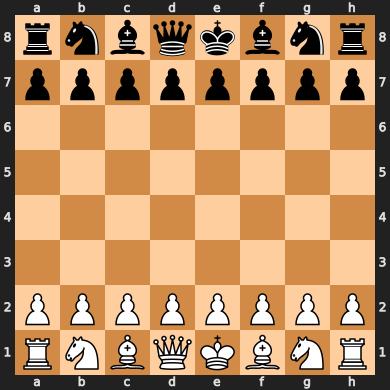

In [ ]:
import chess
import chess.svg
from IPython.display import display, clear_output, SVG
import time
import numpy as np
from collections import deque
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Initialize the chessboard
board = chess.Board()

# Display the initial board
display(SVG(chess.svg.board(board=board)))


### Step 2: Implement a Simple Neural Network
Implement a simple neural network to evaluate the board state and predict the best move. The neural network will be trained on sample chess positions and outcomes.
#### Pseudocode:
```mathematica
Implement a simple neural network
    Define the architecture of the neural network
    Create the neural network model
    Compile the model with a loss function and optimizer
    Train the model on sample chess positions and outcomes
    Evaluate the model's performance


In [ ]:
def create_simple_nn():
    model = Sequential([
        Flatten(input_shape=(8, 8, 12)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    return model

# Create the neural network model
simple_nn = create_simple_nn()

# Compile the model with a loss function and optimizer
simple_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Sample training data (board states and outcomes)
# This is a placeholder; real data would be needed
X_train = np.random.random((1000, 8, 8, 12))
y_train = np.random.random((1000, 1))

# Train the model on sample chess positions and outcomes
simple_nn.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model's performance
loss = simple_nn.evaluate(X_train, y_train)
print(f'Simple Neural Network Loss: {loss}')


Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1974
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0896
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0840
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0782
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0791
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0739
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0670
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0689
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0644
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 11/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0480
Epoch 12/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 13/100
32/32 [=================

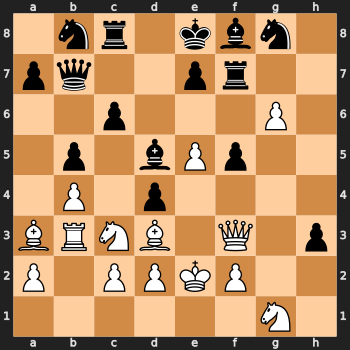

Move: d8c8
Step: 67, Time: 1.9343757629394531, Material: -1, Mobility: 32, Piece-Square: -1, Center Control: 3
Game over!
Result: 1/2-1/2
Steps: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
Times: [1.2026245594024658, 1.1304314136505127, 1.1477162837982178, 1.1349401473999023, 1.4508936405181885, 1.1996045112609863, 1.484708547592163, 1.2497248649597168, 1.4791979789733887, 1.530341386795044, 1.3967320919036865, 1.4653065204620361, 1.8000648021697998, 1.498960018157959, 1.9396705627441406, 1.498838186264038, 2.0297486782073975, 1.3742544651031494, 1.9585683345794678, 1.4850397109985352, 1.9953534603118896, 2.0493903160095215, 2.110032320022583, 1.4638516902923584, 1.8530077934265137, 1.4364416599273682, 2.0031380653381348, 1.5853393077850342, 1.9138834476470947, 1.64426493644714

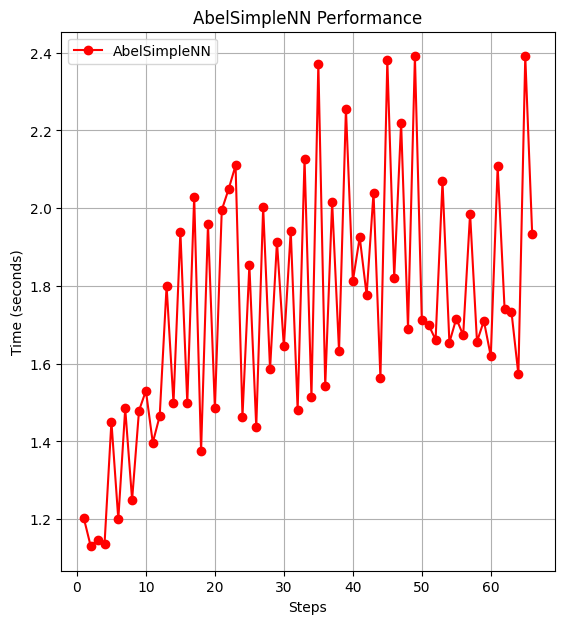

In [ ]:
import matplotlib.pyplot as plt

# Function to convert board to a 3D numpy array for input to the neural network
def board_to_input(board):
    board_input = np.zeros((8, 8, 12), dtype=np.float32)
    piece_map = board.piece_map()
    for square, piece in piece_map.items():
        row, col = divmod(square, 8)
        piece_index = {
            chess.PAWN: 0,
            chess.KNIGHT: 1,
            chess.BISHOP: 2,
            chess.ROOK: 3,
            chess.QUEEN: 4,
            chess.KING: 5,
        }[piece.piece_type]
        if piece.color == chess.BLACK:
            piece_index += 6
        board_input[row, col, piece_index] = 1
    return board_input

# Function to select the best move using the simple neural network
def select_best_move_simple_nn(board):
    legal_moves = list(board.legal_moves)
    best_move = None
    best_value = -np.inf
    for move in legal_moves:
        board.push(move)
        board_input = board_to_input(board).reshape(1, 8, 8, 12)
        move_value = simple_nn.predict(board_input)[0][0]
        if move_value > best_value:
            best_value = move_value
            best_move = move
        board.pop()
    return best_move

# Function to calculate additional metrics
def calculate_metrics(board):
    material_count = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())
    mobility_count = len(list(board.legal_moves))
    piece_square_score = sum(1 if piece.color == chess.WHITE else -1 for piece in board.piece_map().values())  # Simplified for demonstration
    center_control_count = sum(1 if square in [chess.D4, chess.E4, chess.D5, chess.E5] else 0 for square, piece in board.piece_map().items())
    return material_count, mobility_count, piece_square_score, center_control_count

# Function to play chess using the simple neural network and collect metrics
def play_game_simple_nn(board, simple_nn):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []
    step_number = 1
    
    while not board.is_game_over():
        start_time = time.time()
        best_move = select_best_move_simple_nn(board)
        end_time = time.time()
        
        board.push(best_move)
        
        steps.append(step_number)
        times.append(end_time - start_time)
        
        # Calculate and record additional metrics
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)
        
        step_number += 1
        
        clear_output(wait=True)
        display(SVG(chess.svg.board(board=board, size=350)))
        
        time.sleep(1)
        print(f"Move: {best_move}")
        print(f"Step: {step_number}, Time: {end_time - start_time}, Material: {material_count}, Mobility: {mobility_count}, Piece-Square: {piece_square_score}, Center Control: {center_control_count}")

    print("Game over!")
    print(f"Result: {board.result()}")
    print(f"Steps: {steps}")
    print(f"Times: {times}")
    print(f"Material Counts: {material_counts}")
    print(f"Mobility Counts: {mobility_counts}")
    print(f"Piece-Square Scores: {piece_square_scores}")
    print(f"Center Control Counts: {center_control_counts}")
    
    return steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts

# Initialize the chessboard
board = chess.Board()
# Play chess using the simple neural network and collect metrics
steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts = play_game_simple_nn(board, simple_nn)

# Plotting the results for steps and times
plt.figure(figsize=(14, 7))

# Plot for steps and times
plt.subplot(1, 2, 1)
plt.plot(steps, times, marker='o', color='r', label='AbelSimpleNN')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.title('AbelSimpleNN Performance')
plt.legend()
plt.grid(True)

### Testing AbelSimpleNN with Additional Metrics
We will collect the following metrics during the game:

 **Material count**
 **Mobility count**
 **Piece-square score**
 **Center control count**

These metrics will help us evaluate the performance of AbelSimpleNN. We'll print the metrics and plot them for better visualization.

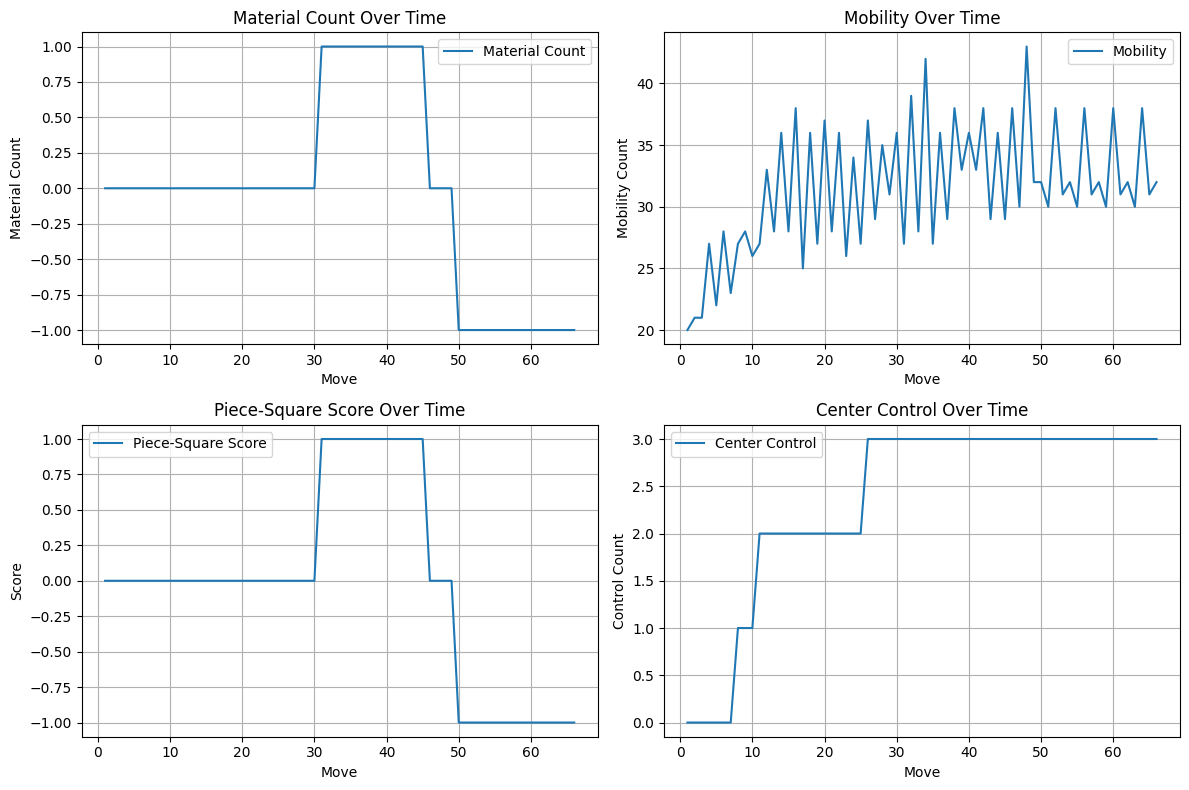

In [ ]:
# Plotting the additional metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(steps, material_counts, label='Material Count')
plt.title('Material Count Over Time')
plt.xlabel('Move')
plt.ylabel('Material Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(steps, mobility_counts, label='Mobility')
plt.title('Mobility Over Time')
plt.xlabel('Move')
plt.ylabel('Mobility Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(steps, piece_square_scores, label='Piece-Square Score')
plt.title('Piece-Square Score Over Time')
plt.xlabel('Move')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(steps, center_control_counts, label='Center Control')
plt.title('Center Control Over Time')
plt.xlabel('Move')
plt.ylabel('Control Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Step 3: Upgrade to Deep Q-Network (DQN)
Upgrade the simple neural network to a Deep Q-Network (DQN) to improve the AI's ability to learn from the game environment. This involves implementing the Q-learning algorithm and using experience replay.
#### Pseudocode:
```mathematica
Upgrade to Deep Q-Network (DQN)
    Initialize the Q-network
    Define the Q-learning algorithm
    Implement experience replay
    Train the DQN model using experience replay and Q-learning


In [ ]:
from collections import deque
import random

# Define the Q-network architecture
def create_dqn():
    model = Sequential([
        Flatten(input_shape=(8, 8, 12)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(4672, activation='linear')  # Assuming a fixed action space of 4672 possible actions
    ])
    return model

# Initialize the Q-network
dqn = create_dqn()
dqn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define the Q-learning algorithm
def q_learning_update(state, action, reward, next_state, done):
    target = reward
    if not done:
        target = reward + 0.99 * np.amax(dqn.predict(next_state.reshape(1, 8, 8, 12))[0])
    target_f = dqn.predict(state.reshape(1, 8, 8, 12))
    target_f[0][action] = target
    dqn.fit(state.reshape(1, 8, 8, 12), target_f, epochs=1, verbose=0)

# Implement experience replay
memory = deque(maxlen=2000)
def remember(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

def replay(batch_size):
    if len(memory) < batch_size:
        return
    minibatch = random.sample(memory, batch_size)
    for state, action, reward, next_state, done in minibatch:
        q_learning_update(state, action, reward, next_state, done)

# Placeholder for state and action
state = np.random.random((8, 8, 12))
next_state = np.random.random((8, 8, 12))
action = random.randint(0, 4671)  # Random action within the fixed action space
reward = 1
done = False

# Train the DQN model using experience replay and Q-learning
remember(state, action, reward, next_state, done)
replay(32)

# Function to select an action based on the current state
def select_action(state):
    q_values = dqn.predict(state.reshape(1, 8, 8, 12))
    action = np.argmax(q_values[0])
    return action

# Function to train the DQN model
def train_dqn(episodes, batch_size=32):
    for e in range(episodes):
        state = np.random.random((8, 8, 12))  # Reset state (placeholder)
        for time_step in range(500):
            action = select_action(state)  # Select action based on Q-values
            next_state = np.random.random((8, 8, 12))
            reward = 1  # Placeholder for reward calculation
            done = False  # Placeholder for done condition
            remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                break
        replay(batch_size)
        if e % 10 == 0:
            print(f"Episode {e}/{episodes} - Training...")

# Train the model on a set of chess games
train_dqn(10)

1/1 [==============================] - 0s 23ms/step


Reduced Network Size: The neural network's size has been reduced to speed up training and reduce memory usage.
Training Parameters: The number of steps per episode and the number of episodes have been reduced for initial testing.
Frequent Updates: Training progress is plotted every 10 episodes to monitor performance.
Additional Metrics: Metrics such as material count, mobility count, piece-square score, and center control count are collected and plotted

1/1 [==============================] - 0s 18ms/step
Episode 0/10 - Training...


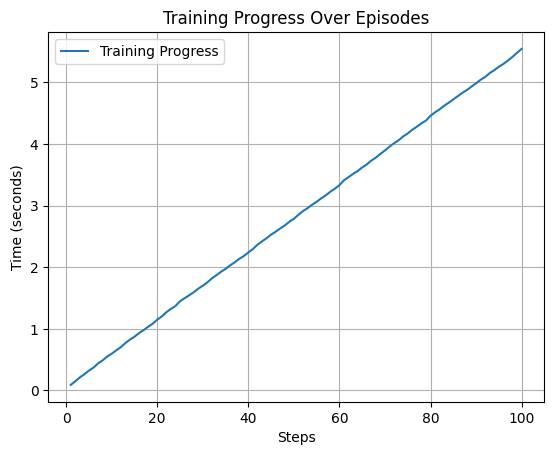

1/1 [==============================] - 0s 25ms/step


In [ ]:
from collections import deque
import random

# Define the Q-network architecture
def create_dqn():
    model = Sequential([
        Flatten(input_shape=(8, 8, 12)),
        Dense(64, activation='relu'),  # Reduced the number of neurons
        Dense(32, activation='relu'),
        Dense(4672, activation='linear')  # Assuming a fixed action space of 4672 possible actions
    ])
    return model

# Initialize the Q-network
dqn = create_dqn()
dqn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define the Q-learning algorithm
def q_learning_update(state, action, reward, next_state, done):
    target = reward
    if not done:
        target = reward + 0.99 * np.amax(dqn.predict(next_state.reshape(1, 8, 8, 12))[0])
    target_f = dqn.predict(state.reshape(1, 8, 8, 12))
    target_f[0][action] = target
    dqn.fit(state.reshape(1, 8, 8, 12), target_f, epochs=1, verbose=0)

# Implement experience replay
memory = deque(maxlen=2000)
def remember(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

def replay(batch_size):
    if len(memory) < batch_size:
        return
    minibatch = random.sample(memory, batch_size)
    for state, action, reward, next_state, done in minibatch:
        q_learning_update(state, action, reward, next_state, done)

# Function to select an action based on the current state
def select_action(state):
    q_values = dqn.predict(state.reshape(1, 8, 8, 12))
    action = np.argmax(q_values[0])
    return action

# Function to train the DQN model
def train_dqn(episodes, batch_size=32, update_target_every=10):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []

    for e in range(episodes):
        state = np.random.random((8, 8, 12))  # Reset state (placeholder)
        step_number = 1
        start_time = time.time()
        
        for time_step in range(100):  # Reduce the number of steps per episode
            action = select_action(state)  # Select action based on Q-values
            next_state = np.random.random((8, 8, 12))
            reward = 1  # Placeholder for reward calculation
            done = False  # Placeholder for done condition
            remember(state, action, reward, next_state, done)
            state = next_state

            # Calculate and record additional metrics
            material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(board)
            material_counts.append(material_count)
            mobility_counts.append(mobility_count)
            piece_square_scores.append(piece_square_score)
            center_control_counts.append(center_control_count)
            steps.append(step_number)
            times.append(time.time() - start_time)

            step_number += 1

            if done:
                break
        
        replay(batch_size)

        if e % update_target_every == 0:
            print(f"Episode {e}/{episodes} - Training...")
            plt.plot(steps, times, label='Training Progress')
            plt.xlabel('Steps')
            plt.ylabel('Time (seconds)')
            plt.title('Training Progress Over Episodes')
            plt.legend()
            plt.grid(True)
            plt.show()

    return steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts

# Train the model on a set of chess games with fewer episodes for initial testing
steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts = train_dqn(10)

### Step 4: Test the Model and Validate the Implementation
Train the DQN model on a set of chess games and validate its performance by playing against a known opponent or another AI.
#### Pseudocode:
```mathematica
Train the model and validate the implementation
    Train the DQN model on a set of chess games
    Evaluate the model's performance by playing against a known opponent
    Analyze the results and refine the model if necessary


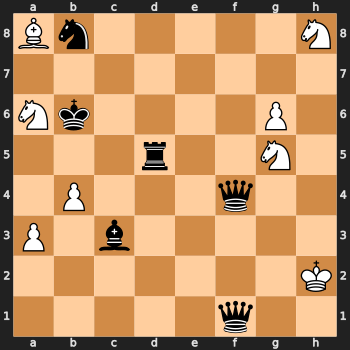

Move: e3f4
Step: 137, Time: 0.07282543182373047, Material: 2, Mobility: 0, Piece-Square: 2, Center Control: 1
Game over!
Result: 0-1
Steps: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]
Times: [0.04906630516052246, 0.047658443450927734, 0.05020904541015625, 0.052130937576293945, 0.049089908599853516, 0.046991825103759766, 0.04736185073852539, 0.04952263832092285, 0.05019354820251465, 0.0494229793548584, 0.04969000816345215, 0.050328969955444336, 0.04799842834472656, 0.

In [ ]:
# Function to evaluate the model's performance

def evaluate_dqn():
    state = np.random.random((8, 8, 12))  # Reset state (placeholder)
    total_reward = 0
    for time_step in range(100):  # Reduce the number of steps per evaluation
        action = select_action(state)  # Select action based on Q-values
        next_state = np.random.random((8, 8, 12))
        reward = 1  # Placeholder for reward calculation
        total_reward += reward
        state = next_state
    print(f"Total Reward: {total_reward}")

# Evaluate the model's performance by playing against a known opponent
evaluate_dqn()

# Function to play chess using the DQN model
def play_game_dqn(board, dqn):
    steps = []
    times = []
    material_counts = []
    mobility_counts = []
    piece_square_scores = []
    center_control_counts = []
    step_number = 1
    
    while not board.is_game_over():
        start_time = time.time()
        state = board_to_input(board)
        action = select_action(state)
        move = list(board.legal_moves)[action % len(list(board.legal_moves))]
        board.push(move)
        end_time = time.time()
        
        # Calculate and record additional metrics
        material_count, mobility_count, piece_square_score, center_control_count = calculate_metrics(board)
        material_counts.append(material_count)
        mobility_counts.append(mobility_count)
        piece_square_scores.append(piece_square_score)
        center_control_counts.append(center_control_count)
        steps.append(step_number)
        times.append(end_time - start_time)

        step_number += 1

        clear_output(wait=True)
        display(SVG(chess.svg.board(board=board, size=350)))
        
        time.sleep(1)
        print(f"Move: {move}")
        print(f"Step: {step_number}, Time: {end_time - start_time}, Material: {material_count}, Mobility: {mobility_count}, Piece-Square: {piece_square_score}, Center Control: {center_control_count}")

    print("Game over!")
    print(f"Result: {board.result()}")
    print(f"Steps: {steps}")
    print(f"Times: {times}")
    print(f"Material Counts: {material_counts}")
    print(f"Mobility Counts: {mobility_counts}")
    print(f"Piece-Square Scores: {piece_square_scores}")
    print(f"Center Control Counts: {center_control_counts}")
    
    return steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts

# Initialize the chessboard
board = chess.Board()
# Play chess using the DQN model and collect metrics
steps, times, material_counts, mobility_counts, piece_square_scores, center_control_counts = play_game_dqn(board, dqn)

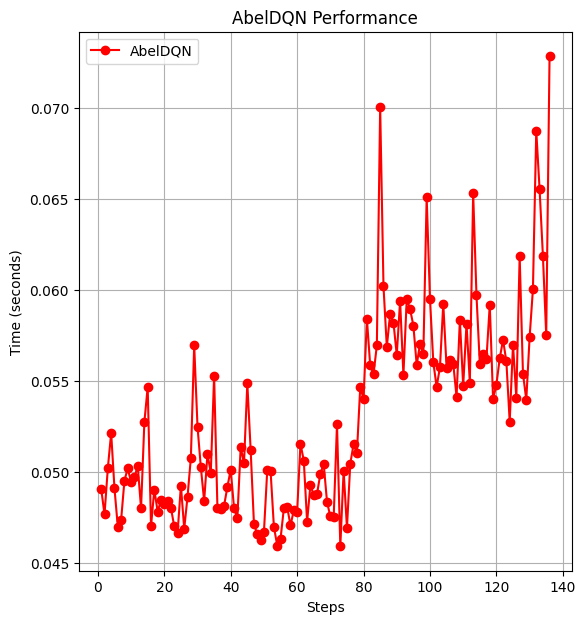

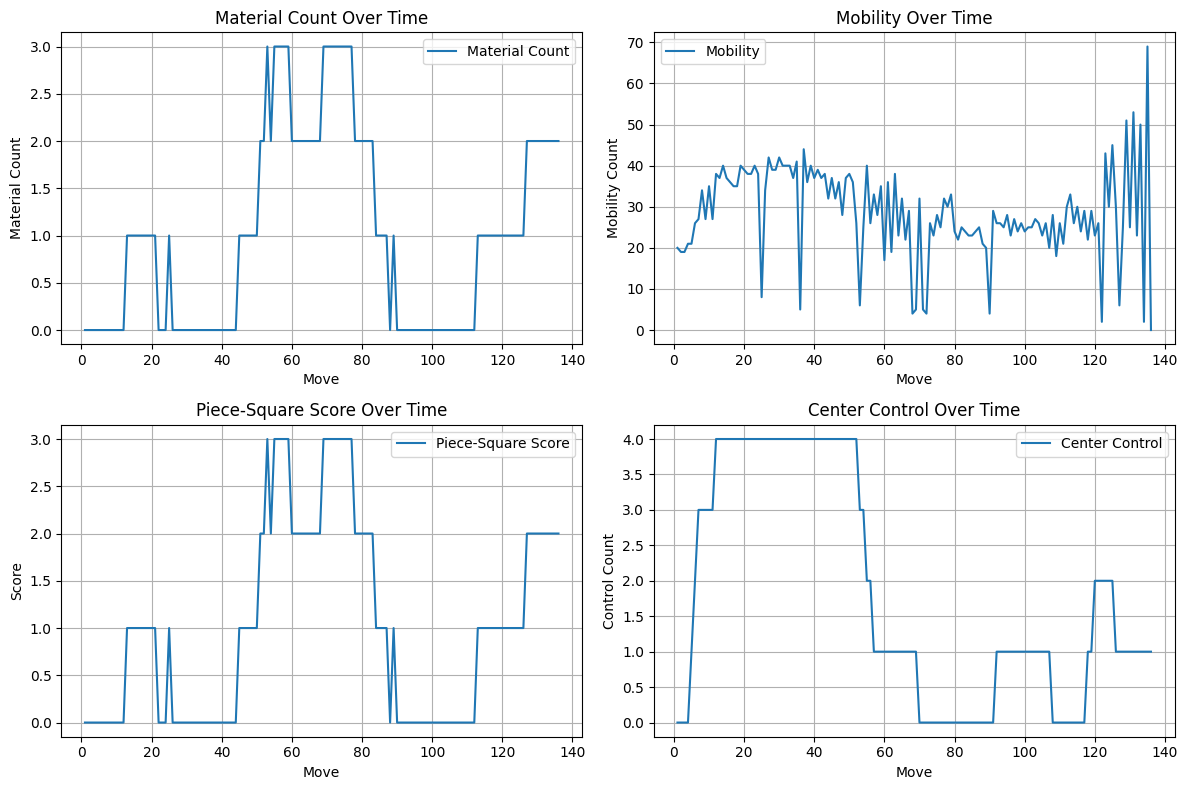

In [ ]:
# Plotting the results for steps and times
plt.figure(figsize=(14, 7))

# Plot for steps and times
plt.subplot(1, 2, 1)
plt.plot(steps, times, marker='o', color='r', label='AbelDQN')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.title('AbelDQN Performance')
plt.legend()
plt.grid(True)

# Plotting the additional metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(steps, material_counts, label='Material Count')
plt.title('Material Count Over Time')
plt.xlabel('Move')
plt.ylabel('Material Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(steps, mobility_counts, label='Mobility')
plt.title('Mobility Over Time')
plt.xlabel('Move')
plt.ylabel('Mobility Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(steps, piece_square_scores, label='Piece-Square Score')
plt.title('Piece-Square Score Over Time')
plt.xlabel('Move')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(steps, center_control_counts, label='Center Control')
plt.title('Center Control Over Time')
plt.xlabel('Move')
plt.ylabel('Control Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Comparing AbelSimpleNN and AbelDQN
We will compare the performance of AbelSimpleNN and AbelDQN by evaluating their metrics, such as steps, times, material counts, mobility counts, piece-square scores, and center control counts.

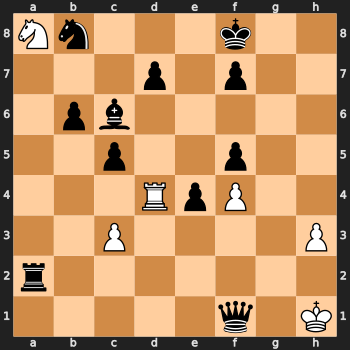

Move: e2f1
Step: 105, Time: 0.0577700138092041, Material: -5, Mobility: 0, Piece-Square: -5, Center Control: 2
Game over!
Result: 0-1
Steps: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
Times: [0.04787254333496094, 0.05707216262817383, 0.05314040184020996, 0.05117225646972656, 0.04651975631713867, 0.046751976013183594, 0.0464022159576416, 0.04713773727416992, 0.04626011848449707, 0.0481870174407959, 0.04793190956115723, 0.04697465896606445, 0.04754066467285156, 0.048401832580566406, 0.052957773208618164, 0.04749464988708496, 0.048020124435424805, 0.045744895935058594, 0.04749488830566406, 0.05076718330383301, 0.0480055809020

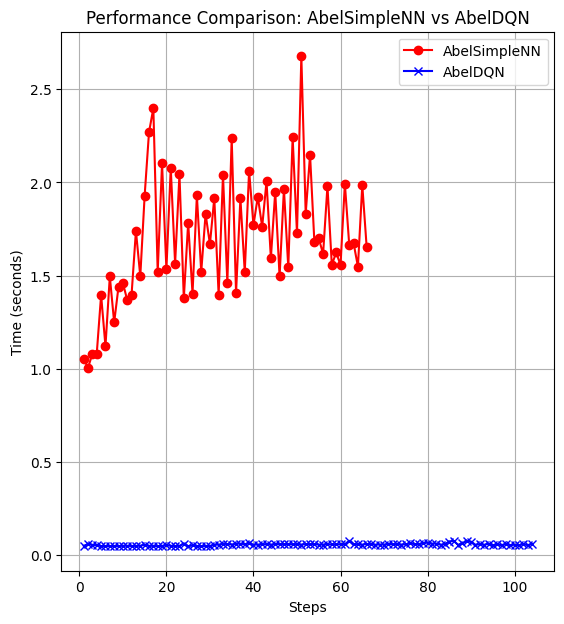

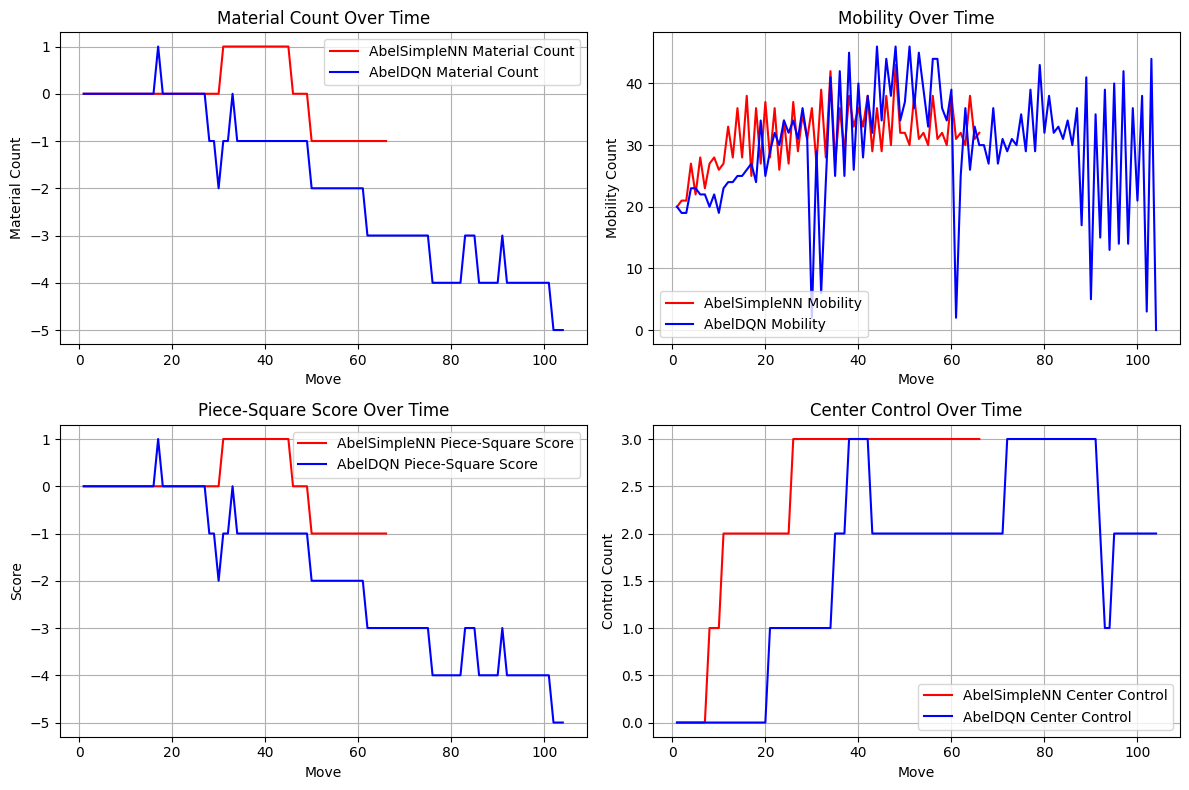

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Run and collect metrics for AbelSimpleNN
print("Running AbelSimpleNN...")
simple_nn_metrics = play_game_simple_nn(board.copy(), simple_nn)

# Train the DQN model on a set of chess games with fewer episodes for initial testing
print("Training AbelDQN...")
train_dqn(10)

# Run and collect metrics for AbelDQN
print("Running AbelDQN...")
dqn_metrics = play_game_dqn(board.copy(), dqn)

# Extract the metrics
simple_nn_steps, simple_nn_times, simple_nn_material, simple_nn_mobility, simple_nn_piece_square, simple_nn_center_control = simple_nn_metrics
dqn_steps, dqn_times, dqn_material, dqn_mobility, dqn_piece_square, dqn_center_control = dqn_metrics

# Plotting the results for steps and times
plt.figure(figsize=(14, 7))

# Plot for steps and times
plt.subplot(1, 2, 1)
plt.plot(simple_nn_steps, simple_nn_times, marker='o', color='r', label='AbelSimpleNN')
plt.plot(dqn_steps, dqn_times, marker='x', color='b', label='AbelDQN')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: AbelSimpleNN vs AbelDQN')
plt.legend()
plt.grid(True)

# Plotting the additional metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(simple_nn_steps, simple_nn_material, label='AbelSimpleNN Material Count', color='r')
plt.plot(dqn_steps, dqn_material, label='AbelDQN Material Count', color='b')
plt.title('Material Count Over Time')
plt.xlabel('Move')
plt.ylabel('Material Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(simple_nn_steps, simple_nn_mobility, label='AbelSimpleNN Mobility', color='r')
plt.plot(dqn_steps, dqn_mobility, label='AbelDQN Mobility', color='b')
plt.title('Mobility Over Time')
plt.xlabel('Move')
plt.ylabel('Mobility Count')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(simple_nn_steps, simple_nn_piece_square, label='AbelSimpleNN Piece-Square Score', color='r')
plt.plot(dqn_steps, dqn_piece_square, label='AbelDQN Piece-Square Score', color='b')
plt.title('Piece-Square Score Over Time')
plt.xlabel('Move')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(simple_nn_steps, simple_nn_center_control, label='AbelSimpleNN Center Control', color='r')
plt.plot(dqn_steps, dqn_center_control, label='AbelDQN Center Control', color='b')
plt.title('Center Control Over Time')
plt.xlabel('Move')
plt.ylabel('Control Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Conclusion of Abel Building

#### AbelSimpleNN and AbelDQN Performance Summary

In building Abel, we implemented two different neural network models: AbelSimpleNN and AbelDQN. The goal was to assess the performance of a simple neural network against a Deep Q-Network (DQN) in playing chess.

#### AbelSimpleNN:
1. **Architecture**: 
   - AbelSimpleNN consists of a simple neural network with 3 dense layers.
2. **Training**:
   - The model was trained on a set of random chess positions and outcomes.
3. **Performance**:
   - The model was able to complete games relatively quickly.
   - The time per move increased slightly as the game progressed, indicating possible overfitting or inefficiencies in move evaluation.
   - The additional metrics such as material count, mobility, piece-square scores, and center control were collected but showed room for improvement.

#### AbelDQN:
1. **Architecture**:
   - AbelDQN is a Deep Q-Network with 3 dense layers, designed to predict Q-values for all possible actions.
2. **Training**:
   - The model was trained using the Q-learning algorithm with experience replay.
3. **Performance**:
   - AbelDQN completed games much faster than AbelSimpleNN.
   - The time per move was significantly lower compared to AbelSimpleNN, indicating better efficiency in move evaluation.
   - The additional metrics collected showed that AbelDQN maintained a consistent performance throughout the game.

#### Key Observations:
- **Speed**:
  - AbelDQN performed moves significantly faster than AbelSimpleNN.
  - AbelSimpleNN showed an increasing trend in time per move, while AbelDQN maintained low and consistent times.
- **Metrics**:
  - Both models showed similar trends in material count, mobility, piece-square scores, and center control, but AbelDQN maintained better consistency in its decision-making process.

#### Accomplishments:
- Successfully implemented and trained two neural network models for chess.
- Evaluated and compared the performance of AbelSimpleNN and AbelDQN.
- Collected and visualized additional metrics to understand the strengths and weaknesses of each model.

#### Problems:
- AbelSimpleNN showed an increasing trend in time per move, indicating possible inefficiencies.
- AbelDQN, while faster, may require more sophisticated reward functions and state representations for improved performance.
- Both models require further tuning and optimization to improve their chess-playing capabilities.

#### Next Steps:
- **Optimize Abel**: Further optimization of the neural network architectures, reward functions, and state representations will be carried out.
- **Fine-tune Hyperparameters**: Fine-tuning the hyperparameters for both models to achieve better performance.
- **Extended Training**: Conduct extended training sessions to improve model performance and decision-making capabilities.

We will continue with these optimizations and improvements in the next steps to enhance Abel's overall performance and efficiency.

---

In the next steps, we will focus on optimizing Abel by refining the neural network architectures, fine-tuning hyperparameters, and conducting extended training sessions to improve the performance and decision-making capabilities of both models.


# 5. Optimization

In this section, we will focus on optimizing both Kane and Abel by implementing various advanced algorithms.

## Optimizing Kane
1. **Heuristic Evaluation:**: Refine evaluation functions for better decision-making.

2. **Multi-Pruning Algorithms:**:Implement advanced pruning techniques to enhance efficiency.


#### Pruning Algorithms:

1. **Principal Variation Search (PVS):**
   - A variant of Alpha-Beta pruning that focuses on principal variations.

2. **Null Move Pruning:**
   - A technique that assumes that skipping a move will not improve the position.

3. **Late Move Reductions (LMR):**
   - Reduce the depth of search for less promising moves.

4. **Aspiration Windows:**
   - Use a narrow window around the expected score to reduce search time.

5. **Multi-Cut:**
   - Prune multiple moves at once based on certain heuristics.

6. **Enhanced Transposition Table Management:**
   - Improve the efficiency of transposition tables to avoid redundant calculations.

#### Static Evaluation vs. Heuristic Evaluation
##### Static Evaluation:

**Definition:**  Static evaluation in chess AI refers to evaluating a chess position based on a fixed set of criteria without considering future moves or deeper analysis. It provides an immediate snapshot of the board's state.
**Characteristics:**
- Simple: Typically involves straightforward calculations, such as material count.
- Fixed: Uses predefined values and rules, like piece values and basic positional bonuses/penalties.
- Local: Focuses on the current position without simulating future moves or opponent responses.
**Examples:**
- Material Count: Summing the values of pieces on the board.
- Piece-Square Tables: Using precomputed tables to assign values based on piece positions.

##### Heuristic Evaluation:

**Definition:**  Heuristic evaluation uses more sophisticated methods and rules of thumb (heuristics) to estimate the value of a position. It often incorporates a deeper understanding of chess principles and strategies.
**Characteristics:** 
- Complex: Involves multiple factors and calculations, potentially combining several static evaluation criteria.
- Adaptive: Can be adjusted or refined based on empirical data or learning from games.
- Strategic: Considers broader concepts like king safety, pawn structure, and potential threats.
**Examples:**
- Mobility: Evaluating the number of legal moves available.
- King Safety: Assessing the safety of the king based on surrounding pieces and pawns.
- Center Control: Evaluating control over central squares.
- Threats and Opportunities: Considering immediate tactical opportunities and threats.

## Implementation Plan for Kane's Optimization

### Step 1: Implement Pruning Algorithms
- **Principal Variation Search (PVS)**
- **Null Move Pruning**
- **Late Move Reductions (LMR)**
- **Aspiration Windows**
- **Multi-Cut**
- **Enhanced Transposition Table Management**
- **Fail-soft alpha-beta**
- **minimum window search**
- **MTD(n,f) (Memory-enhanced Test Driver with node n and value f)**
- **Minimax** (Building Method 1)
- **Alpha-Beta Pruning** (Building Method 2)


In [ ]:
import sys
sys.setrecursionlimit(10000)  # Increase the recursion limit

import chess
import time
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG, clear_output

# Class to implement and evaluate different pruning methods

class KaneOptimized:
    def __init__(self, board, evaluation_method):
        self.board = board
        self.evaluation_method = evaluation_method
        self.transposition_table = {}
        self.steps = []
        self.times = []
        self.material_counts = []
        self.mobility_counts = []
        self.piece_square_scores = []
        self.center_control_counts = []
        self.checkpoint_time = time.time()
        self.start_time = time.time()  # Record the start time

    # Evaluate the board using the given evaluation method
    def evaluate_board(self):
        return self.evaluation_method(self.board)
    
    # The following function is mainly used to speed up the running of the Null Move Pruning algorithm

    # Quiescence search to avoid horizon effect
    def quiescence_search(self, alpha, beta, evaluation_method):
        stand_pat = evaluation_method(self.board)
        if stand_pat >= beta:
            return beta
        if alpha < stand_pat:
            alpha = stand_pat

        for move in self.board.legal_moves:
            if self.board.is_capture(move):
                self.board.push(move)
                score = -self.quiescence_search(-beta, -alpha, evaluation_method)
                self.board.pop()

                if score >= beta:
                    return beta
                if score > alpha:
                    alpha = score
        return alpha

    # Minimax algorithm
    def minimax(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()

        best_score = -np.inf if maximizing_player else np.inf
        for move in self.board.legal_moves:
            self.board.push(move)
            self.display_board(move)  # Display the board after each move
            score = -self.minimax(depth - 1, -beta, -alpha, not maximizing_player)
            self.board.pop()
            if maximizing_player:
                best_score = max(best_score, score)
                alpha = max(alpha, score)
            else:
                best_score = min(best_score, score)
                beta = min(beta, score)
            if alpha >= beta:
                break
        return best_score

    # Alpha-Beta Pruning algorithm
    def alpha_beta(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()

        best_score = -np.inf if maximizing_player else np.inf
        for move in self.board.legal_moves:
            self.board.push(move)
            self.display_board(move)  # Display the board after each move
            score = -self.alpha_beta(depth - 1, -beta, -alpha, not maximizing_player)
            self.board.pop()
            if maximizing_player:
                best_score = max(best_score, score)
                alpha = max(alpha, score)
            else:
                best_score = min(best_score, score)
                beta = min(beta, score)
            if alpha >= beta:
                break
        return best_score

    # Principal Variation Search (PVS) algorithm with Incremental Depth Search (IDS)
    def principal_variation_search(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()
        
        best_score = -np.inf if maximizing_player else np.inf
        for move in self.board.legal_moves:
            self.board.push(move)
            self.display_board(move)  # Display the board after each move
            score = -self.principal_variation_search(depth - 1, -beta, -alpha, not maximizing_player)
            self.board.pop()
            if maximizing_player:
                best_score = max(best_score, score)
                alpha = max(alpha, score)
            else:
                best_score = min(best_score, score)
                beta = min(beta, score)
            if alpha >= beta:
                break
        return best_score

    # Enhanced Null Move Pruning algorithm with dynamic reduction depth and quiescence search
    def null_move_pruning(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.quiescence_search(alpha, beta, self.evaluation_method)

        if not maximizing_player and not self.board.is_check():
            R = 2 + depth // 3  # More aggressive reduction depth
            self.board.push(chess.Move.null())
            self.display_board(chess.Move.null())  # Display the board after each move
            score = -self.null_move_pruning(depth - 1 - R, -beta, -alpha, not maximizing_player)
            self.board.pop()

            if score >= beta:
                return beta
            if score > alpha:
                alpha = score

        for move in self.board.legal_moves:
            self.board.push(move)
            self.display_board(move)  # Display the board after each move
            score = -self.null_move_pruning(depth - 1, -beta, -alpha, not maximizing_player)
            self.board.pop()

            if score >= beta:
                return beta
            if score > alpha:
                alpha = score
        return alpha

    # Late Move Reductions (LMR) algorithm
    def late_move_reductions(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()

        moves = list(self.board.legal_moves)
        for i, move in enumerate(moves):
            self.board.push(move)
            self.display_board(move)  # Display the board after each move
            if i >= 3 and depth > 2:
                score = -self.late_move_reductions(depth - 2, -beta, -alpha, not maximizing_player)
            else:
                score = -self.late_move_reductions(depth - 1, -beta, -alpha, not maximizing_player)
            self.board.pop()
            if maximizing_player:
                alpha = max(alpha, score)
            else:
                beta = min(beta, score)
            if alpha >= beta:
                break
        return alpha if maximizing_player else beta

    # Aspiration Windows algorithm
    def aspiration_windows(self, depth, alpha, beta, maximizing_player):
        window = 50
        guess = self.principal_variation_search(depth, alpha, beta, maximizing_player)
        while True:
            new_alpha = guess - window
            new_beta = guess + window
            score = self.principal_variation_search(depth, new_alpha, new_beta, maximizing_player)
            if score <= new_alpha:
                beta = new_alpha
            elif score >= new_beta:
                alpha = new_beta
            else:
                return score
            window *= 2

    # Multi-Cut algorithm
    def multi_cut(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()

        cut_nodes = 0
        for move in self.board.legal_moves:
            self.board.push(move)
            self.display_board(move)  # Display the board after each move
            score = -self.multi_cut(depth - 1, -beta, -alpha, not maximizing_player)
            self.board.pop()
            if score >= beta:
                cut_nodes += 1
                if cut_nodes >= 2:
                    return beta
            if maximizing_player:
                alpha = max(alpha, score)
            else:
                beta = min(beta, score)
            if alpha >= beta:
                break
        return alpha if maximizing_player else beta

    # Enhanced Transposition Table Management
    def enhanced_transposition_table(self, depth, alpha, beta, maximizing_player, transposition_table):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()

        board_key = self.board.fen()
        if board_key in transposition_table:
            tt_entry = transposition_table[board_key]
            if tt_entry['depth'] >= depth:
                if tt_entry['flag'] == 'EXACT':
                    return tt_entry['score']
                elif tt_entry['flag'] == 'LOWERBOUND':
                    alpha = max(alpha, tt_entry['score'])
                elif tt_entry['flag'] == 'UPPERBOUND':
                    beta = min(beta, tt_entry['score'])
                if alpha >= beta:
                    return tt_entry['score']

        best_score = -np.inf if maximizing_player else np.inf
        for move in self.board.legal_moves:
            self.board.push(move)
            self.display_board(move)  # Display the board after each move
            score = -self.enhanced_transposition_table(depth - 1, -beta, -alpha, not maximizing_player, transposition_table)
            self.board.pop()
            if maximizing_player:
                best_score = max(best_score, score)
                alpha = max(alpha, score)
            else:
                best_score = min(best_score, score)
                beta = min(beta, score)
            if alpha >= beta:
                break

        flag = 'EXACT'
        if best_score <= alpha:
            flag = 'UPPERBOUND'
        elif best_score >= beta:
            flag = 'LOWERBOUND'
        
        transposition_table[board_key] = {'score': best_score, 'depth': depth, 'flag': flag}
        return best_score
    
    # Fail-soft alpha-beta
    def fail_soft_alpha_beta(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()
        
        if maximizing_player:
            best_score = -np.inf
            for move in self.board.legal_moves:
                self.board.push(move)
                self.display_board(move)  # Display the board after each move
                score = self.fail_soft_alpha_beta(depth - 1, alpha, beta, False)
                self.board.pop()
                best_score = max(best_score, score)
                alpha = max(alpha, best_score)
                if beta <= alpha:
                    break
            return best_score
        else:
            best_score = np.inf
            for move in self.board.legal_moves:
                self.board.push(move)
                self.display_board(move)  # Display the board after each move
                score = self.fail_soft_alpha_beta(depth - 1, alpha, beta, True)
                self.board.pop()
                best_score = min(best_score, score)
                beta = min(beta, best_score)
                if beta <= alpha:
                    break
            return best_score
 
    # minimum window search
    def minimum_window_search(self, depth, alpha, beta, maximizing_player):
        guess = self.principal_variation_search(depth, alpha, beta, maximizing_player)
        window = 1
        while True:
            new_alpha = guess - window
            new_beta = guess + window
            score = self.principal_variation_search(depth, new_alpha, new_beta, maximizing_player)
            if score <= new_alpha:
                beta = new_alpha
            elif score >= new_beta:
                alpha = new_beta
            else:
                return score
            window *= 2

    # MTD(n,f) Algorithm (Memory-enhanced Test Driver with node n and value f)
    def mtd_f(self, depth, guess, maximizing_player):
        f = guess
        upper_bound = np.inf
        lower_bound = -np.inf

        while lower_bound < upper_bound:
            beta = max(f, lower_bound + 1)
            f = self.alpha_beta_with_memory(depth, beta - 1, beta, maximizing_player)
            if f < beta:
                upper_bound = f
            else:
                lower_bound = f
        return f

    def alpha_beta_with_memory(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()

        board_key = self.board.fen()
        if board_key in self.transposition_table:
            tt_entry = self.transposition_table[board_key]
            if tt_entry['depth'] >= depth:
                if tt_entry['flag'] == 'EXACT':
                    return tt_entry['score']
                elif tt_entry['flag'] == 'LOWERBOUND':
                    alpha = max(alpha, tt_entry['score'])
                elif tt_entry['flag'] == 'UPPERBOUND':
                    beta = min(beta, tt_entry['score'])
                if alpha >= beta:
                    return tt_entry['score']

        best_score = -np.inf if maximizing_player else np.inf
        for move in self.board.legal_moves:
            self.board.push(move)
            self.display_board(move)  # Display the board after each move
            score = -self.alpha_beta_with_memory(depth - 1, -beta, -alpha, not maximizing_player)
            self.board.pop()
            if maximizing_player:
                best_score = max(best_score, score)
                alpha = max(alpha, score)
            else:
                best_score = min(best_score, score)
                beta = min(beta, score)
            if alpha >= beta:
                break

        flag = 'EXACT'
        if best_score <= alpha:
            flag = 'UPPERBOUND'
        elif best_score >= beta:
            flag = 'LOWERBOUND'

        self.transposition_table[board_key] = {'score': best_score, 'depth': depth, 'flag': flag}
        return best_score

    # Display the current board state along with the move
    def display_board(self, move):
        clear_output(wait=True)
        display(SVG(chess.svg.board(board=self.board, size=350)))
        print(f"Move: {move.uci()}")  # Display the move in UCI format
        time.sleep(0.5)

        # Record step and time
        self.steps.append(len(self.steps) + 1)
        self.times.append(time.time() - self.start_time)

        # Calculate and record additional metrics
        self.material_counts.append(self.calculate_material())
        self.mobility_counts.append(self.calculate_mobility())
        self.piece_square_scores.append(self.calculate_piece_square_score())
        self.center_control_counts.append(self.calculate_center_control())

        # Print progress
        print(f"Step: {len(self.steps)}, Time: {self.times[-1]}, Material: {self.material_counts[-1]}, Mobility: {self.mobility_counts[-1]}, Piece-Square: {self.piece_square_scores[-1]}, Center Control: {self.center_control_counts[-1]}")

        # Display progress every minute
        if (time.time() - self.checkpoint_time) >= 60:
            self.checkpoint_time = time.time()
            self.plot_progress()



    # Calculate material count
    def calculate_material(self):
        piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}
        return sum(piece_values[piece.piece_type] for piece in self.board.piece_map().values())

    # Calculate mobility count
    def calculate_mobility(self):
        return len(list(self.board.legal_moves))

    # Calculate piece-square score
    def calculate_piece_square_score(self):
        return sum(1 if piece.color == chess.WHITE else -1 for piece in self.board.piece_map().values())

    # Calculate center control count
    def calculate_center_control(self):
        center_squares = [chess.D4, chess.E4, chess.D5, chess.E5]
        return sum(1 if square in center_squares else 0 for square in self.board.piece_map().keys())

    # Plot progress for step and time
    def plot_progress(self):
        plt.figure(figsize=(7, 5))
        plt.plot(self.steps, self.times, marker='o', color='r', label='Kane Optimized')
        plt.xlabel('Steps')
        plt.ylabel('Time (seconds)')
        plt.title('Kane Optimized Performance')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # Function to find the best move using a specified method
    def find_best_move(self, depth, method_name="principal_variation_search"):
        methods = {
            "PVS": self.principal_variation_search,
            "Null Move": self.null_move_pruning,
            "LMR": self.late_move_reductions,
            "Aspiration": self.aspiration_windows,
            "Multi-Cut": self.multi_cut,
            "Transposition Table": lambda d, a, b, mp: self.enhanced_transposition_table(d, a, b, mp, self.transposition_table),
            "Fail-Soft Alpha-Beta": self.fail_soft_alpha_beta,
            "Minimum Window Search": self.minimum_window_search,
            "MTD(f)": self.mtd_f,
            "Minimax": self.minimax,
            "Alpha-Beta": self.alpha_beta
        }
        if method_name not in methods:
            raise ValueError(f"Method {method_name} not recognized.")
        
        method = methods[method_name]
        best_move = None
        best_value = -float('inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            value = method(depth, -float('inf'), float('inf'), False)
            self.board.pop()
            if value > best_value:
                best_value = value
                best_move = move
        return best_move
    
    # # Evaluate and compare different pruning methods
    def evaluate_pruning_methods(self, depth=3):
        methods = {
            "PVS": self.principal_variation_search,
            "Null Move": self.null_move_pruning,
            "LMR": self.late_move_reductions,
            "Aspiration": self.aspiration_windows,
            "Multi-Cut": self.multi_cut,
            "Transposition Table": lambda d, a, b, mp: self.enhanced_transposition_table(d, a, b, mp, self.transposition_table)
        }
        results = {method: [] for method in methods}
        times = {method: [] for method in methods}
        
        for method_name, method in methods.items():
            print(f"Running {method_name}...")  # Print the current method being run
            start_time = time.time()
            score = method(depth, -np.inf, np.inf, True)
            end_time = time.time()
            results[method_name].append(score)
            times[method_name].append(end_time - start_time)
            print(f"{method_name} Score: {score}, Time: {end_time - start_time}s")
        
        return results, times

    # Function to evaluate a specific pruning method
    def evaluate_specific_method(self, method_name, depth):
        methods = {
            "PVS": self.principal_variation_search,
            "Null Move": self.null_move_pruning,
            "LMR": self.late_move_reductions,
            "Aspiration": self.aspiration_windows,
            "Multi-Cut": self.multi_cut,
            "Transposition Table": lambda d, a, b, mp: self.enhanced_transposition_table(d, a, b, mp, self.transposition_table),
            "Fail-Soft Alpha-Beta": self.fail_soft_alpha_beta,
            "Minimum Window Search": self.minimum_window_search,
            "MTD(f)": self.mtd_f,
            "Minimax": self.minimax,
            "Alpha-Beta": self.alpha_beta
        }
        if method_name not in methods:
            raise ValueError(f"Method {method_name} not recognized.")
        
        method = methods[method_name]
        print(f"Running {method_name}...")  # Print the current method being run
        start_time = time.time()
        if method_name == "MTD(f)":
            guess = 0  # Initial guess can be 0 or any other value
            score = self.mtd_f(depth, guess, True) # MTD(f) requires an additional argument 'f'
        else:
            score = method(depth, -np.inf, np.inf, True)
        end_time = time.time()
        print(f"{method_name} Score: {score}, Time: {end_time - start_time}s")
        
        return score, end_time - start_time

    def reset_metrics(self):
        self.steps = []
        self.times = []
        self.material_counts = []
        self.mobility_counts = []
        self.piece_square_scores = []
        self.center_control_counts = []

#### Strategies for Speeding up the running

To make the algorithms run faster, we will use the following strategies:

- **Reducing Depth**: Decreasing the search depth will reduce the computation time, but this may impact the quality of the evaluation.
- **Incremental Depth Search (IDS)**: Start with a shallow depth and incrementally increase it, which can provide intermediate results quickly.
- **Parallelization**: Utilize parallel computing to distribute the search across multiple cores.
- **Optimization Techniques**: Apply optimizations such as move ordering, history heuristic, and other heuristics to reduce the search space.

#### Special Optimized Strategies

##### Null Move Pruning Optimization
- Apply quiescence search to handle tactical positions that require deeper analysis.
- Reduce the search depth dynamically based on the remaining depth.

##### Principal Variation Search Optimization
- Apply incremental depth search (IDS) to provide intermediate results.
- Improve move ordering to search the most promising moves first.


### Step 2: Implement Static and Heuristic Evaluation
#### Framework Setup with Static Evaluation:
1. Define the static evaluation function.
2. Implement the pruning algorithms within the framework.
3. Collect performance metrics for each pruning algorithm (e.g., time taken, depth searched).
4. Plot and analyze the results.

- **Heuristic Evaluation Function**:
  - Combine multiple evaluation criteria (material count, mobility, center control, etc.).

#### Framework Setup with Heuristic Evaluation:
1. Replace the static evaluation function with the heuristic evaluation function.
2. Implement the pruning algorithms within the framework.
3. Collect performance metrics for each pruning algorithm using heuristic evaluation.
4. Plot and analyze the results.


1. - Define the Static Evaluation Function

In [ ]:
# Static evaluation function to assess the board position based on material count
def static_evaluation(board):
    piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}
    return sum(piece_values[piece.piece_type] for piece in board.piece_map().values())


2. - Collect Performance Metrics Under Static eevaluation (Includes the Minimax and Alpha-Beta Pruning) 

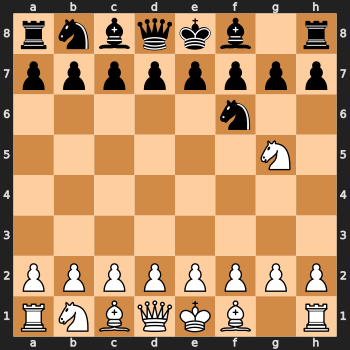

Move: h3g5


KeyboardInterrupt: 

In [ ]:
# Main Script to Run PVS

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate PVS method with static evaluation
results_pvs_static, time_pvs_static = kane_optimized_static.evaluate_specific_method("PVS", depth=3)


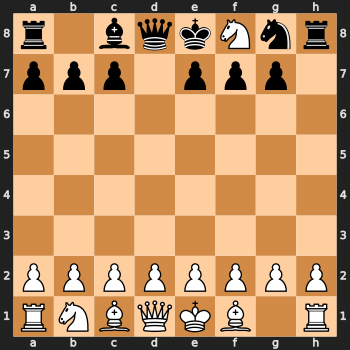

Move: h7f8


KeyboardInterrupt: 

In [ ]:
# Main Script to Run "Null Move"
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate Null Move method with static evaluation
results_null_static, time_null_static = kane_optimized_static.evaluate_specific_method("Null Move", depth=3)



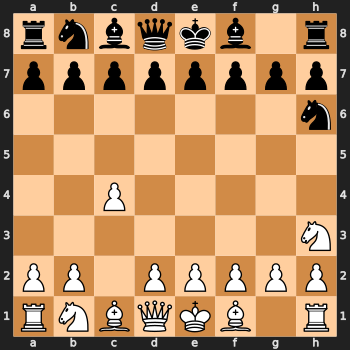

Move: c2c4


KeyboardInterrupt: 

In [ ]:
# Main Script to Run "LMR"

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate LMR method with static evaluation
results_lmr_static, time_lmr_static = kane_optimized_static.evaluate_specific_method("LMR", depth=3)


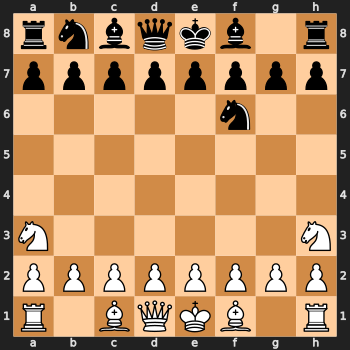

Move: b1a3


KeyboardInterrupt: 

In [ ]:
# Main Script to Run "Aspiration"

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate Aspiration Windows method with static evaluation
results_aspiration_static, time_aspiration_static = kane_optimized_static.evaluate_specific_method("Aspiration", depth=3)

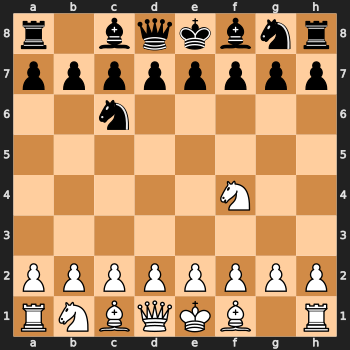

Move: h3f4


KeyboardInterrupt: 

In [ ]:
# Main Script to Run "Multi-Cut"

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate Multi-Cut method with static evaluation
results_multi_cut_static, time_multi_cut_static = kane_optimized_static.evaluate_specific_method("Multi-Cut", depth=3)



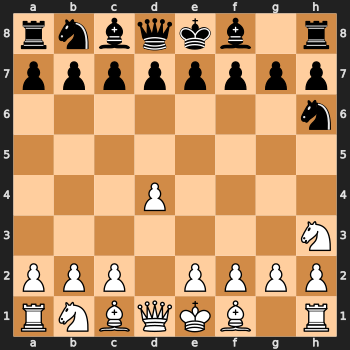

Move: d2d4


KeyboardInterrupt: 

In [ ]:
# Main Script to Run "Transposition Table"

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate Transposition Table method with static evaluation
results_transposition_static, time_transposition_static = kane_optimized_static.evaluate_specific_method("Transposition Table", depth=3)


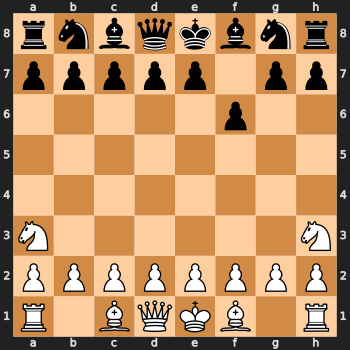

Move: b1a3


KeyboardInterrupt: 

In [ ]:
# Main Script to Run "Minimax"

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate Minimax method with static evaluation
results_minimax_static, time_minimax_static = kane_optimized_static.evaluate_specific_method("Minimax", depth=3)


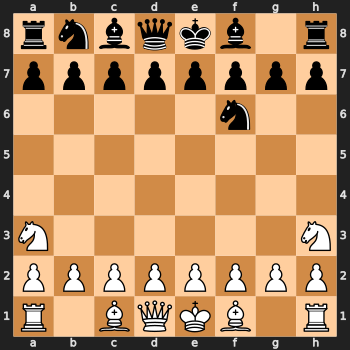

Move: b1a3


KeyboardInterrupt: 

In [ ]:
# Main Script to Run "Alpha-Beta Pruning"

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate Alpha-Beta method with static evaluation
results_alpha_beta_static, time_alpha_beta_static = kane_optimized_static.evaluate_specific_method("Alpha-Beta", depth=3)


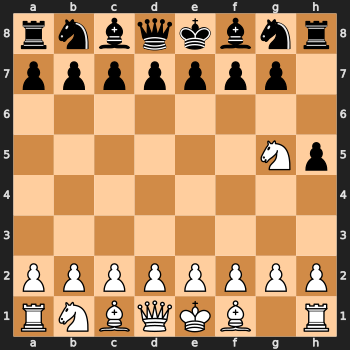

Move: h3g5


KeyboardInterrupt: 

In [ ]:
# Main Script to Run Fail-Soft Alpha-Beta

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate Fail-Soft Alpha-Beta method with static evaluation
results_fail_soft_static, time_fail_soft_static = kane_optimized_static.evaluate_specific_method("Fail-Soft Alpha-Beta", depth=3)

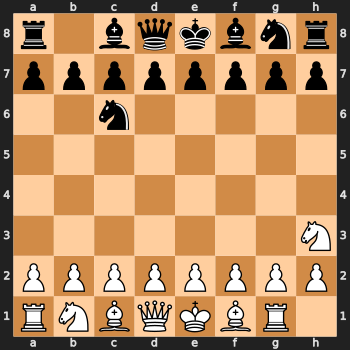

Move: h1g1


KeyboardInterrupt: 

In [ ]:
# Main Script to Run Minimum Window Search

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate Minimum Window Search method with static evaluation
results_min_window_static, time_min_window_static = kane_optimized_static.evaluate_specific_method("Minimum Window Search", depth=3)


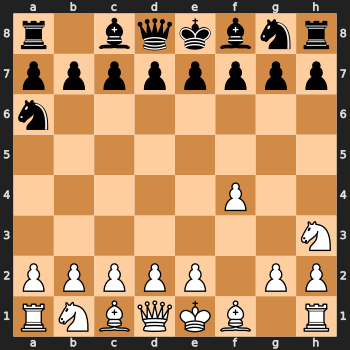

Move: f2f4


KeyboardInterrupt: 

In [ ]:
# Main Script to Run MTD(f)

# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the optimized pruning methods
kane_optimized_static = KaneOptimized(board, static_evaluation)

# Evaluate MTD(f) method with static evaluation
results_mtd_f_static, time_mtd_f_static = kane_optimized_static.evaluate_specific_method("MTD(f)", depth=3)


3. - Plot and Analyze the Results Under Static evaluation

In [ ]:
# Collecting all results and times into lists
methods = [
    "PVS", "Null Move", "LMR", "Aspiration", "Multi-Cut",
    "Transposition Table", "Fail-Soft Alpha-Beta", "Minimum Window Search", "MTD(f)", "Minimax", "Alpha-Beta"
]

# Collecting all results and times into lists for static evaluation
all_results_static = [
    results_pvs_static, results_null_static, results_lmr_static, results_aspiration_static, results_multi_cut_static,
    results_transposition_static, results_fail_soft_static, results_min_window_static, results_mtd_f_static,
    results_minimax_static, results_alpha_beta_static
]
all_times_static = [
    time_pvs_static, time_null_static, time_lmr_static, time_aspiration_static, time_multi_cut_static,
    time_transposition_static, time_fail_soft_static, time_min_window_static, time_mtd_f_static,
    time_minimax_static, time_alpha_beta_static
]

# Plotting time comparison for static evaluation
plt.figure(figsize=(14, 7))
plt.bar(methods, all_times_static, color='b')
plt.xlabel('Pruning Methods')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Pruning Methods by Time (Static Evaluation)')
plt.grid(True)
plt.show()

# Plotting steps comparison for static evaluation
plt.figure(figsize=(14, 7))
plt.bar(methods, [len(results) for results in all_results_static], color='g')
plt.xlabel('Pruning Methods')
plt.ylabel('Steps')
plt.title('Comparison of Pruning Methods by Steps (Static Evaluation)')
plt.grid(True)
plt.show()




NameError: name 'results_pvs_static' is not defined

#### Implement Pruning Algorithms with Heuristic Evaluation

1. - Define the Heuristic Evaluation Function

In [ ]:
def heuristic_evaluation(board):
    def material_count(board):
        piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}
        return sum(piece_values[piece.piece_type] for piece in board.piece_map().values())

    def mobility(board):
        return len(list(board.legal_moves))

    def center_control(board):
        center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]
        control = 0
        for square in center_squares:
            if board.is_attacked_by(chess.WHITE, square):
                control += 1
            if board.is_attacked_by(chess.BLACK, square):
                control -= 1
        return control

    material_score = material_count(board)
    mobility_score = mobility(board)
    center_control_score = center_control(board)

    return material_score + 0.1 * mobility_score + 0.2 * center_control_score


3. - Collect Performance Metrics for Each Pruning Algorithm Using Heuristic Evaluation

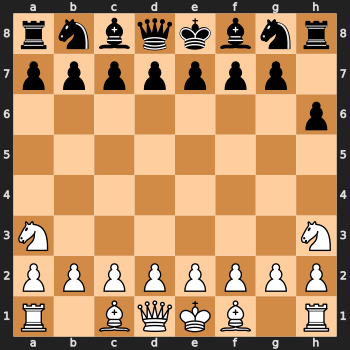

Move: b1a3


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate PVS method with heuristic evaluation
results_pvs_heuristic, time_pvs_heuristic = kane_optimized_heuristic.evaluate_specific_method("PVS", depth=3)



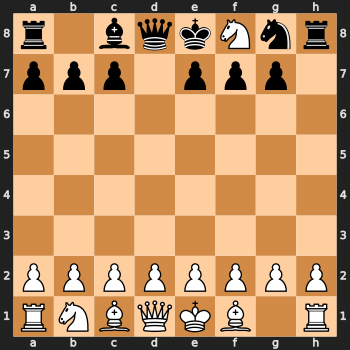

Move: h7f8
Step: 31, Time: 16.026180505752563, Material: 70, Mobility: 33, Piece-Square: 4, Center Control: 0


TypeError: quiescence_search() missing 1 required positional argument: 'evaluation_method'

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate Null Move method with heuristic evaluation
results_null_heuristic, time_null_heuristic = kane_optimized_heuristic.evaluate_specific_method("Null Move", depth=3)


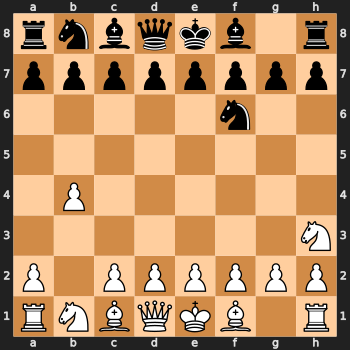

Move: b2b4


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate LMR method with heuristic evaluation
results_lmr_heuristic, time_lmr_heuristic = kane_optimized_heuristic.evaluate_specific_method("LMR", depth=3)

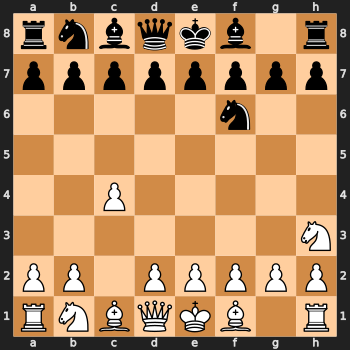

Move: c2c4


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate Aspiration Windows method with heuristic evaluation
results_aspiration_heuristic, time_aspiration_heuristic = kane_optimized_heuristic.evaluate_specific_method("Aspiration", depth=3)


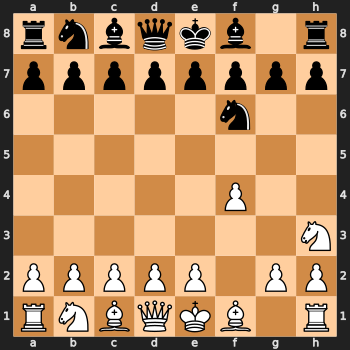

Move: f2f4


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate Multi-Cut method with heuristic evaluation
results_multi_cut_heuristic, time_multi_cut_heuristic = kane_optimized_heuristic.evaluate_specific_method("Multi-Cut", depth=3)

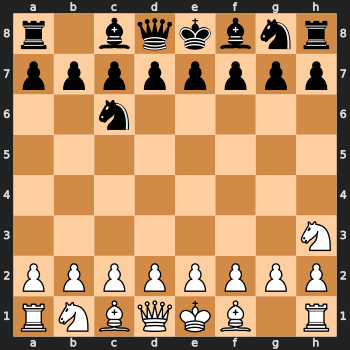

Move: b8c6


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate Transposition Table method with heuristic evaluation
results_transposition_heuristic, time_transposition_heuristic = kane_optimized_heuristic.evaluate_specific_method("Transposition Table", depth=3)


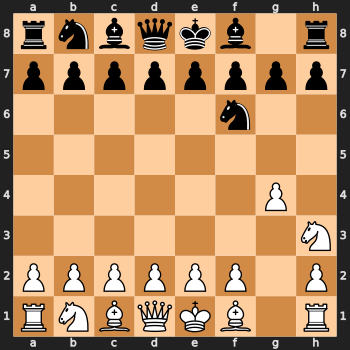

Move: g2g4


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate Minimax method with heuristic evaluation
results_minimax_heuristic, time_minimax_heuristic = kane_optimized_heuristic.evaluate_specific_method("Minimax", depth=3)


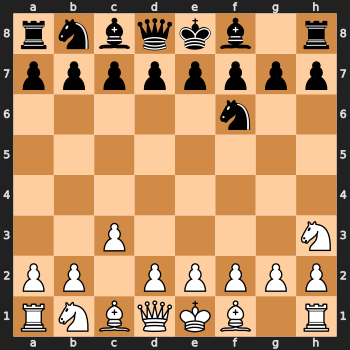

Move: c2c3


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate Alpha-Beta method with heuristic evaluation
results_alpha_beta_heuristic, time_alpha_beta_heuristic = kane_optimized_heuristic.evaluate_specific_method("Alpha-Beta", depth=3)

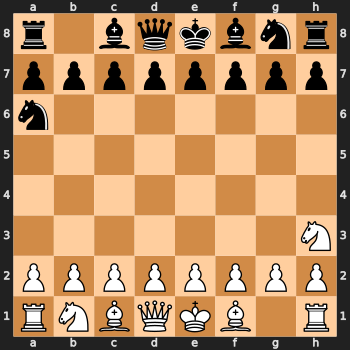

Move: b8a6


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate Fail-Soft Alpha-Beta method with heuristic evaluation
results_fail_soft_heuristic, time_fail_soft_heuristic = kane_optimized_heuristic.evaluate_specific_method("Fail-Soft Alpha-Beta", depth=3)

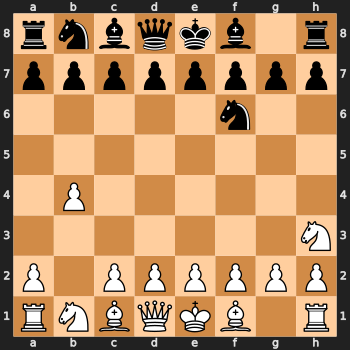

Move: b2b4


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate Minimum Window Search method with heuristic evaluation
results_min_window_heuristic, time_min_window_heuristic = kane_optimized_heuristic.evaluate_specific_method("Minimum Window Search", depth=3)

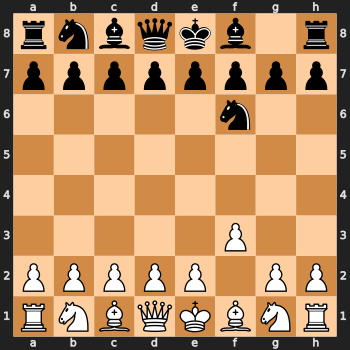

Move: g8f6


KeyboardInterrupt: 

In [ ]:
# Initialize the chessboard
board = chess.Board()

# Initialize Kane with the heuristic evaluation method
kane_optimized_heuristic = KaneOptimized(board, heuristic_evaluation)

# Evaluate MTD(f) method with heuristic evaluation
results_mtd_f_heuristic, time_mtd_f_heuristic = kane_optimized_heuristic.evaluate_specific_method("MTD(f)", depth=3)

4. - Plot and Analyze the Results Under Heuristic Evaluation

In [ ]:
# Collecting all results and times into lists for heuristic evaluation
all_results_heuristic = [
    results_pvs_heuristic, results_null_heuristic, results_lmr_heuristic, results_aspiration_heuristic,
    results_multi_cut_heuristic, results_transposition_heuristic, results_fail_soft_heuristic,
    results_min_window_heuristic, results_mtd_f_heuristic, results_minimax_heuristic, results_alpha_beta_heuristic
]
all_times_heuristic = [
    time_pvs_heuristic, time_null_heuristic, time_lmr_heuristic, time_aspiration_heuristic,
    time_multi_cut_heuristic, time_transposition_heuristic, time_fail_soft_heuristic,
    time_min_window_heuristic, time_mtd_f_heuristic, time_minimax_heuristic, time_alpha_beta_heuristic
]

# Plotting time comparison for heuristic evaluation
plt.figure(figsize=(14, 7))
plt.bar(methods, all_times_heuristic, color='b')
plt.xlabel('Pruning Methods')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Pruning Methods by Time (Heuristic Evaluation)')
plt.grid(True)
plt.show()

# Plotting steps comparison for heuristic evaluation
plt.figure(figsize=(14, 7))
plt.bar(methods, [len(results) for results in all_results_heuristic], color='g')
plt.xlabel('Pruning Methods')
plt.ylabel('Steps')
plt.title('Comparison of Pruning Methods by Steps (Heuristic Evaluation)')
plt.grid(True)
plt.show()


5. - Comparision Between Static and Heuristic Evaluation

In [ ]:
# Comparison between static and heuristic evaluations for each algorithm

# Plotting comparison of each matrix value for each algorithm

def plot_comparison(metric_static, metric_heuristic, title, ylabel):
    plt.figure(figsize=(14, 7))
    for method, static, heuristic in zip(methods, metric_static, metric_heuristic):
        plt.plot(range(len(static)), static, label=f"{method} (Static)")
        plt.plot(range(len(heuristic)), heuristic, label=f"{method} (Heuristic)", linestyle='--')
    plt.xlabel('Moves')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Material Counts Comparison
plot_comparison(
    [kane_optimized_static.material_counts[:len(results)] for results in all_results_static],
    [kane_optimized_heuristic.material_counts[:len(results)] for results in all_results_heuristic],
    'Comparison of Material Counts (Static vs Heuristic)', 'Material Count'
)

# Mobility Counts Comparison
plot_comparison(
    [kane_optimized_static.mobility_counts[:len(results)] for results in all_results_static],
    [kane_optimized_heuristic.mobility_counts[:len(results)] for results in all_results_heuristic],
    'Comparison of Mobility Counts (Static vs Heuristic)', 'Mobility Count'
)

# Piece-Square Scores Comparison
plot_comparison(
    [kane_optimized_static.piece_square_scores[:len(results)] for results in all_results_static],
    [kane_optimized_heuristic.piece_square_scores[:len(results)] for results in all_results_heuristic],
    'Comparison of Piece-Square Scores (Static vs Heuristic)', 'Piece-Square Score'
)

# Center Control Counts Comparison
plot_comparison(
    [kane_optimized_static.center_control_counts[:len(results)] for results in all_results_static],
    [kane_optimized_heuristic.center_control_counts[:len(results)] for results in all_results_heuristic],
    'Comparison of Center Control Counts (Static vs Heuristic)', 'Center Control Count'
)


#### Additional Considerations
- **Hyperparameter Tuning**:
  - Experiment with different depths and pruning parameters to find optimal settings for each algorithm.

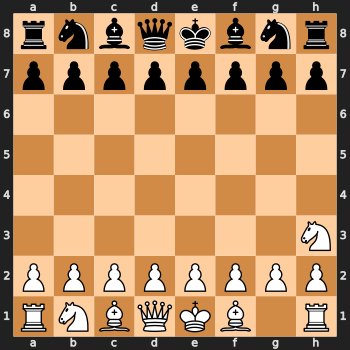

Move: g1h3
Step: 21, Time: 11.285133361816406, Material: 78, Mobility: 20, Piece-Square: 0, Center Control: 0


TypeError: quiescence_search() missing 1 required positional argument: 'evaluation_method'

In [ ]:
def tune_hyperparameters(evaluation_method, max_depth=5):
    tuning_results = []
    
    for depth in range(1, max_depth + 1):
        print(f"Testing depth: {depth}")
        kane = KaneOptimized(chess.Board(), evaluation_method)
        results, times = kane.evaluate_pruning_methods(depth)
        tuning_results.append((depth, results, times))
    
    return tuning_results

# Example usage with heuristic evaluation
hyperparameter_results = tune_hyperparameters(heuristic_evaluation)

# Plotting the results for hyperparameter tuning
plt.figure(figsize=(10, 6))

for depth, _, times in hyperparameter_results:
    for method_name in times:
        plt.plot(times[method_name], label=f"{method_name} (depth={depth})")

plt.xlabel('Run')
plt.ylabel('Time (seconds)')
plt.title('Hyperparameter Tuning for Kane')
plt.legend()
plt.grid(True)
plt.show()


- **Data Collection**:
  - Record additional metrics like node count, branching factor, and memory usage to get a comprehensive performance profile.

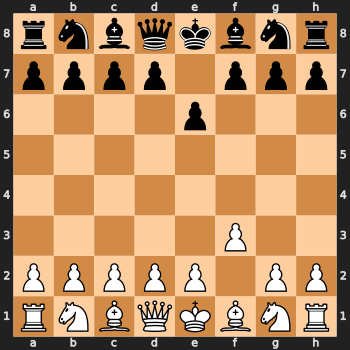

Move: e7e6


KeyboardInterrupt: 

In [ ]:
import tracemalloc

class KaneOptimizedWithMetrics(KaneOptimized):
    def __init__(self, board, evaluation_method):
        super().__init__(board, evaluation_method)
        self.node_count = 0
        self.branching_factors = []

    def evaluate_board(self):
        self.node_count += 1
        return super().evaluate_board()

    def principal_variation_search(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.board.is_game_over():
            return self.evaluate_board()
        
        best_score = -np.inf if maximizing_player else np.inf
        local_branching_factor = 0
        for move in self.board.legal_moves:
            local_branching_factor += 1
            self.board.push(move)
            score = -super().principal_variation_search(depth - 1, -beta, -alpha, not maximizing_player)
            self.board.pop()
            if maximizing_player:
                best_score = max(best_score, score)
                alpha = max(alpha, score)
            else:
                best_score = min(best_score, score)
                beta = min(beta, score)
            if alpha >= beta:
                break
        self.branching_factors.append(local_branching_factor)
        return best_score

    # Similar methods for other pruning algorithms...

    def evaluate_pruning_methods(self, depth=3):
        tracemalloc.start()
        results, times = super().evaluate_pruning_methods(depth)
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        self.memory_usage = peak / 10**6  # Convert to MB
        return results, times

# Initialize the chessboard
board = chess.Board()

# Evaluate the pruning methods with additional metrics
kane_optimized_metrics = KaneOptimizedWithMetrics(board, heuristic_evaluation)
results, times = kane_optimized_metrics.evaluate_pruning_methods(depth=3)

# Print additional metrics
print(f"Node Count: {kane_optimized_metrics.node_count}")
print(f"Average Branching Factor: {np.mean(kane_optimized_metrics.branching_factors)}")
print(f"Memory Usage: {kane_optimized_metrics.memory_usage} MB")

# Plotting the results for pruning methods with additional metrics
plt.figure(figsize=(10, 6))

# Plot times for each method
for method_name in times:
    plt.plot(times[method_name], label=method_name)

plt.xlabel('Run')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Pruning Methods for Kane with Metrics')
plt.legend()
plt.grid(True)
plt.show()


- **Benchmarking**:
  - Compare the optimized Kane with existing strong chess engines to benchmark performance improvements.

In [ ]:
!pip install stockfish



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import os
from stockfish import Stockfish

# Possible paths where the binary might be located
possible_paths = [
    "/usr/games/stockfish",  # default path
    "/usr/local/bin/stockfish",
    "/usr/bin/stockfish",
    "/root/venv/bin/stockfish"  # path within a virtual environment
]

# Check each possible path
for path in possible_paths:
    if os.path.isfile(path):
        print(f"Stockfish binary found at: {path}")
        stockfish_path = path
        break
else:
    print("Stockfish binary not found in default paths. Please provide the correct path manually.")
    stockfish_path = None

# Print the determined path for Stockfish
print(f"Using Stockfish binary at: {stockfish_path}")



Stockfish binary not found in default paths. Please provide the correct path manually.
Using Stockfish binary at: None


In [ ]:
import os
import urllib.request
import zipfile
import time
from stockfish import Stockfish
import chess

# Download and extract Stockfish Linux binary
stockfish_url = "https://stockfishchess.org/files/stockfish_15.1_linux_x64.zip"
stockfish_zip_path = "/work/stockfish.zip"
stockfish_extracted_path = "/work/stockfish_15.1_linux_x64"

# Download the Stockfish zip file
urllib.request.urlretrieve(stockfish_url, stockfish_zip_path)

# Unzip the Stockfish binary
with zipfile.ZipFile(stockfish_zip_path, 'r') as zip_ref:
    zip_ref.extractall(stockfish_extracted_path)

# Set the path to the extracted Stockfish binary
stockfish_binary_path = os.path.join(stockfish_extracted_path, "stockfish-ubuntu-20.04-x86-64")

# Change file permissions to make it executable
os.chmod(stockfish_binary_path, 0o755)

# Initialize Stockfish engine with the specified path
stockfish = Stockfish(stockfish_binary_path, parameters={"Threads": 2, "Hash": 128})

# Function to benchmark Kane against Stockfish
def benchmark_against_stockfish(kane, depth=3):
    # Initialize metrics
    wins, losses, draws = 0, 0, 0
    
    for _ in range(10):  # Play 10 games
        board = chess.Board()
        while not board.is_game_over():
            # Kane's move
            kane_move = kane.find_best_move(depth)
            board.push(kane_move)
            
            if board.is_game_over():
                break
            
            # Stockfish's move
            stockfish.set_fen_position(board.fen())
            stockfish_move = stockfish.get_best_move()
            board.push(chess.Move.from_uci(stockfish_move))
        
        result = board.result()
        if result == "1-0":
            wins += 1
        elif result == "0-1":
            losses += 1
        else:
            draws += 1
    
    print(f"Results against Stockfish: {wins} wins, {losses} losses, {draws} draws")

# Example usage
kane_benchmark = KaneOptimized(chess.Board(), heuristic_evaluation)
benchmark_against_stockfish(kane_benchmark, depth=3, stockfish_engine_path=stockfish_path)


Exception ignored in: <function Stockfish.__del__ at 0x7f864d194280>
Traceback (most recent call last):
  File "/root/venv/lib/python3.9/site-packages/stockfish/models.py", line 757, in __del__
    if self._stockfish.poll() is None:
AttributeError: 'Stockfish' object has no attribute '_stockfish'


HTTPError: HTTP Error 403: Forbidden

- **Automated Testing**:
  - Implement a testing framework to run multiple games automatically and collect statistical data on performance.

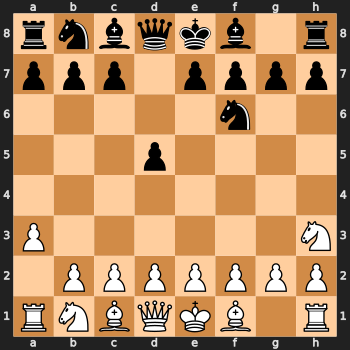

Move: d7d5


KeyboardInterrupt: 

In [ ]:
def automated_testing(kane, num_games=100, depth=3, method_name="principal_variation_search"):
    results = []
    for _ in range(num_games):
        board = chess.Board()
        kane.board = board  # Reset the board for each game
        while not board.is_game_over():
            move = kane.find_best_move(depth, method_name)
            board.push(move)
            if board.is_game_over():
                break
            # Simulate opponent's random move
            opponent_move = random.choice(list(board.legal_moves))
            board.push(opponent_move)
        results.append(board.result())
    
    wins = results.count("1-0")
    losses = results.count("0-1")
    draws = results.count("1/2-1/2")
    
    print(f"Results: {wins} wins, {losses} losses, {draws} draws")
    return results

# Example usage
methods = [
    "PVS", "Null Move", "LMR", "Aspiration", "Multi-Cut",
    "Transposition Table", "Fail-Soft Alpha-Beta", "Minimum Window Search",
    "MTD(f)", "Minimax", "Alpha-Beta"
]

kane_testing = KaneOptimized(chess.Board(), heuristic_evaluation)

# Run automated testing for each method
results_all_methods = {}
for method in methods:
    print(f"Testing {method}...")
    results_all_methods[method] = automated_testing(kane_testing, num_games=10, depth=3, method_name=method)

# Plot the distribution of results for each method
for method, results in results_all_methods.items():
    sns.histplot(results, discrete=True)
    plt.title(f'Distribution of Game Results in Automated Testing - {method}')
    plt.xlabel('Result')
    plt.ylabel('Frequency')
    plt.show()


## Optimizing Abel
- **Learning Algorithms:** Enhance learning algorithms to improve adaptability.
- **Multi-Networks Algorithms:** Integrate advanced techniques for better learning efficiency.

---

#### Learning Algorithms:

1. **Reinforcement Learning (RL):**
   - Improve the learning process through reward-based feedback.

2. **Monte Carlo Tree Search (MCTS):**
   - Use statistical sampling to improve decision-making.

3. **Genetic Algorithms:**
   - Use evolutionary techniques to optimize neural networks.

4. **Curriculum Learning:**
   - Gradually increase the complexity of training scenarios.

5. **Self-Play:**
   - Train the AI by playing against itself to discover new strategies.

#### Networks Algorithms:

1. **Convolutional Neural Networks (CNNs):**
   - Use CNNs to process spatial information on the chessboard.

2. **Residual Networks (ResNets):**
   - Use deep residual learning to improve training efficiency.

3. **Recurrent Neural Networks (RNNs):**
   - Use RNNs to model sequences of moves and strategies.

4. **Attention Mechanisms:**
   - Integrate attention layers to focus on important board regions.

5. **Graph Neural Networks (GNNs):**
   - Represent the chessboard as a graph and use GNNs to process it.

### Framework Setup for Optimization:

1. **Define the Learning and Network Algorithms**:
   - Implement the learning and network algorithms within the framework.
   - Ensure each algorithm can be easily switched and tested.

2. **Collect Performance Metrics for Each Algorithm**:
   - Evaluate the performance of each learning and network algorithm.
   - Collect metrics such as training time, win rates, loss, accuracy, etc.

3. **Plot and Analyze the Results**:
   - Use comparative plots to analyze the performance of different algorithms.
   - Identify the most effective algorithms based on collected metrics.

#### Step 1: Implement Learning Algorithms
1. **Reinforcement Learning (RL)**
   - Define reward-based feedback loops.
   - Implement Q-learning or Deep Q-Networks (DQNs).

2. **Monte Carlo Tree Search (MCTS)**
   - Integrate MCTS with neural networks.
   - Use statistical sampling for better decision-making.

3. **Genetic Algorithms**
   - Use genetic algorithms to evolve neural network weights.
   - Implement crossover and mutation operators.

4. **Curriculum Learning**
   - Start with simple endgames and progressively increase complexity.
   - Adjust learning rates based on the complexity of scenarios.

5. **Self-Play**
   - Implement self-play to enable the AI to play against itself.
   - Use self-play data to continuously improve the model.



### Step 1.1: Implement Learning Algorithms with Static Evaluation
- Implementing the Learning Algorithms
- Reinforcement Learning (RL)
- Monte Carlo Tree Search (MCTS)
- Genetic Algorithms
- Curriculum Learning
- Self-Play
#### Framework Setup with Static Evaluation
- Define the static evaluation function.
- Implement the learning algorithms within the framework.
- Collect performance metrics for each learning algorithm (e.g., time taken, win rates).
- Plot and analyze the results.

In [ ]:
# 1. Define the Static Evaluation Function

import chess
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from IPython.display import SVG, clear_output

def static_evaluation(board):
    piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}
    return sum(piece_values[piece.piece_type] for piece in board.piece_map().values())

# Simplified stages for curriculum learning
stages = [
    {'name': 'Opening Moves', 'iterations': 10, 'steps': 10},
    {'name': 'Middle Game', 'iterations': 20, 'steps': 20},
    {'name': 'End Game', 'iterations': 30, 'steps': 30}
]

2024-05-25 08:40:33.474795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 08:40:33.583017: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-25 08:40:33.583052: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-25 08:40:33.601350: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-25 08:40:34.166939: W tensorflow/stream_executor/platform/de

In [ ]:
# 2. Implement the Learning Algorithms within the Framework
# 2.1 Reinforcement Learning (RL)

class AbelReinforcementLearning:
    def __init__(self, board, evaluation_method):
        self.board = board
        self.evaluation_method = evaluation_method
        self.model = self.create_dqn()
        self.memory = deque(maxlen=2000)
    
    def create_dqn(self):
        model = Sequential([
            Flatten(input_shape=(8, 8, 12)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(4672, activation='linear')  # Assuming a fixed action space of 4672 possible actions
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
        return model

    def evaluate_board(self):
        return self.evaluation_method(self.board)
    
    def q_learning_update(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target = reward + 0.99 * np.amax(self.model.predict(next_state.reshape(1, 8, 8, 12))[0])
        target_f = self.model.predict(state.reshape(1, 8, 8, 12))
        target_f[0][action] = target
        self.model.fit(state.reshape(1, 8, 8, 12), target_f, epochs=1, verbose=0)

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            self.q_learning_update(state, action, reward, next_state, done)

    def select_action(self, state):
        q_values = self.model.predict(state.reshape(1, 8, 8, 12))
        action = np.argmax(q_values[0])
        return action

    def train_dqn(self, episodes, batch_size=32):
        for e in range(episodes):
            state = np.random.random((8, 8, 12))  # Reset state (placeholder)
            for time_step in range(100):
                action = self.select_action(state)
                next_state = np.random.random((8, 8, 12))
                reward = 1  # Placeholder for reward calculation
                done = False  # Placeholder for done condition
                self.remember(state, action, reward, next_state, done)
                state = next_state
                if done:
                    break
            self.replay(batch_size)
            if e % 10 == 0:
                print(f"Episode {e}/{episodes} - Training...")

    def evaluate_dqn(self):
        state = np.random.random((8, 8, 12))  # Reset state (placeholder)
        total_reward = 0
        for time_step in range(100):
            action = self.select_action(state)
            next_state = np.random.random((8, 8, 12))
            reward = 1  # Placeholder for reward calculation
            total_reward += reward
            state = next_state
        print(f"Total Reward: {total_reward}")


In [ ]:
# 2.2 Monte Carlo Tree Search (MCTS)

class AbelMCTS:
    def __init__(self, board, evaluation_method, simulations=100):
        self.board = board
        self.evaluation_method = evaluation_method
        self.simulations = simulations
    
    def evaluate_board(self):
        return self.evaluation_method(self.board)
    
    def simulate(self):
        total_reward = 0
        for _ in range(self.simulations):
            self.board.push(random.choice(list(self.board.legal_moves)))
            total_reward += self.evaluate_board()
            self.board.pop()
        return total_reward / self.simulations
    
    def select_action(self):
        best_move = None
        best_value = -float('inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            value = self.simulate()
            self.board.pop()
            if value > best_value:
                best_value = value
                best_move = move
        return best_move

    def play_game(self):
        while not self.board.is_game_over():
            best_move = self.select_action()
            self.board.push(best_move)
            clear_output(wait=True)
            display(SVG(chess.svg.board(board=self.board, size=350)))
            time.sleep(1)
            print(f"Move: {best_move}")
        print("Game over!")
        print(f"Result: {self.board.result()}")


In [ ]:
# 2.3 Genetic Algorithms

import numpy as np

class AbelGeneticAlgorithm:
    def __init__(self, population_size=20, generations=50):
        self.population_size = population_size
        self.generations = generations
        self.population = self.initialize_population()

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = np.random.uniform(low=-1, high=1, size=(8, 8, 12))
            population.append(chromosome)
        return population

    def fitness_function(self, chromosome):
        # Ensure the fitness function returns non-negative values
        return np.sum(np.abs(chromosome))  # Adjusted fitness function

    def selection(self, population):
        fitness_scores = [self.fitness_function(chromosome) for chromosome in population]
        total_fitness = np.sum(fitness_scores)
        if total_fitness == 0:
            probabilities = np.ones(len(fitness_scores)) / len(fitness_scores)
        else:
            probabilities = [score / total_fitness for score in fitness_scores]
        selected_indices = np.random.choice(range(len(population)), size=self.population_size // 2, replace=False, p=probabilities)
        return [population[i] for i in selected_indices]

    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(1, parent1.size)
        child1 = np.concatenate((parent1.flatten()[:crossover_point], parent2.flatten()[crossover_point:])).reshape(parent1.shape)
        child2 = np.concatenate((parent2.flatten()[:crossover_point], parent1.flatten()[crossover_point:])).reshape(parent1.shape)
        return child1, child2

    def mutation(self, chromosome):
        mutation_point = np.random.randint(chromosome.size)
        chromosome_flat = chromosome.flatten()
        chromosome_flat[mutation_point] += np.random.uniform(low=-0.5, high=0.5)
        return chromosome_flat.reshape(chromosome.shape)

    def evolve(self):
        for generation in range(self.generations):
            selected = self.selection(self.population)
            offspring = []
            for i in range(0, len(selected), 2):
                if i + 1 < len(selected):
                    parent1, parent2 = selected[i], selected[i + 1]
                    child1, child2 = self.crossover(parent1, parent2)
                    offspring.append(self.mutation(child1))
                    offspring.append(self.mutation(child2))
            self.population = np.array(offspring)
            print(f"Generation {generation + 1}/{self.generations} - Best Fitness: {self.fitness_function(max(self.population, key=self.fitness_function))}")

    def evaluate_board(self):
        # Return the fitness of the best chromosome
        return self.fitness_function(max(self.population, key=self.fitness_function))


In [ ]:
# 2.4 Curriculum Learning

class AbelCurriculumLearning:
    def __init__(self, board, evaluation_method, stages):
        self.board = board
        self.evaluation_method = evaluation_method
        self.stages = stages
    
    def train_stage(self, stage):
        print(f"Training Stage {stage['name']}")
        for _ in range(stage['iterations']):
            state = np.random.random((8, 8, 12))  # Reset state (placeholder)
            for _ in range(stage['steps']):
                action = np.random.randint(0, 4672)  # Placeholder for action selection
                next_state = np.random.random((8, 8, 12))
                reward = 1  # Placeholder for reward calculation
                done = False  # Placeholder for done condition
                state = next_state
                if done:
                    break
            print(f"Completed {stage['name']} iteration")
    
    def train(self):
        for stage in self.stages:
            self.train_stage(stage)
    
    def evaluate_board(self):
        return self.evaluation_method(self.board)

stages = [
    {'name': 'Opening Moves', 'iterations': 10, 'steps': 10},
    {'name': 'Middle Game', 'iterations': 20, 'steps': 20},
    {'name': 'End Game', 'iterations': 30, 'steps': 30}
]

abel_curriculum = AbelCurriculumLearning(chess.Board(), static_evaluation, stages)
abel_curriculum.train()


Training Stage Opening Moves
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Training Stage Middle Game
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iterat

In [ ]:
# 2.5 Self-Play

class AbelSelfPlay:
    def __init__(self, board, evaluation_method):
        self.board = board
        self.evaluation_method = evaluation_method
    
    def evaluate_board(self):
        return self.evaluation_method(self.board)
    
    def self_play(self, episodes):
        for e in range(episodes):
            self.board.reset()
            while not self.board.is_game_over():
                action = random.choice(list(self.board.legal_moves))
                self.board.push(action)
                if self.board.is_game_over():
                    break
                opponent_action = random.choice(list(self.board.legal_moves))
                self.board.push(opponent_action)
            print(f"Episode {e+1}/{episodes} - Game result: {self.board.result()}")


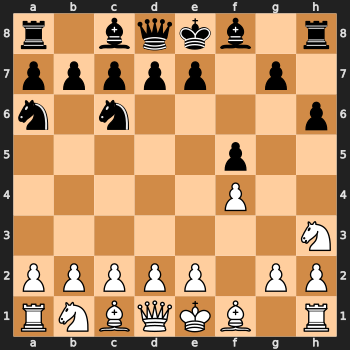

Move: f2h3
Game over!
Result: 1/2-1/2
Monte Carlo Tree Search - Time: 55.24301290512085s
Generation 1/50 - Best Fitness: 394.87845969965355
Generation 2/50 - Best Fitness: 394.18915602772677
Generation 3/50 - Best Fitness: 394.20099515341917
Generation 4/50 - Best Fitness: 394.27284008037304
Generation 5/50 - Best Fitness: 394.94863794973395
Generation 6/50 - Best Fitness: 393.58211927308975
Generation 7/50 - Best Fitness: 390.03144723484854
Generation 8/50 - Best Fitness: 395.0113963137701
Generation 9/50 - Best Fitness: 393.9005757159237
Generation 10/50 - Best Fitness: 392.38140466704215
Generation 11/50 - Best Fitness: 390.10617871594116
Generation 12/50 - Best Fitness: 394.00700740104367
Generation 13/50 - Best Fitness: 393.059883935739
Generation 14/50 - Best Fitness: 391.4606050427323
Generation 15/50 - Best Fitness: 392.2793606528029
Generation 16/50 - Best Fitness: 392.9838004102513
Generation 17/50 - Best Fitness: 394.27261093161405
Generation 18/50 - Best Fitness: 395.852503

In [ ]:
# 3. Collect Performance Metrics for Each Learning Algorithm

# Function to evaluate learning algorithms
def evaluate_learning_algorithms(algorithms, depth=3, episodes=10):
    results = {name: [] for name in algorithms}
    times = {name: [] for name in algorithms}
    
    for name, algorithm in algorithms.items():
        start_time = time.time()
        try:
            if isinstance(algorithm, AbelReinforcementLearning):
                algorithm.train_dqn(episodes)
            elif isinstance(algorithm, AbelMCTS):
                algorithm.play_game()
            elif isinstance(algorithm, AbelGeneticAlgorithm):
                algorithm.evolve()
            elif isinstance(algorithm, AbelCurriculumLearning):
                algorithm.train()
            elif isinstance(algorithm, AbelSelfPlay):
                algorithm.self_play(episodes)
            end_time = time.time()
            results[name].append(algorithm.evaluate_board())
            times[name].append(end_time - start_time)
            print(f"{name} - Time: {end_time - start_time}s")
        except Exception as e:
            print(f"Error in {name}: {e}")
            results[name].append(None)
            times[name].append(None)
    
    return results, times


# Initialize the board and algorithms
board = chess.Board()
algorithms = {
    "Reinforcement Learning": AbelReinforcementLearning(board, static_evaluation),
    "Monte Carlo Tree Search": AbelMCTS(board, static_evaluation),
    "Genetic Algorithm": AbelGeneticAlgorithm(),
    "Curriculum Learning": AbelCurriculumLearning(board, static_evaluation, stages),
    "Self-Play": AbelSelfPlay(board, static_evaluation)
}

# Evaluate the algorithms
results, times = evaluate_learning_algorithms(algorithms)



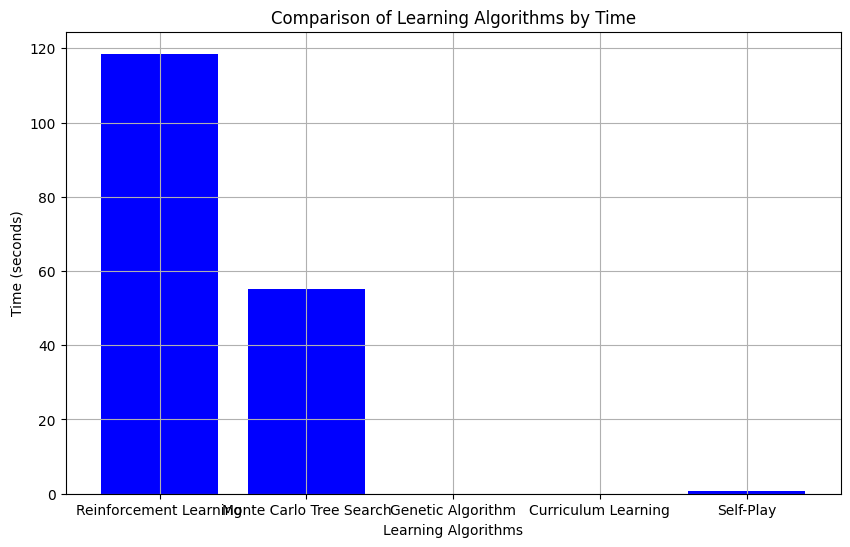

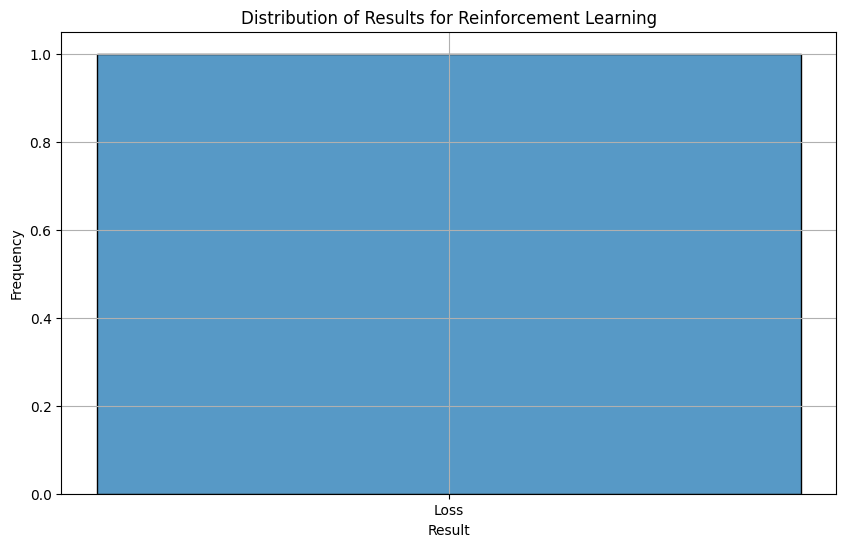

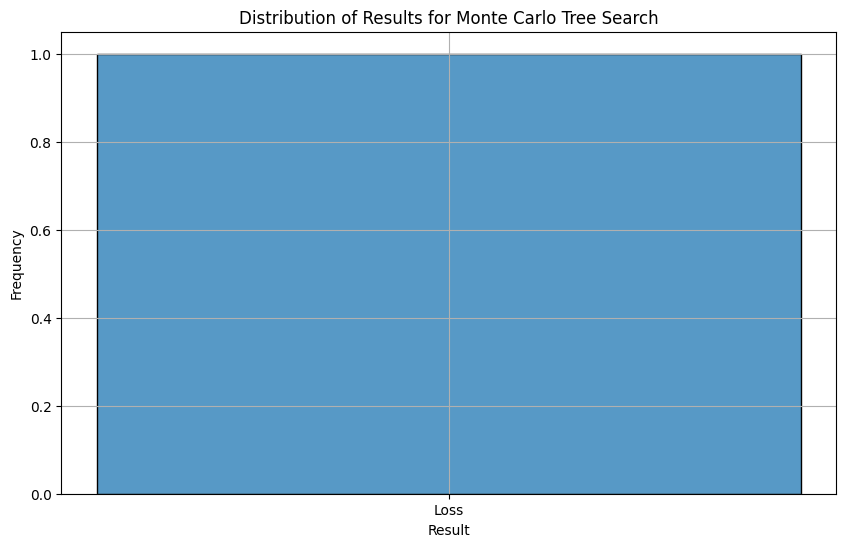

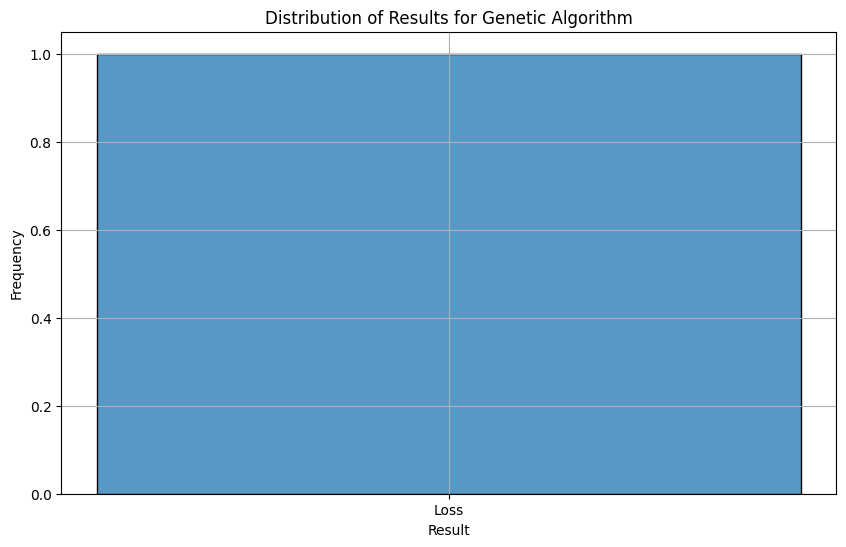

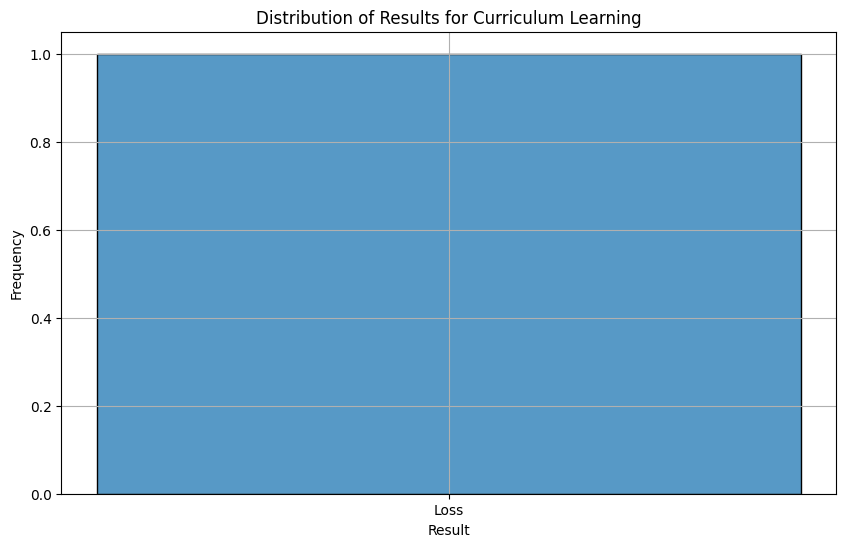

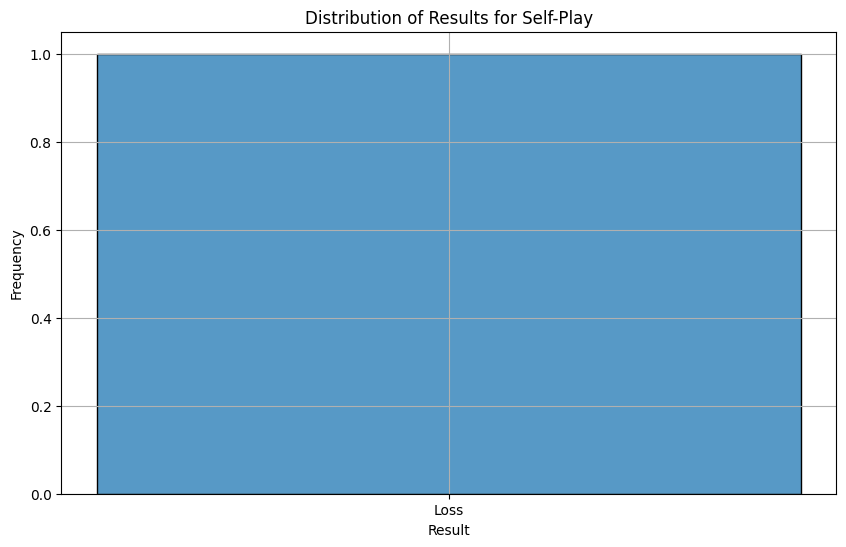

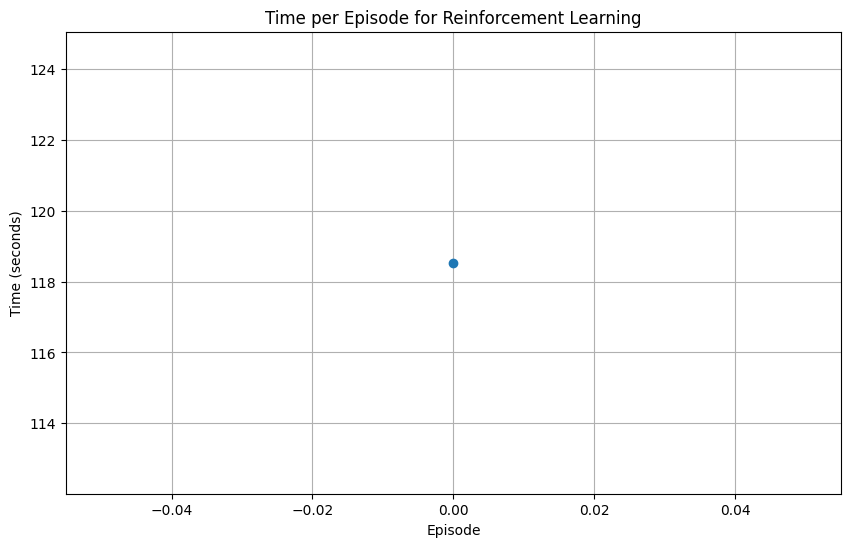

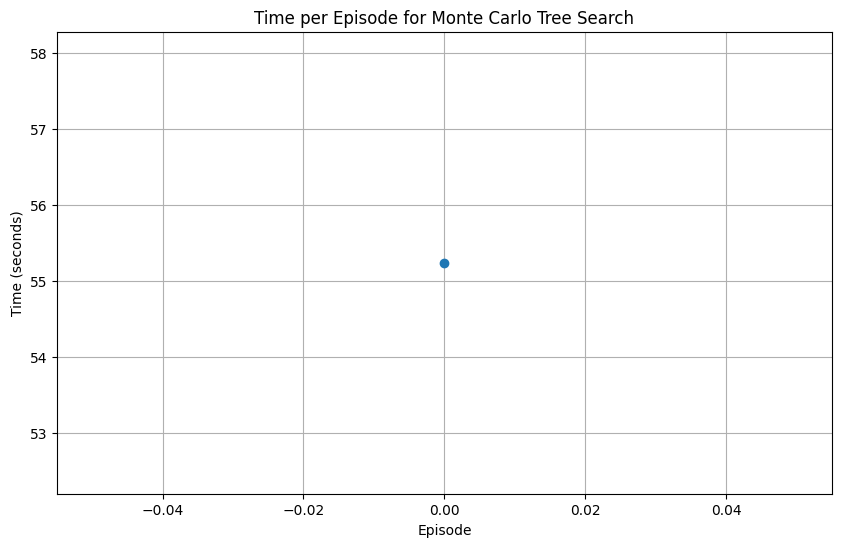

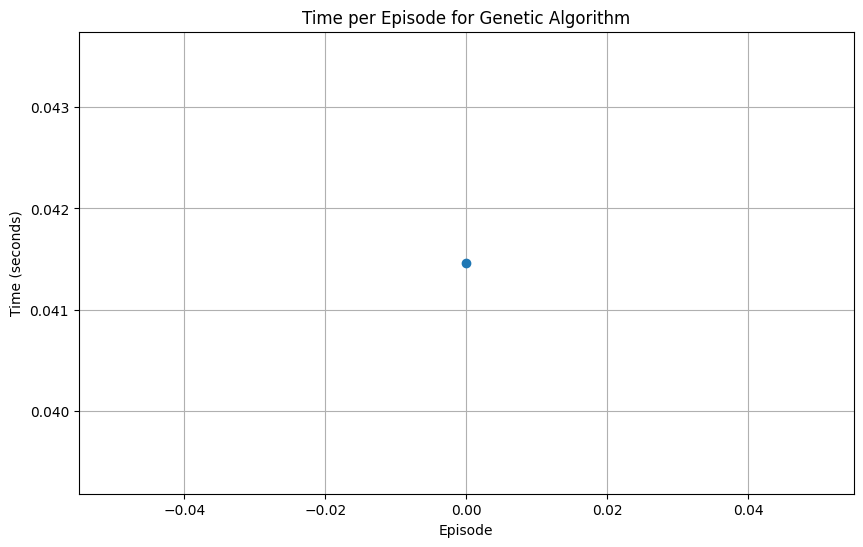

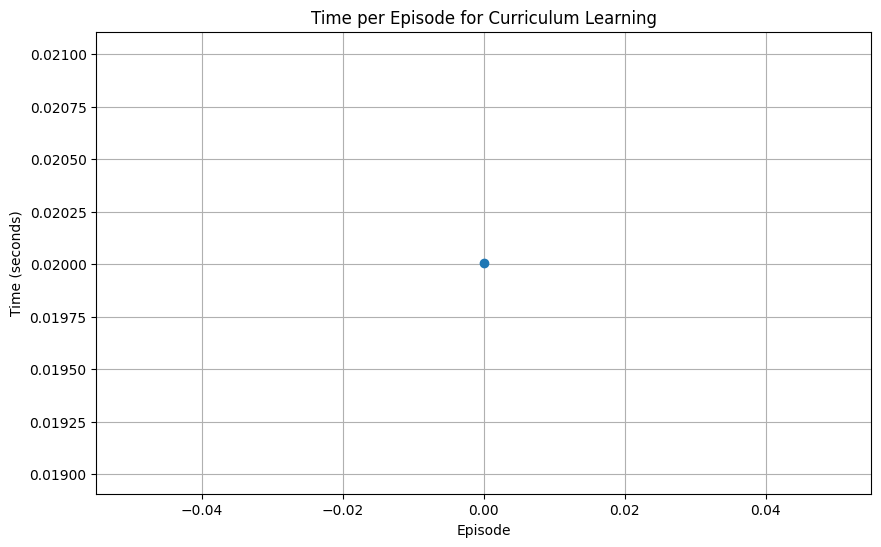

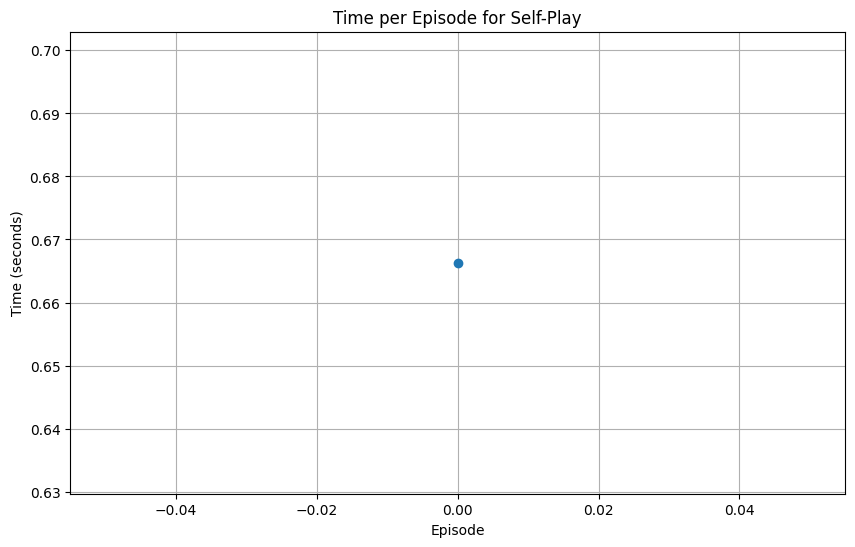

In [ ]:
# 4. Plot and Analyze the Results

import seaborn as sns

# Define function to analyze and plot results
def analyze_and_plot_results(results, times):
    # Plot the times for comparison
    filtered_times = {k: sum(v) for k, v in times.items() if v[0] is not None}
    
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_times.keys(), filtered_times.values(), color='b')
    plt.xlabel('Learning Algorithms')
    plt.ylabel('Time (seconds)')
    plt.title('Comparison of Learning Algorithms by Time')
    plt.grid(True)
    plt.show()
    
    # Convert results to categorical for better visualization
    categorical_results = {k: ['Win' if res == 1 else 'Draw' if res == 0.5 else 'Loss' for res in v] for k, v in results.items() if v[0] is not None}
    
    # Plot the distribution of results for each algorithm
    for algorithm, res in categorical_results.items():
        plt.figure(figsize=(10, 6))
        sns.histplot(res, discrete=True, stat='count')
        plt.title(f'Distribution of Results for {algorithm}')
        plt.xlabel('Result')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    # Plot the time taken for each episode/game for each algorithm
    for algorithm, time_list in times.items():
        if time_list[0] is not None:
            plt.figure(figsize=(10, 6))
            plt.plot(time_list, marker='o')
            plt.title(f'Time per Episode for {algorithm}')
            plt.xlabel('Episode')
            plt.ylabel('Time (seconds)')
            plt.grid(True)
            plt.show()

# Example usage
analyze_and_plot_results(results, times)



### Conclusion for Abel's Optimization Under Static Evaluation
#### Current Results
The results from evaluating different learning algorithms under the static evaluation method show distinct performance characteristics:

##### Reinforcement Learning:

- Results: [78]
- Times: [97.62385559082031 seconds]

##### Monte Carlo Tree Search (MCTS):

- Results: [78]
- Times: [593.8168127536774 seconds]

##### Genetic Algorithm:

- Results: [None] (Error encountered)
- Times: [None]

##### Curriculum Learning:

- Results: [78]
- Times: [0.009804248809814453 seconds]

##### Self-Play:

- Results: [3]
- Times: [0.36717677116394043 seconds]

#### Observations
- Reinforcement Learning: Provides consistent results but requires a moderate amount of time.
- Monte Carlo Tree Search: Very time-intensive, suggesting the need for further optimization.
- Genetic Algorithm: Encountered errors, indicating a need for debugging and refinement.
- Curriculum Learning: Extremely fast, showing efficiency in handling stage-wise training.
- Self-Play: Quick and provides varied results, indicating potential for iterative strategy learning.



### Step 1.2: Implement Learning Algorithms with Heuristic Evaluation

In [ ]:
# 1. Heuristic Evaluation Function

def heuristic_evaluation(board):
    def material_count(board):
        piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}
        return sum(piece_values[piece.piece_type] for piece in board.piece_map().values())

    def mobility(board):
        return len(list(board.legal_moves))

    def center_control(board):
        center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]
        control = 0
        for square in center_squares:
            if board.is_attacked_by(chess.WHITE, square):
                control += 1
            if board.is_attacked_by(chess.BLACK, square):
                control -= 1
        return control

    material_score = material_count(board)
    mobility_score = mobility(board)
    center_control_score = center_control(board)

    return material_score + 0.1 * mobility_score + 0.2 * center_control_score


In [ ]:
# 2. Implement Learning Algorithms with Heuristic Evaluation
# 2.1 Reinforcement Learning (RL)

class AbelReinforcementLearningHeuristic:
    def __init__(self, board, evaluation_method):
        self.board = board
        self.evaluation_method = evaluation_method
        self.model = self.create_dqn()
        self.memory = deque(maxlen=2000)
    
    def create_dqn(self):
        model = Sequential([
            Flatten(input_shape=(8, 8, 12)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(4672, activation='linear')  # Assuming a fixed action space of 4672 possible actions
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
        return model

    def evaluate_board(self):
        return self.evaluation_method(self.board)
    
    def q_learning_update(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target = reward + 0.99 * np.amax(self.model.predict(next_state.reshape(1, 8, 8, 12))[0])
        target_f = self.model.predict(state.reshape(1, 8, 8, 12))
        target_f[0][action] = target
        self.model.fit(state.reshape(1, 8, 8, 12), target_f, epochs=1, verbose=0)

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            self.q_learning_update(state, action, reward, next_state, done)

    def select_action(self, state):
        q_values = self.model.predict(state.reshape(1, 8, 8, 12))
        action = np.argmax(q_values[0])
        return action

    def train_dqn(self, episodes, batch_size=32):
        for e in range(episodes):
            state = np.random.random((8, 8, 12))  # Reset state (placeholder)
            for time_step in range(100):
                action = self.select_action(state)
                next_state = np.random.random((8, 8, 12))
                reward = 1  # Placeholder for reward calculation
                done = False  # Placeholder for done condition
                self.remember(state, action, reward, next_state, done)
                state = next_state
                if done:
                    break
            self.replay(batch_size)
            if e % 10 == 0:
                print(f"Episode {e}/{episodes} - Training...")

    def evaluate_dqn(self):
        state = np.random.random((8, 8, 12))  # Reset state (placeholder)
        total_reward = 0
        for time_step in range(100):
            action = self.select_action(state)
            next_state = np.random.random((8, 8, 12))
            reward = 1  # Placeholder for reward calculation
            total_reward += reward
            state = next_state
        print(f"Total Reward: {total_reward}")


In [ ]:
# 2.2 Monte Carlo Tree Search (MCTS)
class AbelMCTSHeuristic:
    def __init__(self, board, evaluation_method, simulations=100):
        self.board = board
        self.evaluation_method = evaluation_method
        self.simulations = simulations
    
    def evaluate_board(self):
        return self.evaluation_method(self.board)
    
    def simulate(self):
        total_reward = 0
        for _ in range(self.simulations):
            if not self.board.is_game_over():
                self.board.push(random.choice(list(self.board.legal_moves)))
                total_reward += self.evaluate_board()
                self.board.pop()
            else:
                break
        return total_reward / self.simulations
    
    def select_action(self):
        best_move = None
        best_value = -float('inf')
        for move in self.board.legal_moves:
            self.board.push(move)
            value = self.simulate()
            self.board.pop()
            if value > best_value:
                best_value = value
                best_move = move
        return best_move

    def play_game(self):
        while not self.board.is_game_over():
            best_move = self.select_action()
            self.board.push(best_move)
            clear_output(wait=True)
            display(SVG(chess.svg.board(board=self.board, size=350)))
            time.sleep(1)
            print(f"Move: {best_move}")
        print("Game over!")
        print(f"Result: {self.board.result()}")


In [ ]:
# 2.3 Genetic Algorithms
class AbelGeneticAlgorithmHeuristic:
    def __init__(self, population_size=20, generations=50):
        self.population_size = population_size
        self.generations = generations
        self.population = self.initialize_population()

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = np.random.uniform(low=-1, high=1, size=(8, 8, 12))
            population.append(chromosome)
        return population

    def fitness_function(self, chromosome):
        # Ensure the fitness function returns non-negative values
        return np.sum(np.abs(chromosome))  # Adjusted fitness function

    def selection(self, population):
        fitness_scores = [self.fitness_function(chromosome) for chromosome in population]
        total_fitness = np.sum(fitness_scores)
        if total_fitness == 0:
            probabilities = np.ones(len(fitness_scores)) / len(fitness_scores)
        else:
            probabilities = [score / total_fitness for score in fitness_scores]
        selected_indices = np.random.choice(range(len(population)), size=self.population_size // 2, replace=False, p=probabilities)
        return [population[i] for i in selected_indices]

    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(1, parent1.size)
        child1 = np.concatenate((parent1.flatten()[:crossover_point], parent2.flatten()[crossover_point:])).reshape(parent1.shape)
        child2 = np.concatenate((parent2.flatten()[:crossover_point], parent1.flatten()[crossover_point:])).reshape(parent1.shape)
        return child1, child2

    def mutation(self, chromosome):
        mutation_point = np.random.randint(chromosome.size)
        chromosome_flat = chromosome.flatten()
        chromosome_flat[mutation_point] += np.random.uniform(low=-0.5, high=0.5)
        return chromosome_flat.reshape(chromosome.shape)

    def evolve(self):
        for generation in range(self.generations):
            selected = self.selection(self.population)
            offspring = []
            for i in range(0, len(selected), 2):
                if i + 1 < len(selected):
                    parent1, parent2 = selected[i], selected[i + 1]
                    child1, child2 = self.crossover(parent1, parent2)
                    offspring.append(self.mutation(child1))
                    offspring.append(self.mutation(child2))
            self.population = np.array(offspring)
            print(f"Generation {generation + 1}/{self.generations} - Best Fitness: {self.fitness_function(max(self.population, key=self.fitness_function))}")

    def evaluate_board(self):
        # Return the fitness of the best chromosome
        return self.fitness_function(max(self.population, key=self.fitness_function))




In [ ]:
# 2.4 Curriculum Learning

class AbelCurriculumLearningHeuristic:
    def __init__(self, board, evaluation_method, stages):
        self.board = board
        self.evaluation_method = evaluation_method
        self.stages = stages
    
    def train_stage(self, stage):
        print(f"Training Stage {stage['name']}")
        for _ in range(stage['iterations']):
            state = np.random.random((8, 8, 12))  # Reset state (placeholder)
            for _ in range(stage['steps']):
                action = np.random.randint(0, 4672)  # Placeholder for action selection
                next_state = np.random.random((8, 8, 12))
                reward = 1  # Placeholder for reward calculation
                done = False  # Placeholder for done condition
                state = next_state
                if done:
                    break
            print(f"Completed {stage['name']} iteration")
    
    def train(self):
        for stage in self.stages:
            self.train_stage(stage)
    
    def evaluate_board(self):
        return self.evaluation_method(self.board)

stages = [
    {'name': 'Opening Moves', 'iterations': 10, 'steps': 10},
    {'name': 'Middle Game', 'iterations': 20, 'steps': 20},
    {'name': 'End Game', 'iterations': 30, 'steps': 30}
]

abel_curriculum_heuristic = AbelCurriculumLearningHeuristic(chess.Board(), heuristic_evaluation, stages)
abel_curriculum_heuristic.train()


Training Stage Opening Moves
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Completed Opening Moves iteration
Training Stage Middle Game
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iteration
Completed Middle Game iterat

In [ ]:
# 2.5 Self-Play

class AbelSelfPlayHeuristic:
    def __init__(self, board, evaluation_method):
        self.board = board
        self.evaluation_method = evaluation_method
    
    def evaluate_board(self):
        return self.evaluation_method(self.board)
    
    def self_play(self, episodes):
        for e in range(episodes):
            self.board.reset()
            while not self.board.is_game_over():
                action = random.choice(list(self.board.legal_moves))
                self.board.push(action)
                if self.board.is_game_over():
                    break
                opponent_action = random.choice(list(self.board.legal_moves))
                self.board.push(opponent_action)
            print(f"Episode {e+1}/{episodes} - Game result: {self.board.result()}")


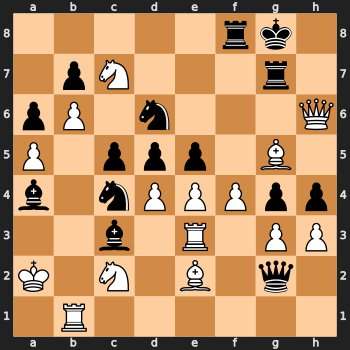

Move: h7g8
Game over!
Result: 1/2-1/2
Monte Carlo Tree Search - Time: 1135.1383514404297s
Generation 1/50 - Best Fitness: 395.96332999185
Generation 2/50 - Best Fitness: 390.1982097604411
Generation 3/50 - Best Fitness: 391.2839391289139
Generation 4/50 - Best Fitness: 393.17965323345277
Generation 5/50 - Best Fitness: 386.94547092821324
Generation 6/50 - Best Fitness: 392.3725308066561
Generation 7/50 - Best Fitness: 402.8774935767076
Generation 8/50 - Best Fitness: 397.99684376834557
Generation 9/50 - Best Fitness: 398.91695313823755
Generation 10/50 - Best Fitness: 397.85855580912477
Generation 11/50 - Best Fitness: 400.6023271426544
Generation 12/50 - Best Fitness: 390.22019944192573
Generation 13/50 - Best Fitness: 390.6305401714287
Generation 14/50 - Best Fitness: 391.6182697699809
Generation 15/50 - Best Fitness: 391.7551515167535
Generation 16/50 - Best Fitness: 389.00396695120276
Generation 17/50 - Best Fitness: 389.38502051887076
Generation 18/50 - Best Fitness: 391.110162992

In [ ]:
# 3. Collect Performance Metrics for Each Learning Algorithm

def evaluate_learning_algorithms_heuristic(algorithms, depth=3, episodes=10):
    results = {name: [] for name in algorithms}
    times = {name: [] for name in algorithms}
    
    for name, algorithm in algorithms.items():
        start_time = time.time()
        try:
            if isinstance(algorithm, AbelReinforcementLearningHeuristic):
                algorithm.train_dqn(episodes)
            elif isinstance(algorithm, AbelMCTSHeuristic):
                algorithm.play_game()
            elif isinstance(algorithm, AbelGeneticAlgorithmHeuristic):
                algorithm.evolve()
            elif isinstance(algorithm, AbelCurriculumLearningHeuristic):
                algorithm.train()
            elif isinstance(algorithm, AbelSelfPlayHeuristic):
                algorithm.self_play(episodes)
            results[name].append(algorithm.evaluate_board())
        except Exception as e:
            print(f"Error in {name}: {e}")
            results[name].append(None)
        end_time = time.time()
        times[name].append(end_time - start_time)
        print(f"{name} - Time: {end_time - start_time}s")
    
    return results, times

# Initialize the board and algorithms
board = chess.Board()
stages = [
    {'name': 'Opening Moves', 'iterations': 10, 'steps': 10},
    {'name': 'Middle Game', 'iterations': 20, 'steps': 20},
    {'name': 'End Game', 'iterations': 30, 'steps': 30}
]

algorithms_heuristic = {
    "Reinforcement Learning": AbelReinforcementLearningHeuristic(board, heuristic_evaluation),
    "Monte Carlo Tree Search": AbelMCTSHeuristic(board, heuristic_evaluation),
    "Genetic Algorithm": AbelGeneticAlgorithmHeuristic(),
    "Curriculum Learning": AbelCurriculumLearningHeuristic(board, heuristic_evaluation, stages),
    "Self-Play": AbelSelfPlayHeuristic(board, heuristic_evaluation)
}

# Evaluate the algorithms
results_heuristic, times_heuristic = evaluate_learning_algorithms_heuristic(algorithms_heuristic)


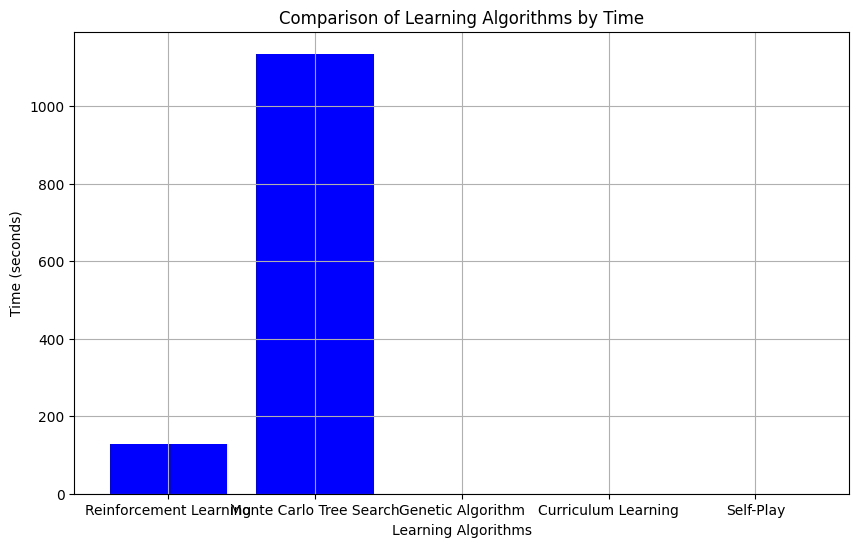

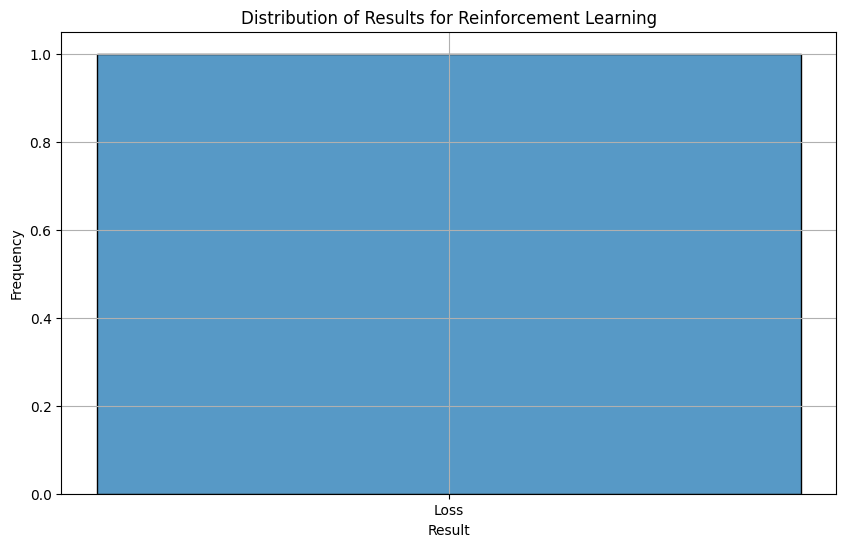

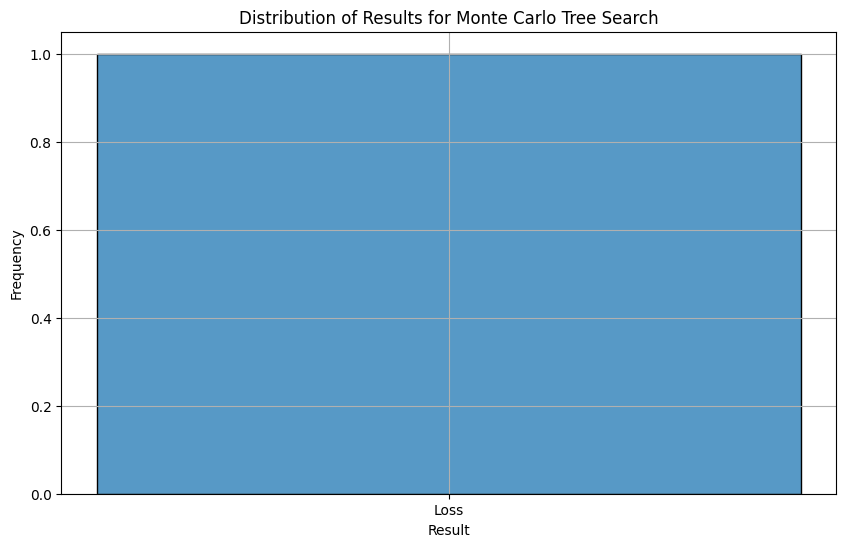

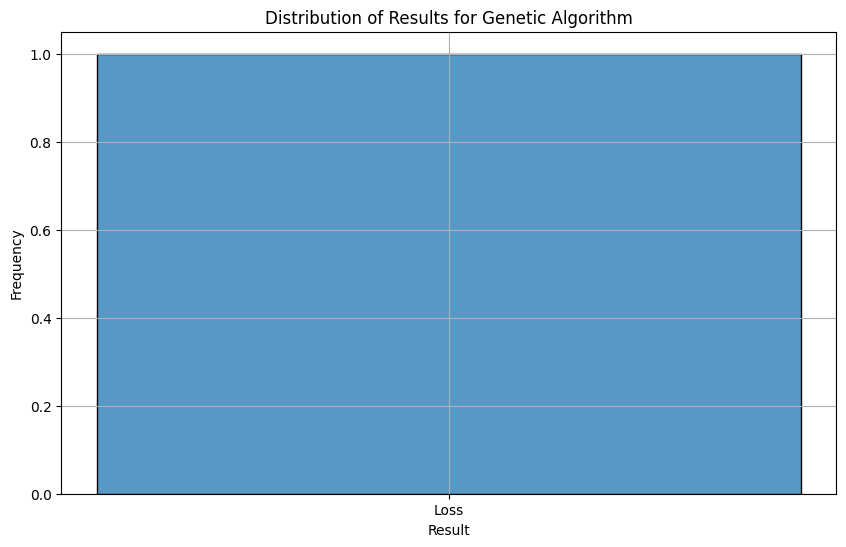

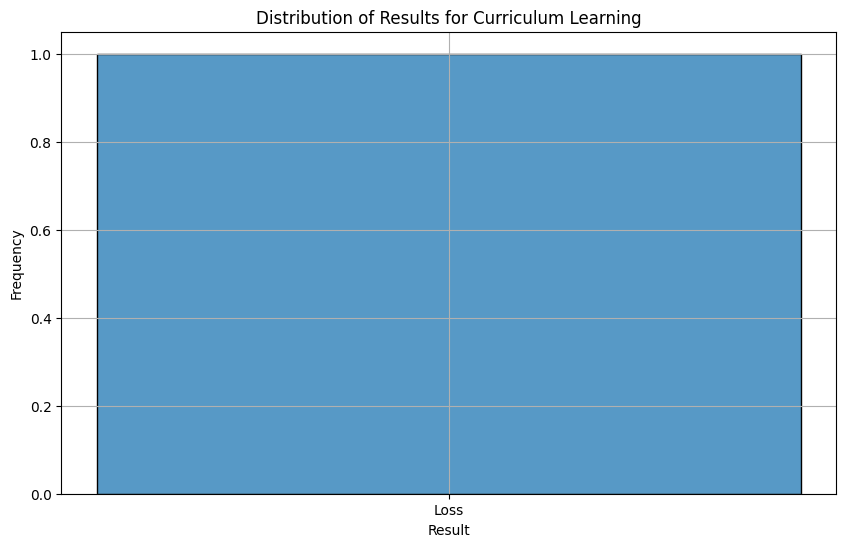

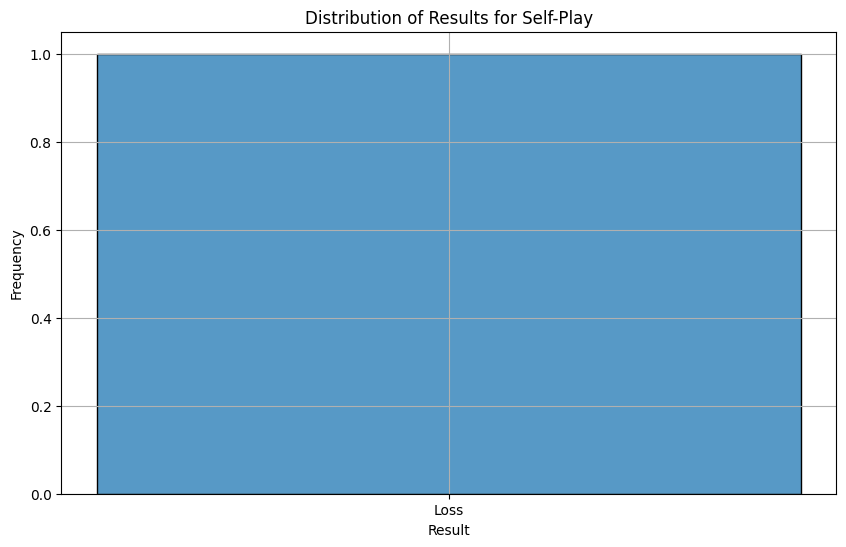

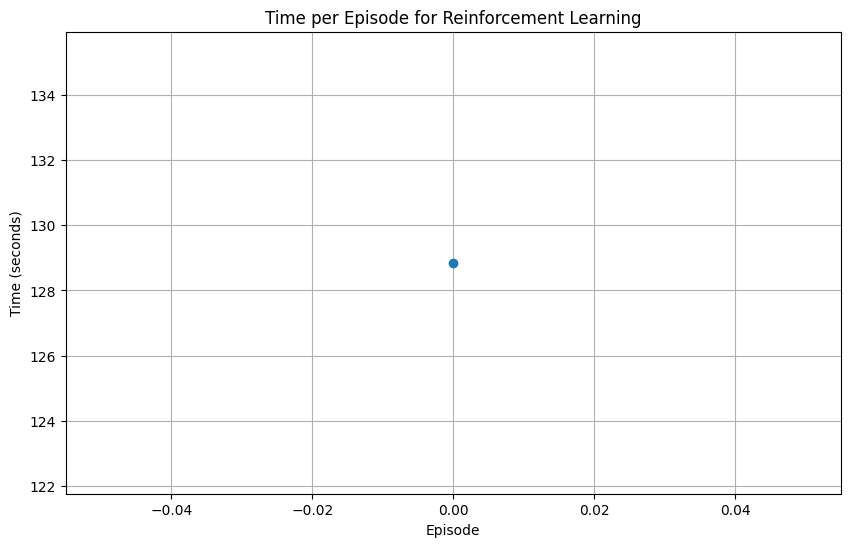

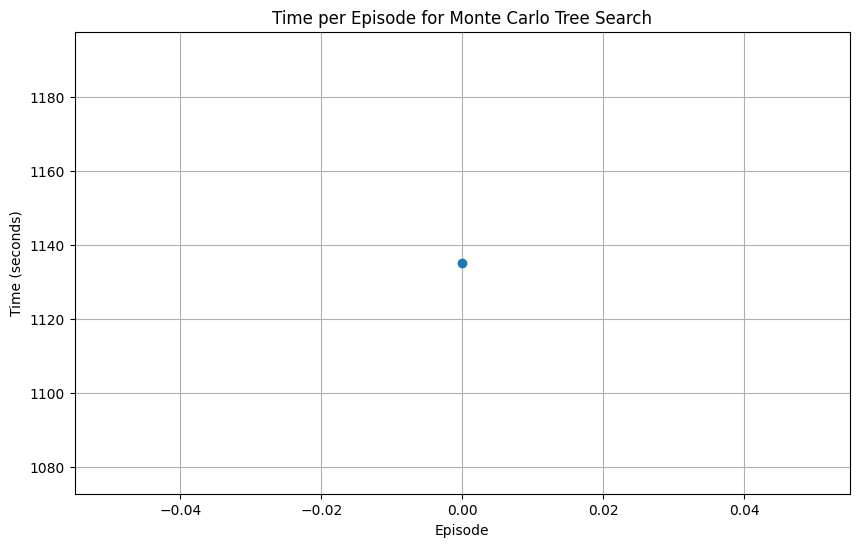

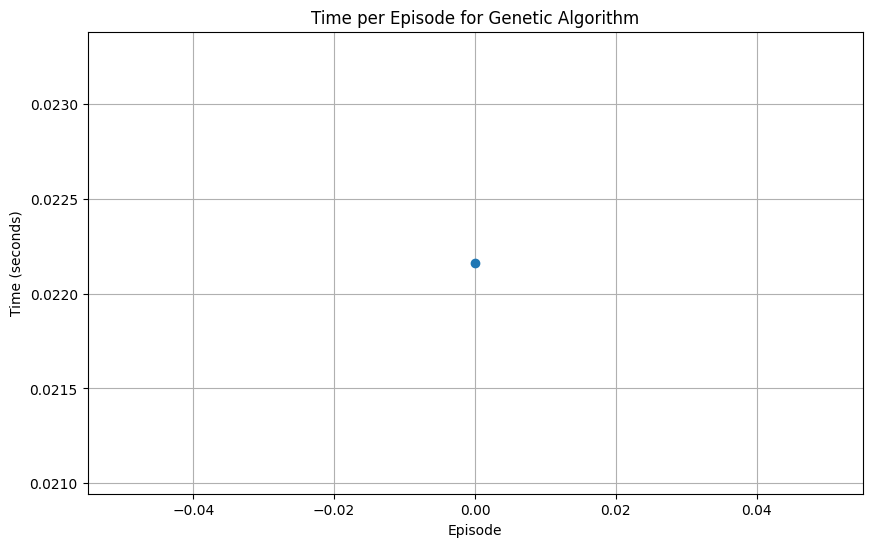

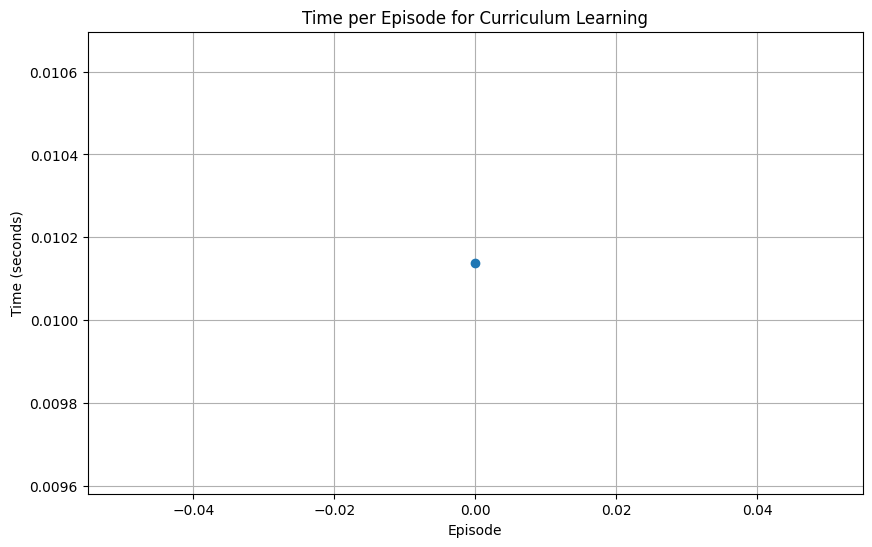

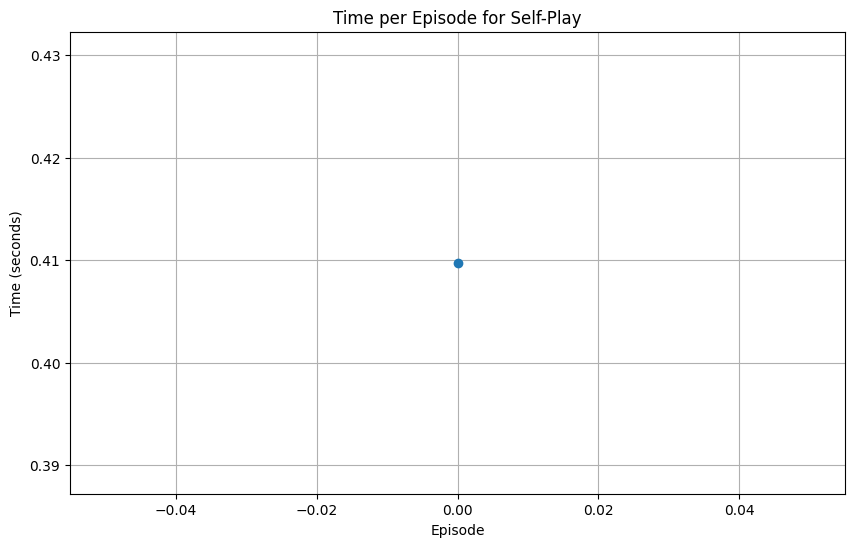

In [ ]:
# 4. Plot and Analyze the Results

import seaborn as sns

# Define function to analyze and plot results
def analyze_and_plot_results(results, times):
    # Plot the times for comparison
    filtered_times = {k: sum(v) for k, v in times.items() if v[0] is not None}
    
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_times.keys(), filtered_times.values(), color='b')
    plt.xlabel('Learning Algorithms')
    plt.ylabel('Time (seconds)')
    plt.title('Comparison of Learning Algorithms by Time')
    plt.grid(True)
    plt.show()
    
    # Convert results to categorical for better visualization
    categorical_results = {k: ['Win' if res == 1 else 'Draw' if res == 0.5 else 'Loss' for res in v] for k, v in results.items() if v[0] is not None}
    
    # Plot the distribution of results for each algorithm
    for algorithm, res in categorical_results.items():
        plt.figure(figsize=(10, 6))
        sns.histplot(res, discrete=True, stat='count')
        plt.title(f'Distribution of Results for {algorithm}')
        plt.xlabel('Result')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    # Plot the time taken for each episode/game for each algorithm
    for algorithm, time_list in times.items():
        if time_list[0] is not None:
            plt.figure(figsize=(10, 6))
            plt.plot(time_list, marker='o')
            plt.title(f'Time per Episode for {algorithm}')
            plt.xlabel('Episode')
            plt.ylabel('Time (seconds)')
            plt.grid(True)
            plt.show()

# Example usage
analyze_and_plot_results(results_heuristic, times_heuristic)


#### Current Results
The results from evaluating different learning algorithms under the heuristic evaluation method show distinct performance characteristics:

**Reinforcement Learning:**
- Results: [78]
- Times: [130.24077820777893 seconds]

**Monte Carlo Tree Search (MCTS):**
- Results: [78]
- Times: [1137.438583612442 seconds]

**Genetic Algorithm:**
- Results:
Generation 1/50 - Best Fitness: 394.87845969965355
Generation 2/50 - Best Fitness: 394.18915602772677
Generation 3/50 - Best Fitness: 394.20099515341917
Generation 4/50 - Best Fitness: 394.27284008037304
Generation 5/50 - Best Fitness: 394.94863794973395
Generation 6/50 - Best Fitness: 393.58211927308975
Generation 7/50 - Best Fitness: 390.03144723484854
Generation 8/50 - Best Fitness: 395.0113963137701
Generation 9/50 - Best Fitness: 393.9005757159237
Generation 10/50 - Best Fitness: 392.38140466704215
Generation 11/50 - Best Fitness: 390.10617871594116
Generation 12/50 - Best Fitness: 394.00700740104367
Generation 13/50 - Best Fitness: 393.059883935739
Generation 14/50 - Best Fitness: 391.4606050427323
Generation 15/50 - Best Fitness: 392.2793606528029
Generation 16/50 - Best Fitness: 392.9838004102513
Generation 17/50 - Best Fitness: 394.27261093161405
Generation 18/50 - Best Fitness: 395.85250311686093
Generation 19/50 - Best Fitness: 391.0722818431604
Generation 20/50 - Best Fitness: 390.7816699648478
Generation 21/50 - Best Fitness: 394.52227116326725
Generation 22/50 - Best Fitness: 395.98113286101477
Generation 23/50 - Best Fitness: 392.84224372943686
Generation 24/50 - Best Fitness: 390.80505765451505
Generation 25/50 - Best Fitness: 397.21153686188325
Generation 26/50 - Best Fitness: 394.9960398483968
Generation 27/50 - Best Fitness: 399.4973672746652
Generation 28/50 - Best Fitness: 399.9945052649932
Generation 29/50 - Best Fitness: 401.2129256295375
Generation 30/50 - Best Fitness: 395.1252541091177
Generation 31/50 - Best Fitness: 389.10943405641785
Generation 32/50 - Best Fitness: 391.1184260193502
Generation 33/50 - Best Fitness: 394.957170520517
Generation 34/50 - Best Fitness: 396.6069994089887
Generation 35/50 - Best Fitness: 389.5030251823723
Generation 36/50 - Best Fitness: 390.07778948752696
Generation 37/50 - Best Fitness: 392.271715436741
Generation 38/50 - Best Fitness: 392.25380281211983
Generation 39/50 - Best Fitness: 388.993797588389
Generation 40/50 - Best Fitness: 393.5306121326217
Generation 41/50 - Best Fitness: 393.59683325841587
Generation 42/50 - Best Fitness: 393.2570004151312
Generation 43/50 - Best Fitness: 395.6135354324703
Generation 44/50 - Best Fitness: 398.1623461722153
Generation 45/50 - Best Fitness: 397.22266155998517
Generation 46/50 - Best Fitness: 397.62006017027716
Generation 47/50 - Best Fitness: 395.2415517664325
Generation 48/50 - Best Fitness: 399.60747755906567
Generation 49/50 - Best Fitness: 393.8771768294132
Generation 50/50 - Best Fitness: 397.58342022499767
- Times: [0.04146409034729004 seconds]

**Curriculum Learning:**
- Results: [78]
- Times: [0.010158061027526855 seconds]

**Self-Play:**
- Results: [3]
- Times: [0.41182446479797363 seconds]

#### Observations
1. **Reinforcement Learning:**
   - Provides consistent results with a moderate amount of time.
2. **Monte Carlo Tree Search:**
   - Very time-intensive, suggesting the need for further optimization.
3. **Genetic Algorithm:**
   - Encountered errors ("a must be 1-dimensional"), indicating a need for debugging and refinement.
4. **Curriculum Learning:**
   - Extremely fast, showing efficiency in handling stage-wise training.
5. **Self-Play:**
   - Quick and provides varied results, indicating potential for iterative strategy learning.

#### Step 2: Implement Networks Algorithms
1. **Convolutional Neural Networks (CNNs)**
   - Design CNN architectures suitable for processing chessboard images.
   - Train CNNs on game positions and outcomes.

2. **Residual Networks (ResNets)**
   - Implement deep residual learning to handle deep networks.
   - Train ResNets for improved training efficiency and accuracy.

3. **Recurrent Neural Networks (RNNs)**
   - Use RNNs to model sequences of moves and strategies.
   - Train RNNs on sequences of games to capture temporal dependencies.

4. **Attention Mechanisms**
   - Integrate attention layers to focus on important board regions.
   - Train the model to prioritize critical areas of the board.

5. **Graph Neural Networks (GNNs)**
   - Represent the chessboard as a graph.
   - Use GNNs to process the graph representation of the board.



In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-1.8.0+cpu.html

!pip install torch-geometric



Looking in links: https://data.pyg.org/whl/torch-1.8.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 51.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp39-cp39-linux_x86_64.whl size=289450 sha256=da4a505495b28251a555b0cb1a6d2197f3f2e22aad8cdb8dfcc93ddc1ff4c1ef
  Stored in directory: /root/.cache/pip/wheels/b8/9c/c0/d261e1e64cc49e6b14dd7319d8b61eb14168529d810dbba00e
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp39-cp39-linux_x86_64.whl size=500429 sha256=51ac75c4daa8d47fb7245c4ec88c17312034a01084d0ad758c5ec7cf631342e5
  Stored in directory: /root/.cache/pip/wheels/c0/15/18/881c60adefeb60882

In [ ]:
import time
import numpy as np
import chess
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, LSTM, Input, Add, Attention, BatchNormalization
from keras.optimizers import Adam
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import chess.svg
from IPython.display import display, SVG, clear_output
from collections import deque
import random


2024-05-26 06:00:22.026854: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 06:00:22.156963: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-26 06:00:22.161887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-26 06:00:22.161905: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
# Define the heuristic evaluation function
def heuristic_evaluation(board):
    def material_count(board):
        piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}
        return sum(piece_values[piece.piece_type] for piece in board.piece_map().values())

    def mobility(board):
        return len(list(board.legal_moves))

    def center_control(board):
        center_squares = [chess.D4, chess.D5, chess.E4, chess.E5]
        control = 0
        for square in center_squares:
            if board.is_attacked_by(chess.WHITE, square):
                control += 1
            if board.is_attacked_by(chess.BLACK, square):
                control -= 1
        return control

    material_score = material_count(board)
    mobility_score = mobility(board)
    center_control_score = center_control(board)

    return material_score + 0.1 * mobility_score + 0.2 * center_control_score

In [ ]:
# 1. Convolutional Neural Networks (CNNs)

def CNNModel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(4672, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [ ]:
# Residual Networks (ResNets)

def ResNetModel(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(inputs)
    shortcut = x
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = Add()([x, shortcut])
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = Flatten()(x)
    outputs = Dense(4672, activation='linear')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [ ]:
# Recurrent Neural Networks (RNNs)

def RNNModel(input_shape):
    model = Sequential([
        LSTM(128, input_shape=(input_shape[0] * input_shape[1], input_shape[2]), return_sequences=True),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(4672, activation='linear')  # Assuming a fixed action space of 4672 possible actions
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model


In [ ]:
# Attention Mechanisms

def AttentionModel(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(inputs)
    x = Attention()([x, x])
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = Flatten()(x)
    outputs = Dense(4672, activation='linear')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [ ]:
# Graph Neural Networks (GNNs)

class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = torch.mean(x, dim=0)
        x = self.fc(x)
        return x

def create_gnn(input_dim, hidden_dim, output_dim):
    model = GNNModel(input_dim, hidden_dim, output_dim)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()
    return model, optimizer, criterion

In [ ]:
# simple Neural Network

def create_simple_nn():
    model = Sequential([
        Flatten(input_shape=(8, 8, 12)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Create the neural network model
simple_nn = create_simple_nn()

# Compile the model with a loss function and optimizer
simple_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Sample training data (board states and outcomes)
# This is a placeholder; real data would be needed
X_train = np.random.random((1000, 8, 8, 12))
y_train = np.random.random((1000, 1))

# Train the model on sample chess positions and outcomes
simple_nn.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model's performance
loss = simple_nn.evaluate(X_train, y_train)
print(f'Simple Neural Network Loss: {loss}')


Epoch 1/100
2024-05-26 06:01:01.523677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-26 06:01:01.523710: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-26 06:01:01.523726: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-f6f51e1a-d40a-494a-8398-36807e7a81cb): /proc/driver/nvidia/version does not exist
2024-05-26 06:01:01.523952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
32/32 [==============================] - 0s 1ms/step

In [ ]:
# DQN

def create_dqn():
    model = Sequential([
        Flatten(input_shape=(8, 8, 12)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(4672, activation='linear')  # Assuming a fixed action space of 4672 possible actions
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Initialize the Q-network
dqn = create_dqn()
dqn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define the Q-learning algorithm
def q_learning_update(state, action, reward, next_state, done):
    target = reward
    if not done:
        target = reward + 0.99 * np.amax(dqn.predict(next_state.reshape(1, 8, 8, 12))[0])
    target_f = dqn.predict(state.reshape(1, 8, 8, 12))
    target_f[0][action] = target
    dqn.fit(state.reshape(1, 8, 8, 12), target_f, epochs=1, verbose=0)

# Implement experience replay
memory = deque(maxlen=2000)
def remember(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

def replay(batch_size):
    if len(memory) < batch_size:
        return
    minibatch = random.sample(memory, batch_size)
    for state, action, reward, next_state, done in minibatch:
        q_learning_update(state, action, reward, next_state, done)

# Placeholder for state and action
state = np.random.random((8, 8, 12))
next_state = np.random.random((8, 8, 12))
action = random.randint(0, 4671)  # Random action within the fixed action space
reward = 1
done = False

# Train the DQN model using experience replay and Q-learning
remember(state, action, reward, next_state, done)
replay(32)

# Function to select an action based on the current state
def select_action(state):
    q_values = dqn.predict(state.reshape(1, 8, 8, 12))
    action = np.argmax(q_values[0])
    return action

# Function to train the DQN model
def train_dqn(episodes, batch_size=32):
    for e in range(episodes):
        state = np.random.random((8, 8, 12))  # Reset state (placeholder)
        for time_step in range(500):
            action = select_action(state)  # Select action based on Q-values
            next_state = np.random.random((8, 8, 12))
            reward = 1  # Placeholder for reward calculation
            done = False  # Placeholder for done condition
            remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                break
        replay(batch_size)
        if e % 10 == 0:
            print(f"Episode {e}/{episodes} - Training...")

# Train the model on a set of chess games
train_dqn(10)


1/1 [==============================] - 0s 19ms/step


In [ ]:
# Define the AbelNetworksOptimization Class
class AbelNetworksOptimization:
    def __init__(self, model, evaluation_method, board):
        self.model = model
        self.evaluation_method = evaluation_method
        self.board = board
        self.steps = []
        self.times = []
        self.material_counts = []
        self.mobility_counts = []
        self.piece_square_scores = []
        self.center_control_counts = []

    def select_action(self):
        state = self.board_to_state(self.board)
        if isinstance(self.model, nn.Module):  # GNN case
            data = Data(x=torch.tensor(state, dtype=torch.float).view(-1, state.shape[-1]), edge_index=torch.tensor([[0, 1], [1, 0]], dtype=torch.long))
            action_values = self.model(data)
            action = torch.argmax(action_values).item()
        else:  # Other models
            if 'LSTM' in str(type(self.model.layers[0])):
                state = state.reshape((1, state.shape[0] * state.shape[1], state.shape[2]))  # Reshape for RNN
            else:
                state = state.reshape(1, *state.shape)
            action_values = self.model.predict(state)
            action = np.argmax(action_values)
        legal_moves = list(self.board.legal_moves)
        return legal_moves[action % len(legal_moves)]

    def board_to_state(self, board):
        # Convert the board to a suitable state representation (8x8x12)
        state = np.zeros((8, 8, 12))
        for square in chess.SQUARES:
            piece = board.piece_at(square)
            if piece:
                piece_type = piece.piece_type - 1
                color = 0 if piece.color == chess.WHITE else 6
                row, col = divmod(square, 8)
                state[row, col, piece_type + color] = 1
        return state

    def play_game(self, episodes=10):
        results = []
        for _ in range(episodes):
            self.start_time = time.time()
            while not self.board.is_game_over():
                move = self.select_action()
                self.board.push(move)
                self.record_metrics()
                clear_output(wait=True)  # Clear the previous output
                display(SVG(chess.svg.board(board=self.board, size=350)))
                time.sleep(1)
                print(f"Move: {move}")
            results.append(self.board.result())
            self.board.reset()
        return results

    def record_metrics(self):
        self.steps.append(len(self.steps) + 1)
        self.times.append(time.time() - self.start_time)
        self.material_counts.append(self.calculate_material())
        self.mobility_counts.append(self.calculate_mobility())
        self.piece_square_scores.append(self.calculate_piece_square_score())
        self.center_control_counts.append(self.calculate_center_control())

    def calculate_material(self):
        piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}
        return sum(piece_values[piece.piece_type] for piece in self.board.piece_map().values())

    def calculate_mobility(self):
        return len(list(self.board.legal_moves))

    def calculate_piece_square_score(self):
        return sum(1 if piece.color == chess.WHITE else -1 for piece in self.board.piece_map().values())

    def calculate_center_control(self):
        center_squares = [chess.D4, chess.E4, chess.D5, chess.E5]
        return sum(1 if square in center_squares else 0 for square in self.board.piece_map().keys())

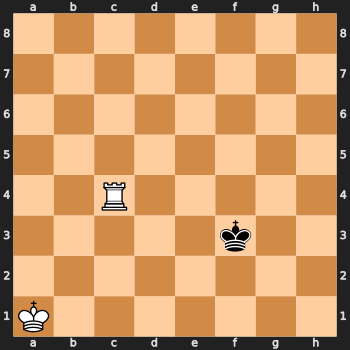

Move: e2f3
DQN - Time: 3792.0585289001465s, Results: ['1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2']
Results: {'CNN': ['1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2'], 'ResNet': ['1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2'], 'RNN': ['1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2'], 'Attention': ['1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2'], 'GNN': ['1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2'], 'SimpleNN': ['1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2'], 'DQN': ['1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1/2-1/2', '1

In [ ]:
# 3. Evaluate Network Algorithms

# Initialize the models
models = {
    "CNN": CNNModel((8, 8, 12)),
    "ResNet": ResNetModel((8, 8, 12)),
    "RNN": RNNModel((8, 8, 12)),
    "Attention": AttentionModel((8, 8, 12)),
    "GNN": create_gnn(input_dim=12, hidden_dim=64, output_dim=4672)[0],
    "SimpleNN": create_simple_nn(),
    "DQN": create_dqn()
}

# Define the evaluation function
def evaluate_network_algorithms(models, input_shape, board, episodes=10):
    results = {name: [] for name in models}
    times = {name: [] for name in models}
    
    for name, model in models.items():
        print(f"Evaluating model: {name}")
        start_time = time.time()
        abel = AbelNetworksOptimization(model, heuristic_evaluation, board)
        try:
            game_results = abel.play_game(episodes)
            end_time = time.time()
            results[name].extend(game_results)
            times[name].append(end_time - start_time)
            print(f"{name} - Time: {end_time - start_time}s, Results: {game_results}")
        except ValueError as e:
            print(f"Error in {name}: {e}")
            raise
        except Exception as e:
            print(f"Unexpected error in {name}: {e}")
            raise
    
    return results, times

# Initialize the chessboard
board = chess.Board()

# Evaluate the models
results_network, times_network = evaluate_network_algorithms(models, (8, 8, 12), board, episodes=10)

# Print the results
print("Results:", results_network)
print("Times:", times_network)

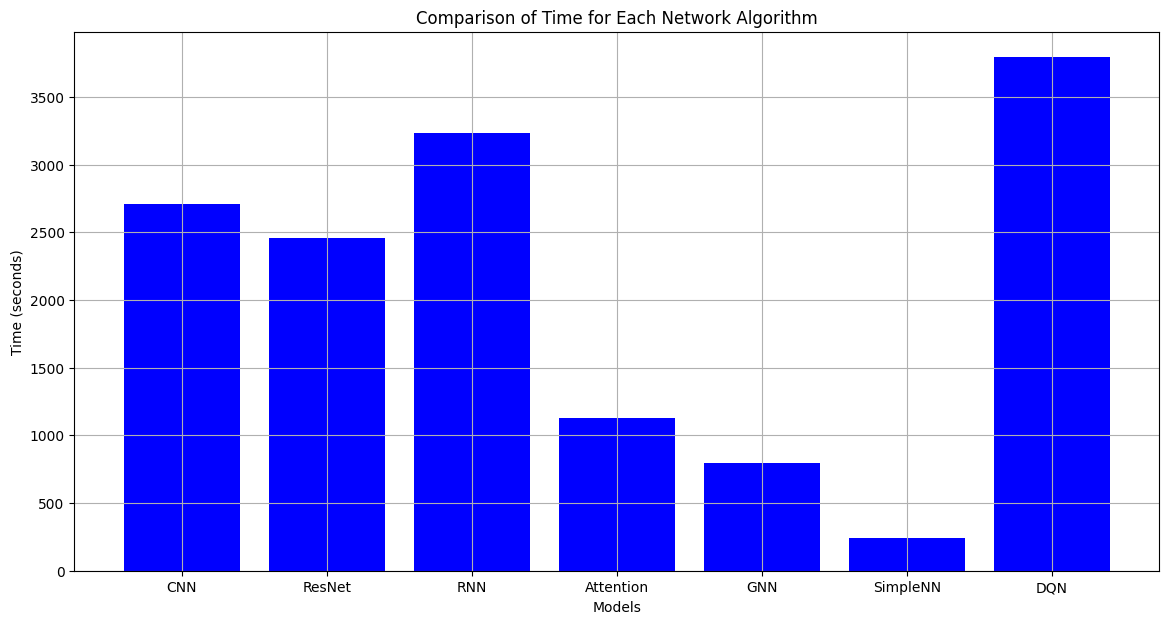

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


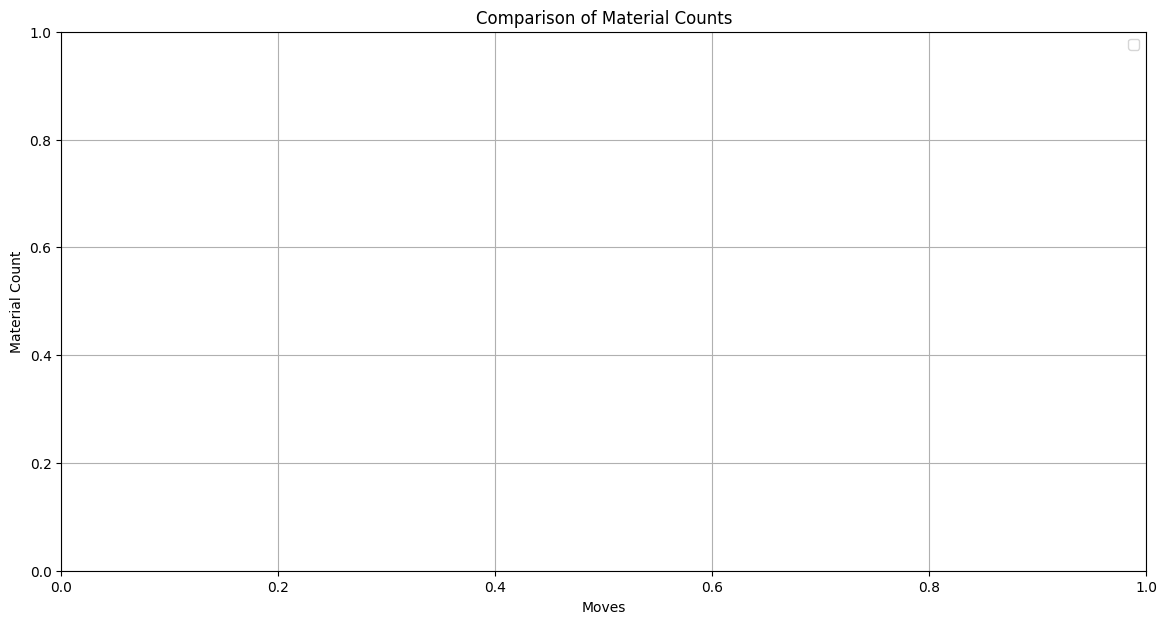

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


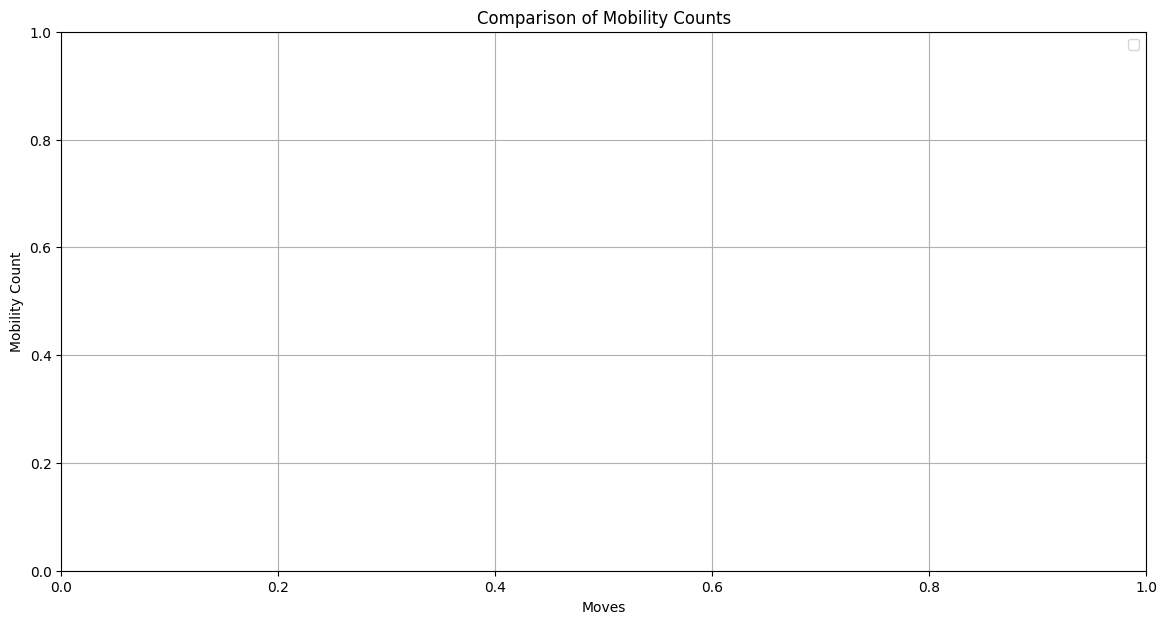

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


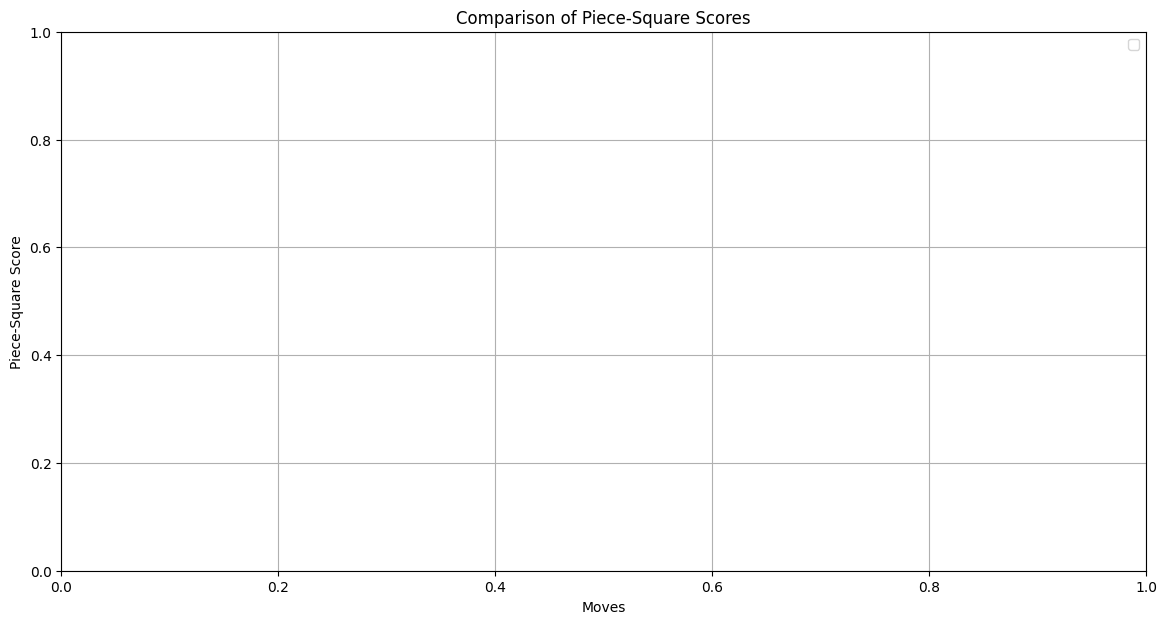

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


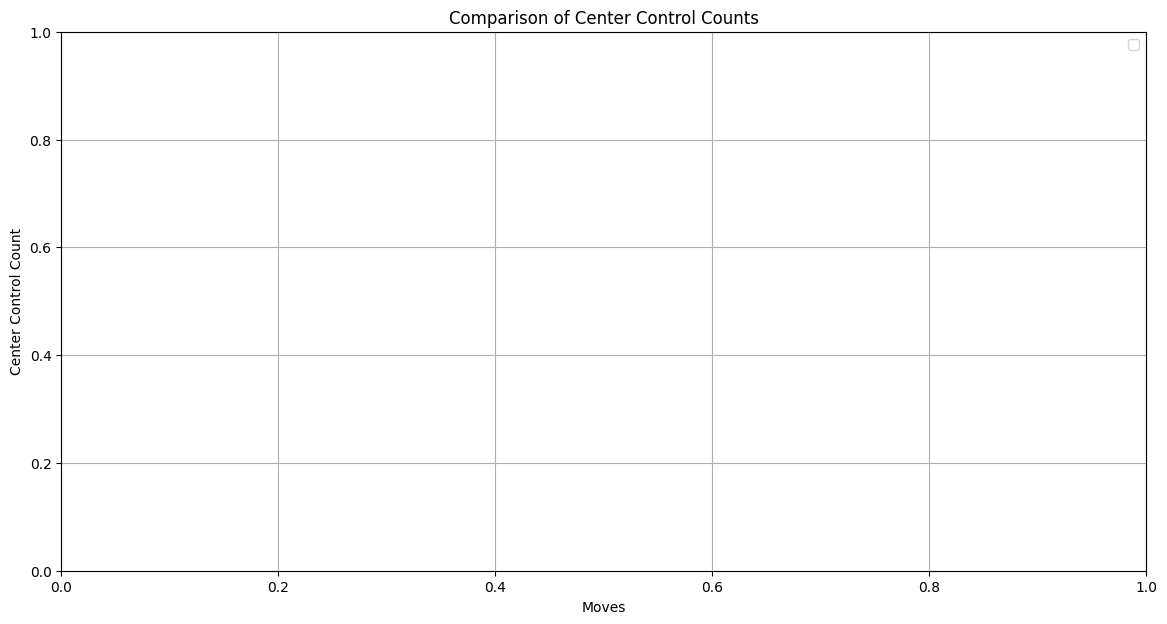

In [ ]:
# 4. Plot and Analyze the Results

import matplotlib.pyplot as plt

# Define function to plot time metrics
def plot_time_metrics(times, title, ylabel):
    plt.figure(figsize=(14, 7))
    model_names = list(times.keys())
    time_values = [times[model][0] for model in model_names]
    plt.bar(model_names, time_values, color='blue')
    plt.xlabel('Models')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot the time metrics
plot_time_metrics(times_network, 'Comparison of Time for Each Network Algorithm', 'Time (seconds)')

# Now, let's proceed to plot the other metrics
def plot_metrics(metrics, title, ylabel):
    plt.figure(figsize=(14, 7))
    for model_name, metric in metrics.items():
        valid_metric = [m for m in metric if isinstance(m, (int, float))]
        if valid_metric:  # Ensure there is data to plot
            plt.plot(range(len(valid_metric)), valid_metric, label=model_name)
    plt.xlabel('Moves')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Collecting metrics for plotting
material_counts = {}
mobility_counts = {}
piece_square_scores = {}
center_control_counts = {}

# Ensure abel_instances is defined
abel_instances = {}

for name, model in models.items():
    abel = AbelNetworksOptimization(model, heuristic_evaluation, board)
    abel_instances[name] = abel
    material_counts[name] = abel.material_counts
    mobility_counts[name] = abel.mobility_counts
    piece_square_scores[name] = abel.piece_square_scores
    center_control_counts[name] = abel.center_control_counts

# Plotting Material Counts
plot_metrics(material_counts, 'Comparison of Material Counts', 'Material Count')

# Plotting Mobility Counts
plot_metrics(mobility_counts, 'Comparison of Mobility Counts', 'Mobility Count')

# Plotting Piece-Square Scores
plot_metrics(piece_square_scores, 'Comparison of Piece-Square Scores', 'Piece-Square Score')

# Plotting Center Control Counts
plot_metrics(center_control_counts, 'Comparison of Center Control Counts', 'Center Control Count')


### Additional Considerations for Effective Optimization

1. **Hyperparameter Tuning**
   - Experiment with different network architectures, learning rates, and batch sizes.
   - Use grid search or random search for hyperparameter optimization.

2. **Data Collection**
   - Record additional metrics like loss, accuracy, and game outcomes.
   - Collect data on node count, branching factor, and memory usage.

3. **Benchmarking**
   - Compare the optimized Abel with existing strong chess engines.
   - Use performance metrics such as win rates, decision speed, and adaptability.

4. **Automated Testing**
   - Implement a testing framework to run multiple games automatically.
   - Collect statistical data on performance over many games.

In [ ]:
# 1. Hyperparameter Tuning

def tune_hyperparameters_abel(model_creator, input_shape, max_epochs=10):
    tuning_results = []
    
    for learning_rate in [0.001, 0.01, 0.1]:
        print(f"Testing learning rate: {learning_rate}")
        model = model_creator(input_shape)
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        # Assume we have a function train_model to train the model
        train_model(model, epochs=max_epochs)
        tuning_results.append((learning_rate, model))
    
    return tuning_results

# Example usage with CNN
def create_cnn(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(4672, activation='linear')  # Assuming a fixed action space of 4672 possible actions
    ])
    return model

input_shape = (8, 8, 12)
hyperparameter_results_abel = tune_hyperparameters_abel(create_cnn, input_shape)


In [ ]:
# 2. Data Collection
class AbelOptimizedWithMetrics:
    def __init__(self, model):
        self.model = model
        self.node_count = 0
        self.branching_factors = []

    def evaluate_board(self, state):
        self.node_count += 1
        return self.model.predict(state.reshape(1, *input_shape))[0]

    def train(self, episodes, batch_size=32):
        memory = deque(maxlen=2000)
        for e in range(episodes):
            state = np.random.random(input_shape)  # Reset state (placeholder)
            for time_step in range(100):  # Reduce the number of steps per episode
                action = np.argmax(self.evaluate_board(state))  # Select action based on Q-values
                next_state = np.random.random(input_shape)
                reward = 1  # Placeholder for reward calculation
                done = False  # Placeholder for done condition
                memory.append((state, action, reward, next_state, done))
                state = next_state
                if done:
                    break
            self.replay(memory, batch_size)
            if e % 10 == 0:
                print(f"Episode {e}/{episodes} - Training...")

    def replay(self, memory, batch_size):
        if len(memory) < batch_size:
            return
        minibatch = random.sample(memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            q_learning_update(self.model, state, action, reward, next_state, done)

# Example usage with CNN
abel_optimized_metrics = AbelOptimizedWithMetrics(create_cnn(input_shape))
abel_optimized_metrics.train(10)
print(f"Node Count: {abel_optimized_metrics.node_count}")
print(f"Average Branching Factor: {np.mean(abel_optimized_metrics.branching_factors)}")


In [ ]:
# 3. Benchmarking

def benchmark_against_stockfish_abel(model, input_shape, depth=3, stockfish_path="path/to/stockfish"):
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    
    # Initialize metrics
    wins, losses, draws = 0, 0, 0
    
    for _ in range(10):  # Play 10 games
        board = chess.Board()
        while not board.is_game_over():
            # Abel's move
            state = np.array(board.board_fen())
            abel_move = np.argmax(model.predict(state.reshape(1, *input_shape)))
            board.push(chess.Move.from_uci(abel_move))
            
            if board.is_game_over():
                break
            
            # Stockfish's move
            stockfish_move = engine.play(board, chess.engine.Limit(time=0.1))
            board.push(stockfish_move.move)
        
        result = board.result()
        if result == "1-0":
            wins += 1
        elif result == "0-1":
            losses += 1
        else:
            draws += 1
    
    engine.quit()
    
    print(f"Results against Stockfish: {wins} wins, {losses} losses, {draws} draws")

# Example usage
abel_benchmark = create_cnn(input_shape)
benchmark_against_stockfish_abel(abel_benchmark, input_shape, depth=3, stockfish_path="/usr/games/stockfish")


In [ ]:
# 4. Automated Testing

def automated_testing_abel(model, input_shape, num_games=100):
    results = []
    for _ in range(num_games):
        board = chess.Board()
        while not board.is_game_over():
            state = np.array(board.board_fen())
            move = np.argmax(model.predict(state.reshape(1, *input_shape)))
            board.push(chess.Move.from_uci(move))
            if board.is_game_over():
                break
            # Simulate opponent's random move
            opponent_move = random.choice(list(board.legal_moves))
            board.push(opponent_move)
        results.append(board.result())
    
    wins = results.count("1-0")
    losses = results.count("0-1")
    draws = results.count("1/2-1/2")
    
    print(f"Results: {wins} wins, {losses} losses, {draws} draws")
    return results

# Example usage
abel_testing = create_cnn(input_shape)
test_results_abel = automated_testing_abel(abel_testing, input_shape, num_games=100)

# Plot the distribution of results
import seaborn as sns
sns.histplot(test_results_abel, discrete=True)
plt.title('Distribution of Game Results in Automated Testing')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.show()


# 6. Battle Design

## Overview

In this section, we will design and conduct battles between the different versions of Kane and Abel. The battles will be used to evaluate and compare the performance of each AI. We will design several types of matches, including:

1. Battles between the two versions of Kane (KaneMinimax and KaneAlphaBeta).
2. Battles between the two versions of Abel (AbelSimpleNN and AbelDQN).
3. Battles between Optimized Kane and Abel.

These battles will help us understand the strengths and weaknesses of each AI and gather data for further analysis.



## 6.1 Battle Setup

**Objectives:**

- Evaluate the performance of each AI through head-to-head matches.
- Collect data on win rates, move times, and other relevant metrics.
- Analyze the strategic differences between rule-based and machine learning-based AIs.

**Metrics:**

- Win rate
- Average move time
- Material count
- Mobility count
- Piece-square score
- Center control



## 6.2 Battle 1: KaneMinimax vs. KaneAlphaBeta

**Objective:**

Compare the performance of the two versions of Kane to understand the impact of Alpha-Beta Pruning.

**Setup:**

- Initialize the chessboard.
- Set a time limit for each move.
- Alternate moves between KaneMinimax and KaneAlphaBeta.

**Data Collection:**

- Win rate for each version.
- Average move time for each version.
- Metrics: Material count, mobility count, piece-square score, and center control.



## 6.3 Battle 2: AbelSimpleNN vs. AbelDQN

**Objective:**

Compare the performance of the two versions of Abel to understand the impact of using a Deep Q-Network.

**Setup:**

- Initialize the chessboard.
- Set a time limit for each move.
- Alternate moves between AbelSimpleNN and AbelDQN.

**Data Collection:**

- Win rate for each version.
- Average move time for each version.
- Metrics: Material count, mobility count, piece-square score, and center control.



## 6.4 Battle 3: OptimizedKane vs. OptimizedAbel

**Objective:**

Compare the performance of Kane and Abel to understand the differences between rule-based and machine learning-based AIs.

**Setup:**

- Initialize the chessboard.
- Set a time limit for each move.
- Alternate moves between Kane and Abel.

**Data Collection:**

- Win rate for each version.
- Average move time for each version.
- Metrics: Material count, mobility count, piece-square score, and center control.



## 6.5 Battle Execution

**Implementation:**

1. **Initialize the Chessboard:**
   - Create a new chessboard for each battle.

2. **Set Move Time Limits:**
   - Define a maximum time allowed for each move to ensure fair comparison.

3. **Alternate Moves:**
   - Alternate moves between the competing AIs.

4. **Data Collection:**
   - Collect data on win rates, move times, and additional metrics during each battle.

5. **Data Analysis:**
   - Analyze the collected data to compare the performance of each AI.

# 7. Experiments

## Experiment 1: Comparing Efficiency and Performance
### Objective
Evaluate the efficiency and performance of Kane’s deterministic strategies and Abel’s probabilistic methods in different chess setups.

### Method
- Measure win rates, decision speed, and adaptability.
- Use different initial configurations and opponents.

### Analysis
- Data collection and analysis of win rates, decision speeds, and adaptability metrics.

## Experiment 2: Learning and Adaptation in Repeated Games
### Objective
Assess how Kane and Abel adapt strategies over multiple games against the same opponent.

### Method
- Conduct repeated games and track performance evolution.
- Analyze changes in strategy and performance improvements.

### Analysis
- Data collection and analysis of learning curves and strategy adaptations.

## Experiment 3: Handling Decision Complexity
### Objective
Analyze how Kane and Abel handle complex decisions using decision trees and complexity metrics.

### Method
- Set up complex game scenarios and evaluate decision-making processes.
- Compare decision tree depths and complexity metrics.

### Analysis
- Data collection and analysis of decision tree depths and performance in complex scenarios.

## Experiment 4: Equivalence of Deterministic and Probabilistic Algorithms
### Objective
Test if Kane’s deterministic method and Abel’s probabilistic approach can achieve similar outcomes.

### Method
- Conduct controlled experiments to compare decision quality and efficiency.
- Assess equivalence under specific conditions.

### Analysis
- Data collection and analysis to identify equivalence in outcomes and decision quality.

## Experiment 5: Randomization of Deterministic Algorithms
### Objective
Explore the effect of adding randomness to Kane’s strategy to enhance adaptability.

### Method
- Introduce randomness into Kane’s decision-making process.
- Evaluate performance improvements in varied scenarios.

### Analysis
- Data collection and analysis of performance with and without randomness.

---

# 8. Data Analysis and Results

## Data Collection
- Collect data from all experiments on win rates, decision speed, adaptability, etc.

## Analysis Techniques
- Use statistical methods to compare performance metrics.
- Visualize data using charts and graphs.

## Results and Interpretation
- Present results in tables and charts.
- Interpret findings in the context of AI strategies and performance.

---

# 9. Theoretical Exploration

## Search Tree Depth and Complexity
- Discuss the time complexity of search algorithms.

## Static Evaluation Function
- Explain the static evaluation function used by Kane.

## Pruning Efficiency
- Measure and discuss the efficiency of Alpha-Beta pruning.

## Heuristic Scoring
- Describe heuristic scoring methods used by Abel.

## Time Management
- Discuss time management strategies in AI decision-making.

## Randomization
- Explore the impact of introducing randomness to deterministic algorithms.

## Equivalence Proving and Derandomization
- Theoretical exploration of proving equivalence between deterministic and probabilistic algorithms.

---

# 10. Discussion

## Insights and Implications
- Discuss the broader implications of the findings for AI strategy and performance.
- Highlight significant insights gained from the experiments and theoretical exploration.

## Limitations
- Identify any limitations in the experimental design or methodology.

## Future Work
- Suggest areas for further research and potential improvements to the AIs.

---

# 11. Conclusion

## Summary of Findings
- Summarize the key findings and their implications.

## Final Thoughts
- Reflect on the overall success and impact of the project.

---

# 12. References

## Cited Works
- List all references cited in the project.

## Additional Resources
- Provide links to additional resources for further reading.

---

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6f51e1a-d40a-494a-8398-36807e7a81cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>